# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [21]:
# Import warnings
import warnings
warnings.filterwarnings(action="ignore")

In [4]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [6]:
# Try loading one file

df = pd.read_parquet(r'C:\Users\subodhbk\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [7]:
df.shape

(3041714, 19)

In [8]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\subodhbk\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        per_month_df = pd.read_parquet(file_path)
        per_month_df['pickup_hour'] = pd.to_datetime(per_month_df['tpep_pickup_datetime']).dt.hour
        per_month_df['pickup_day'] = pd.to_datetime(per_month_df['tpep_pickup_datetime']).dt.day
        per_month_df['pickup_month'] = pd.to_datetime(per_month_df['tpep_pickup_datetime']).dt.month

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for tpep_day in (per_month_df['pickup_day'].unique()):
            day_df = per_month_df[per_month_df['pickup_day'] == tpep_day]
            # Iterate through each hour of the selected date
            for tpep_hour in (day_df['pickup_hour'].unique()):
                hour_data = day_df[day_df['pickup_hour'] == tpep_hour]
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896420 entries, 3703 to 2698522
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [19]:
# Store the df in csv/parquet
df.to_parquet(os.path.join(r'C:\Users\subodhbk\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary','sampled_data_2023.parquet'))

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [25]:
# Load the new data file
sampled_df = pd.read_parquet('C:\\Users\\subodhbk\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\sampled_data_2023.parquet')


In [26]:
# df.head()
sampled_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3703            2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
4166            2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
3847            2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
1882            2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
2995366         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3703              2.85         1.0                  N           263   
4166              1.32         1.0                  N            90   
3847              3.17         1.0                  N            79   
1882              3.80         1.0                  N           142   
2995366           7.97         NaN               None           140   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
3703               41             1  ...        4.12           0.0   
4166              137             1  ...        3.56           0.0   
3847              141             1  ...        3.98           0.0   
1882              107             2  ...        0.00           0.0   
2995366            17             0  ...        8.17           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
3703                       1.0         24.72                   2.5   
4166                       1.0         21.36                   2.5   
3847                       1.0         23.88                   2.5   
1882                       1.0         29.70                   2.5   
2995366                    1.0         49.00                   NaN   

         airport_fee  pickup_hour  pickup_day  pickup_month  Airport_fee  
3703             0.0            0           1             1          NaN  
4166             0.0            0           1             1          NaN  
3847             0.0            0           1             1          NaN  
1882             0.0            0           1             1          NaN  
2995366          NaN            0           1             1          NaN  

[5 rows x 23 columns]

In [27]:
# df.info()
sampled_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1896420 entries, 3703 to 2698522
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [28]:
# Fix the index and drop any columns that are not needed
sampled_df.reset_index(drop=True, inplace=True)
sampled_df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         NaN               None           140            17   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             1  ...        4.12           0.0                    1.0   
1             1  ...        3.56           0.0                    1.0   
2             1  ...        3.98           0.0                    1.0   
3             2  ...        0.00           0.0                    1.0   
4             0  ...        8.17           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_hour  pickup_day  \
0         24.72                   2.5          0.0            0           1   
1         21.36                   2.5          0.0            0           1   
2         23.88                   2.5          0.0            0           1   
3         29.70                   2.5          0.0            0           1   
4         49.00                   NaN          NaN            0           1   

   pickup_month  Airport_fee  
0             1          NaN  
1             1          NaN  
2             1          NaN  
3             1          NaN  
4             1          NaN  

[5 rows x 23 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [30]:
sampled_df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            64875
trip_distance                  0
RatecodeID                 64875
store_and_fwd_flag         64875
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       64875
airport_fee              1747938
pickup_hour                    0
pickup_day                     0
pickup_month                   0
Airport_fee               213357
dtype: int64

In [31]:
sampled_df[(sampled_df['Airport_fee'] > 0) & (sampled_df['airport_fee'] > 0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_hour, pickup_day, pickup_month, Airport_fee]
Index: []

[0 rows x 23 columns]

In [32]:
# Combine the two airport fee columns
# Since from the above we get to know that count of null values for "Airport_fee" is less than in column "airport_fee" Hence will fill
# "Airport_fee" column with the one in "airport_fee" and rename the column "Airport_fee" to "airport_fee"
sampled_df['Airport_fee'].fillna(sampled_df['airport_fee'], inplace=True)
sampled_df.drop('airport_fee', axis=1, inplace=True)


In [33]:
sampled_df.rename(columns={'Airport_fee': 'airport_fee'}, inplace=True)

In [34]:
sampled_df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          64875
trip_distance                0
RatecodeID               64875
store_and_fwd_flag       64875
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64875
pickup_hour                  0
pickup_day                   0
pickup_month                 0
airport_fee              64875
dtype: int64

In [35]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896420 entries, 0 to 1896419
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  pickup_hour           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [36]:
# check where values of fare amount are negative
# To find this we will prepare the list of the columns which indicates the monetary values as asked in the question
# Since we do know from the data dictionary what are monetary columns lets create a list of the same
monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
# Check if values for these columns are negative
negative_monetary_df = sampled_df[(sampled_df[monetary_columns] < 0).any(axis=1)]
negative_monetary_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
9343          2  2023-01-24 20:07:00   2023-01-24 20:21:32              1.0   
16743         2  2023-01-25 18:52:24   2023-01-25 19:06:34              1.0   
20746         2  2023-01-02 05:12:19   2023-01-02 05:41:45              1.0   
25250         2  2023-01-03 14:24:45   2023-01-03 14:25:14              1.0   
91765         2  2023-01-17 15:03:44   2023-01-17 15:36:28              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
9343            1.81         1.0                  N           237   
16743           1.75         1.0                  N           140   
20746          17.07         3.0                  N           142   
25250           0.00         2.0                  N           132   
91765           4.12         1.0                  N           239   

       DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
9343            162             2  ...     -0.5         0.0           0.0   
16743           163             2  ...     -0.5         0.0           0.0   
20746             1             2  ...      0.0         0.0           0.0   
25250           132             2  ...     -0.5         0.0           0.0   
91765           168             2  ...     -0.5         0.0           0.0   

       improvement_surcharge  total_amount  congestion_surcharge  pickup_hour  \
9343                    -1.0         -4.00                  -2.5           20   
16743                   -1.0         -4.00                  -2.5           18   
20746                   -1.0         -1.00                   0.0            5   
25250                   -1.0         -5.25                  -2.5           14   
91765                   -1.0         -4.00                  -2.5           15   

       pickup_day  pickup_month  airport_fee  
9343           24             1         0.00  
16743          25             1         0.00  
20746           2             1         0.00  
25250           3             1        -1.25  
91765          17             1         0.00  

[5 rows x 22 columns]

In [37]:
negative_monetary_df.shape

(81, 22)

Did you notice something different in the `RatecodeID` column for above records?

In [38]:
# Analyse RatecodeID for the negative fare amounts
negative_monetary_df.RatecodeID.value_counts()

RatecodeID
1.0    53
2.0    23
5.0     3
3.0     1
4.0     1
Name: count, dtype: int64

In [ ]:
## From the above value counts for the RatecodeID, we see that most of them are for the Ratecode 1 and 2. 
## which means either Standard Rate or JFK Rate has been applied on trips

In [39]:
# Find which columns have negative values
negative_monetary_df[negative_monetary_df[monetary_columns] < 0].count()

VendorID                  0
tpep_pickup_datetime      0
tpep_dropoff_datetime     0
passenger_count           0
trip_distance             0
RatecodeID                0
store_and_fwd_flag        0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     3
mta_tax                  75
tip_amount                0
tolls_amount              0
improvement_surcharge    80
total_amount             80
congestion_surcharge     57
pickup_hour               0
pickup_day                0
pickup_month              0
airport_fee              15
dtype: int64

In [40]:
# fix these negative values
## From above we find that for columns 'extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge' and 'airport_fee' are having negative values.
negative_monetary_df.shape
## Since only 81 rows out of 1896420 rows from the sampled data is negative and is not significant, we can discard these rows as following.
sampled_df = sampled_df[~((sampled_df[monetary_columns] < 0).any(axis=1))]

In [41]:
sampled_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         NaN               None           140            17   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        4.12           0.0   
1             1  ...      0.5        3.56           0.0   
2             1  ...      0.5        3.98           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        8.17           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  pickup_hour  \
0                    1.0         24.72                   2.5            0   
1                    1.0         21.36                   2.5            0   
2                    1.0         23.88                   2.5            0   
3                    1.0         29.70                   2.5            0   
4                    1.0         49.00                   NaN            0   

   pickup_day  pickup_month  airport_fee  
0           1             1          0.0  
1           1             1          0.0  
2           1             1          0.0  
3           1             1          0.0  
4           1             1          NaN  

[5 rows x 22 columns]

In [42]:
## Store and Fwd Flag column doesn't seem to be adding any value for insights. Hence dropping it.
sampled_df.drop('store_and_fwd_flag', axis=1, inplace=True)
sampled_df.shape

(1896339, 21)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [43]:
# Find the proportion of missing values in each column
## Check for missing/null values for each column
sampled_df.isnull().mean()*100


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.421066
trip_distance            0.000000
RatecodeID               3.421066
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.421066
pickup_hour              0.000000
pickup_day               0.000000
pickup_month             0.000000
airport_fee              3.421066
dtype: float64

In [44]:
## To find the sum of missing values in each column
sampled_df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          64875
trip_distance                0
RatecodeID               64875
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64875
pickup_hour                  0
pickup_day                   0
pickup_month                 0
airport_fee              64875
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [45]:
# Display the rows with null values
sampled_df[sampled_df.isnull().any(axis=1)]
# Impute NaN values in 'passenger_count. To do the same, find the median value as mean would not make sense
passenger_count_median = sampled_df['passenger_count'].median()
sampled_df['passenger_count'].fillna(passenger_count_median, inplace=True)

In [46]:
## Check if the there are rows with passenger count as 0.Because a trip with 0 passenger count doesnt make sense and could be an error
sampled_df[sampled_df['passenger_count'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
13              1  2023-01-01 00:08:49   2023-01-01 00:26:15              0.0   
38              1  2023-01-01 00:25:02   2023-01-01 00:37:23              0.0   
72              1  2023-01-01 00:42:48   2023-01-01 00:52:02              0.0   
75              1  2023-01-01 00:23:01   2023-01-01 00:32:42              0.0   
123             1  2023-01-01 00:56:10   2023-01-01 01:08:18              0.0   
...           ...                  ...                   ...              ...   
1896068         1  2023-09-30 21:50:33   2023-09-30 22:31:11              0.0   
1896168         1  2023-09-30 22:11:42   2023-09-30 22:30:33              0.0   
1896264         1  2023-09-30 22:41:29   2023-09-30 22:56:49              0.0   
1896329         1  2023-09-30 22:09:45   2023-09-30 22:14:52              0.0   
1896353         1  2023-09-30 22:42:00   2023-09-30 22:56:02              0.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
13                 1.5         1.0           170            43             2   
38                 6.4         1.0            75            79             2   
72                 1.0         1.0           162           161             1   
75                 2.4         1.0            43           166             1   
123                2.0         1.0           148           264             1   
...                ...         ...           ...           ...           ...   
1896068            9.1         1.0           142           181             1   
1896168            3.0         1.0           140            48             1   
1896264            2.2         1.0           161           249             1   
1896329            0.7         1.0           142           230             1   
1896353            2.5         1.0           144            33             1   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
13              16.3  ...      0.5        0.00           0.0   
38              25.4  ...      0.5        0.00           0.0   
72              10.0  ...      0.5        1.50           0.0   
75              12.8  ...      0.5        2.20           0.0   
123             13.5  ...      0.5        3.70           0.0   
...              ...  ...      ...         ...           ...   
1896068         44.3  ...      0.5        9.85           0.0   
1896168         17.0  ...      0.5        4.40           0.0   
1896264         15.6  ...      0.5        4.10           0.0   
1896329          6.5  ...      0.5        2.30           0.0   
1896353         15.6  ...      0.5        4.10           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
13                         1.0         21.30                   2.5   
38                         1.0         30.40                   2.5   
72                         1.0         16.50                   2.5   
75                         1.0         20.00                   2.5   
123                        1.0         22.20                   2.5   
...                        ...           ...                   ...   
1896068                    1.0         59.15                   2.5   
1896168                    1.0         26.40                   2.5   
1896264                    1.0         24.70                   2.5   
1896329                    1.0         13.80                   2.5   
1896353                    1.0         24.70                   2.5   

         pickup_hour  pickup_day  pickup_month  airport_fee  
13                 0           1             1          0.0  
38                 0           1             1          0.0  
72                 0           1             1          0.0  
75                 0           1             1          0.0  
123                0           1             1          0.0  
...              ...         ...           ...          ...  
1896068           21          3

Did you find zeroes in passenger_count? Handle these.

In [47]:
# Handling zeroes in passenger_count
## Lets first clean those records where the passenger count and trip distance both are 0. That would mean wrong entry.
sampled_df = sampled_df[~((sampled_df['passenger_count'] == 0) & (sampled_df['trip_distance'] == 0))]
## Lets now group by month and day and hour to see the data where passenger count is 0 on this group
sampled_df[sampled_df['passenger_count'] == 0].groupby(['pickup_month', 'pickup_day', 'pickup_hour'])['passenger_count'].size()
## From above we found that passenger count is 0 for every hour per day, which would mean we can treat 
## this as an error and hence can delete these rows as it wont have impact on the sampled data.
sampled_df = sampled_df[~(sampled_df['passenger_count'] == 0)]

In [48]:
sampled_df.shape

(1866656, 21)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [49]:
# Fix missing values in 'RatecodeID'
# From null info we get to know that whenever RatecodeID is null. Hence can see the median value and impute the 
## RatecodeID with the median value
ratecodeid_median = sampled_df.RatecodeID.median()
sampled_df['RatecodeID'].fillna(ratecodeid_median, inplace=True)

In [50]:
sampled_df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64875
pickup_hour                  0
pickup_day                   0
pickup_month                 0
airport_fee              64875
dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [51]:
# handle null values in congestion_surcharge
## First will check what is the proportion of values for the congestion surcharge 
sampled_df.congestion_surcharge.value_counts()

congestion_surcharge
2.5    1663096
0.0     138684
0.5          1
Name: count, dtype: int64

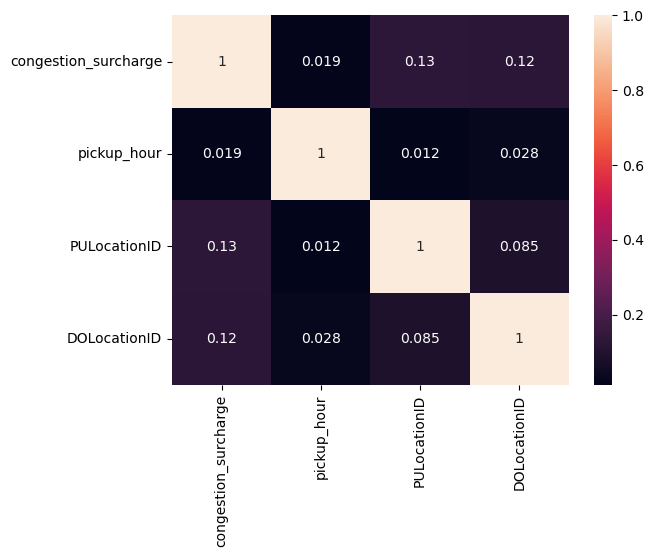

In [52]:
## It seems there are only 3 values for congestion surcharge 
## Lets see if there is correlation between congestion surcharge , hours and PULocationID and DOLocationID
cols_corr = sampled_df[['congestion_surcharge', 'pickup_hour', 'PULocationID', 'DOLocationID']].corr()
sns.heatmap(cols_corr, annot=True)
plt.show()

In [53]:
## Looks like there is no correlation and also the congestion_surcharge of 2.5 is the widely charged rate. 
## Hence will impute NaN with the same
sampled_df['congestion_surcharge'].fillna(2.5, inplace=True)

In [54]:
sampled_df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
pickup_hour                  0
pickup_day                   0
pickup_month                 0
airport_fee              64875
dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [55]:
sampled_df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
pickup_hour                  0
pickup_day                   0
pickup_month                 0
airport_fee              64875
dtype: int64

In [56]:
# Handle any remaining missing values
## There are still missing values for airport_fee
## Lets check the RatecodeID for the rows where airport fee is null
sampled_df[sampled_df['airport_fee'].isnull()]['RatecodeID'].value_counts()


RatecodeID
1.0    64875
Name: count, dtype: int64

In [57]:
## We can see that all the missing values are for RatecodeID 1
## Lets find mean/median of airport_fee where RatecodeID = 1.0
sampled_df[sampled_df['RatecodeID'] == 1.0]['airport_fee'].median()

0.0

In [58]:
# Since median of RatecodeID is 0.0 and all the missing value of airport_fee is from RatecodeID 1.0 hence we can impute
# the missing rows with 0.0
sampled_df['airport_fee'].fillna(0.0, inplace=True)

In [59]:
sampled_df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_hour              0
pickup_day               0
pickup_month             0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [61]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
print(sampled_df.describe())


           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.866656e+06                     1866656                     1866656   
mean   1.744695e+00  2023-07-02 23:22:53.948297  2023-07-02 23:40:22.305996   
min    1.000000e+00         2001-01-01 00:06:49         2001-01-01 15:42:11   
25%    1.000000e+00  2023-04-02 18:08:22.250000         2023-04-02 18:26:04   
50%    2.000000e+00  2023-06-27 19:25:17.500000  2023-06-27 19:40:18.500000   
75%    2.000000e+00  2023-10-06 23:34:45.500000  2023-10-06 23:51:42.500000   
max    6.000000e+00         2024-01-01 00:01:34         2024-01-01 20:50:55   
std    4.414298e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.866656e+06   1.866656e+06  1.866656e+06  1.866656e+06   
mean      1.378095e+00   3.860210e+00  1.620102e+00  1.652366e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

In [ ]:
## The outliers as per the above are there for the following columns which must be cleaned.
# 1. passenger_count
# 2. trip_distance - with max value as 126360
# 3. RatecodeID - Data dictionary has only 1 to 6.
# 4. payment_type  - 0 is not a payment type
# 5. fare_amount - which has max value as 143163.
# 6. mta_tax - should not be more than 0.5 but we see max value as 4.0
# 7. tip_amount - max value of 223 tip seems to be too much for a tip
# 8. tolls_amount - 143 seems to be too much for a toll amount. 
# 9. total amount - which could be due to the outliers as in fare_amount since total amount is sum of the all the fees.
# 10. tpep_pickup_datetime and tpep_dropoff_datetime too has outliers. Since we collected data for 2023 but we could see date from 2001 too.

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [62]:
# remove passenger_count > 6
sampled_df = sampled_df[sampled_df['passenger_count'] <= 6]

In [63]:
sampled_df['passenger_count'].value_counts()

passenger_count
1.0    1442155
2.0     277229
3.0      68967
4.0      38542
5.0      23875
6.0      15866
Name: count, dtype: int64

In [64]:
# Continue with outlier handling
# Checking the rows where trip_distance is < 1 and fare_amount is greater than 300
sampled_df[(sampled_df['trip_distance'] < 1) & (sampled_df['fare_amount'] > 300) ]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
54001           1  2023-01-09 16:17:32   2023-01-09 16:20:41              1.0   
104965          2  2023-01-19 20:58:47   2023-01-19 20:58:51              4.0   
206079          2  2023-10-09 21:36:01   2023-10-09 21:39:15              1.0   
222676          1  2023-10-13 18:22:04   2023-10-13 18:22:38              1.0   
272960          2  2023-10-20 01:11:27   2023-10-20 01:13:03              1.0   
472849          2  2023-11-26 16:04:06   2023-11-26 16:04:12              1.0   
537026          2  2023-12-07 23:39:43   2023-12-07 23:39:59              1.0   
645683          2  2023-12-24 14:01:07   2023-12-24 14:01:44              1.0   
713065          2  2023-03-23 13:16:50   2023-03-23 14:51:55              1.0   
721509          1  2023-03-31 16:56:04   2023-03-31 16:57:02              1.0   
801429          2  2023-03-19 14:58:50   2023-03-19 14:59:46              4.0   
869039          1  2023-06-08 04:59:03   2023-06-08 04:59:38              2.0   
879805          2  2023-06-10 01:58:47   2023-06-10 01:59:16              1.0   
882020          1  2023-06-10 10:40:51   2023-06-10 10:41:38              1.0   
916663          2  2023-06-16 17:16:53   2023-06-16 17:17:05              4.0   
935423          2  2023-06-20 15:38:20   2023-06-20 15:38:30              1.0   
940521          2  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   
957448          1  2023-06-24 19:41:42   2023-06-24 19:43:18              1.0   
982119          2  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   
995189          2  2023-08-01 22:06:03   2023-08-01 22:06:41              2.0   
1054303         2  2023-08-13 18:44:08   2023-08-13 18:44:22              4.0   
1086616         2  2023-08-20 21:39:04   2023-08-20 21:39:12              2.0   
1086625         2  2023-08-20 21:56:48   2023-08-20 21:56:59              2.0   
1106898         2  2023-08-25 16:13:28   2023-08-25 16:13:42              2.0   
1116815         2  2023-08-27 18:46:43   2023-08-27 18:47:01              1.0   
1173761         1  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
1285297         1  2023-04-02 22:28:32   2023-04-02 22:29:14              1.0   
1305093         2  2023-04-05 21:16:43   2023-04-05 21:25:57              1.0   
1435657         2  2023-04-30 14:21:36   2023-04-30 14:22:11              4.0   
1512706         1  2023-05-15 13:28:42   2023-05-15 13:29:45              1.0   
1556802         2  2023-05-19 21:04:06   2023-05-19 21:04:22              2.0   
1575518         2  2023-05-22 19:38:15   2023-05-22 19:38:38              1.0   
1588134         2  2023-05-24 02:11:35   2023-05-24 02:11:57              1.0   
1679444         2  2023-07-15 16:08:15   2023-07-15 16:08:35              2.0   
1714379         1  2023-07-21 17:12:41   2023-07-21 17:14:50              1.0   
1744607         2  2023-07-27 19:30:15   2023-07-27 19:30:50              1.0   
1763563         2  2023-09-02 22:01:05   2023-09-02 22:01:20              1.0   
1772369         1  2023-09-05 10:16:13   2023-09-05 10:20:56              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
54001             0.00         5.0           141           141             3   
104965            0.00         5.0           265           265             1   
206079            0.00         5.0           100           100             1   
222676            0.00         5.0           168           168             2   
272960            0.00         5.0           265           265             2   
472849            0.00         5.0           265           265             1   
537026            0.00         5.0           265           265             2   
645683            0.00         5.0            14            14             1   
713065            0.00         5.0           265           265             1   
721509            0.00         5.0           181 

In [65]:
# Since with the trip distance < 1 rate cant be that high so seems like an error hence deleting these as only 38 such rows are found
sampled_df = sampled_df[~((sampled_df['trip_distance'] < 1) & (sampled_df['fare_amount'] > 300) )]

In [66]:
## Lets look at more for outliers in trip_distance
sampled_df.trip_distance.describe()


count    1.866596e+06
mean     3.860272e+00
std      1.281993e+02
min      0.000000e+00
25%      1.050000e+00
50%      1.800000e+00
75%      3.410000e+00
max      1.263605e+05
Name: trip_distance, dtype: float64

In [67]:
# As in the city, trip_distance being very high like more than 250 miles doesnt make sense. Lets check them
sampled_df[sampled_df['trip_distance'] > 250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
10473           2  2023-01-24 06:27:00   2023-01-24 07:18:00              1.0   
14023           2  2023-01-25 03:21:00   2023-01-25 03:25:00              1.0   
44579           2  2023-01-07 20:02:05   2023-01-07 20:07:10              1.0   
141073          2  2023-01-28 18:16:37   2023-01-28 18:41:22              1.0   
142100          2  2023-01-28 20:39:00   2023-01-28 20:59:00              1.0   
157755          2  2023-10-30 07:13:00   2023-10-30 07:33:00              1.0   
439759          2  2023-11-20 11:46:00   2023-11-20 12:30:00              1.0   
498801          2  2023-12-30 13:24:39   2023-12-30 14:07:52              1.0   
543778          2  2023-12-08 23:45:00   2023-12-09 00:14:00              1.0   
551395          2  2023-12-10 01:11:00   2023-12-10 01:25:00              1.0   
554860          2  2023-12-10 17:10:00   2023-12-10 17:12:00              1.0   
640749          1  2023-12-27 06:00:00   2023-12-27 07:22:13              1.0   
674969          2  2023-03-02 15:45:34   2023-03-02 16:00:45              1.0   
690009          2  2023-03-03 22:42:00   2023-03-03 23:08:00              1.0   
737421          2  2023-03-10 19:12:22   2023-03-10 19:18:55              1.0   
823545          2  2023-03-30 14:07:00   2023-03-30 15:32:00              1.0   
842508          2  2023-06-03 06:23:00   2023-06-03 06:31:00              1.0   
897516          2  2023-06-13 09:59:00   2023-06-13 10:12:00              1.0   
944075          2  2023-06-22 06:34:00   2023-06-22 06:47:00              1.0   
968805          2  2023-06-26 13:45:44   2023-06-26 13:51:12              2.0   
986585          2  2023-06-30 23:40:00   2023-07-01 00:11:00              1.0   
1075236         1  2023-08-18 14:26:43   2023-08-18 15:04:09              1.0   
1180210         2  2023-02-10 19:53:45   2023-02-10 20:01:48              2.0   
1204406         2  2023-02-15 13:06:00   2023-02-15 13:40:00              1.0   
1216100         2  2023-02-17 07:17:00   2023-02-17 07:25:00              1.0   
1219504         2  2023-02-17 22:36:00   2023-02-17 23:00:00              1.0   
1230728         2  2023-02-19 22:06:00   2023-02-19 22:22:00              1.0   
1340474         2  2023-04-17 10:56:00   2023-04-17 11:25:00              1.0   
1408419         2  2023-04-22 14:58:35   2023-04-22 15:23:03              1.0   
1454609         2  2023-05-08 15:22:51   2023-05-08 16:02:16              1.0   
1492733         2  2023-05-11 19:43:07   2023-05-11 20:01:07              1.0   
1519626         2  2023-05-12 15:12:50   2023-05-12 16:03:58              1.0   
1580844         2  2023-05-25 11:10:00   2023-05-25 11:35:00              1.0   
1599643         2  2023-05-26 16:22:00   2023-05-26 16:56:00              1.0   
1609142         2  2023-05-29 13:13:00   2023-05-29 14:23:00              1.0   
1654163         2  2023-07-10 17:33:19   2023-07-10 19:14:56              1.0   
1665627         2  2023-07-12 21:05:00   2023-07-12 21:10:00              1.0   
1669083         2  2023-07-13 15:38:02   2023-07-13 16:09:33              1.0   
1674504         2  2023-07-14 15:32:30   2023-07-14 16:18:58              1.0   
1705373         2  2023-07-20 04:22:00   2023-07-20 04:42:00              1.0   
1745960         2  2023-07-28 08:10:00   2023-07-28 08:47:00              1.0   
1803245         2  2023-09-10 13:44:00   2023-09-10 14:16:00              1.0   
1841608         1  2023-09-17 07:23:50   2023-09-17 07:48:20              1.0   
1854109         2  2023-09-19 19:36:56   2023-09-19 19:48:16              1.0   
1872185         2  2023-09-26 19:41:43   2023-09-26 20:01:00              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
10473          3253.99         1.0           230            90             0   
14023          7621.72         1.0            48           163             0   
44579           721.26         1.0        

In [68]:
#Since there are just 45 rows as such, it would be safe to delete this as it wont affect the 
#analysis with the sampled data as its insignificant
sampled_df = sampled_df[~(sampled_df['trip_distance'] > 250)]
sampled_df.trip_distance.describe()

count    1.866551e+06
mean     3.453605e+00
std      4.542295e+00
min      0.000000e+00
25%      1.050000e+00
50%      1.800000e+00
75%      3.410000e+00
max      2.048600e+02
Name: trip_distance, dtype: float64

In [69]:
#Lets now look at rows where the trip_distance is 0 and fare amount is 0.0 but PULocaltionID and DOLocationID is not same
sampled_df[(sampled_df['trip_distance'] == 0.0) & (sampled_df['fare_amount'] == 0.0) & (sampled_df['PULocationID'] != sampled_df['DOLocationID'])]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
60037           1  2023-01-10 19:28:41   2023-01-10 20:14:48              1.0   
96343           1  2023-01-18 15:42:00   2023-01-18 15:42:00              1.0   
96542           1  2023-01-18 16:23:49   2023-01-18 16:23:49              1.0   
105695          1  2023-01-19 21:57:21   2023-01-19 22:17:44              1.0   
146088          1  2023-01-29 18:33:14   2023-01-29 18:33:14              1.0   
156302          1  2023-10-01 19:30:44   2023-10-01 19:30:44              1.0   
164320          1  2023-10-02 14:05:53   2023-10-02 14:06:12              1.0   
167903          1  2023-10-03 09:03:22   2023-10-03 09:30:54              1.0   
179235          1  2023-10-05 08:58:47   2023-10-05 08:59:12              1.0   
259634          1  2023-10-17 21:13:10   2023-10-17 21:13:10              1.0   
274525          1  2023-10-20 11:05:37   2023-10-20 11:05:37              1.0   
279410          1  2023-10-21 02:43:51   2023-10-21 02:43:51              1.0   
295027          1  2023-10-24 21:22:17   2023-10-24 21:22:17              1.0   
296946          1  2023-10-25 09:26:51   2023-10-25 09:43:58              1.0   
316430          1  2023-10-28 11:10:27   2023-10-28 11:10:27              1.0   
362050          1  2023-11-07 08:42:41   2023-11-07 08:42:41              1.0   
367260          1  2023-11-08 04:38:05   2023-11-08 04:41:18              1.0   
369856          1  2023-11-08 15:29:15   2023-11-08 15:29:47              1.0   
404629          1  2023-11-14 13:15:43   2023-11-14 13:25:53              1.0   
423040          1  2023-11-17 10:27:38   2023-11-17 10:27:38              1.0   
423102          1  2023-11-17 10:27:39   2023-11-17 10:27:39              1.0   
423896          1  2023-11-17 13:28:12   2023-11-17 13:52:16              1.0   
454649          1  2023-11-22 05:13:37   2023-11-22 05:40:20              1.0   
512909          1  2023-12-03 21:22:01   2023-12-03 21:22:01              1.0   
592112          1  2023-12-15 21:26:17   2023-12-15 21:26:17              1.0   
605446          1  2023-12-18 09:31:12   2023-12-18 09:31:12              1.0   
617785          1  2023-12-20 13:40:27   2023-12-20 13:40:27              1.0   
643553          1  2023-12-27 20:51:43   2023-12-27 21:00:02              3.0   
663932          1  2023-03-28 23:33:55   2023-03-28 23:33:55              1.0   
690334          1  2023-03-03 12:13:56   2023-03-03 12:15:45              1.0   
718296          1  2023-03-31 23:23:20   2023-03-31 23:23:20              1.0   
733441          1  2023-03-09 11:16:27   2023-03-09 12:23:00              1.0   
763863          1  2023-03-14 09:05:35   2023-03-14 09:11:05              1.0   
855414          1  2023-06-06 16:55:01   2023-06-06 16:55:01              1.0   
861373          1  2023-06-07 15:42:45   2023-06-07 16:41:49              1.0   
868102          1  2023-06-08 16:33:15   2023-06-08 16:33:15              1.0   
910991          1  2023-06-15 17:56:56   2023-06-15 18:20:13              1.0   
956109          1  2023-06-24 16:05:27   2023-06-24 16:05:27              1.0   
976925          1  2023-06-28 21:29:09   2023-06-28 21:32:08              1.0   
1066701         1  2023-08-16 15:34:24   2023-08-16 15:35:12              2.0   
1131923         1  2023-02-01 08:20:36   2023-02-01 08:20:36              6.0   
1146078         1  2023-02-03 14:44:55   2023-02-03 14:44:55              1.0   
1269310         1  2023-02-27 13:35:59   2023-02-27 13:35:59              2.0   
1327942         1  2023-04-08 04:42:31   2023-04-08 04:42:31              1.0   
1403467         1  2023-04-21 13:02:29   2023-04-21 13:02:29              1.0   
1412066         1  2023-04-23 17:45:49   2023-04-23 17:45:49              1.0   
1423482         2  2023-04-28 13:52:30   2023-04-28 14:43:03              1.0   
1439109         2  2023-05-01 11:25:14   2023-05-01 11:25:59              1.0   
1439439         2  2023-05-01 13:02:16  

In [70]:
# Since only 60 such rows are present, its insignificant and safe to delete
sampled_df = sampled_df[~((sampled_df['trip_distance'] == 0.0) & (sampled_df['fare_amount'] == 0.0) & (sampled_df['PULocationID'] != sampled_df['DOLocationID']))]
sampled_df.shape

(1866491, 21)

In [71]:
# Lets look at the payment type 
sampled_df.payment_type.value_counts()

payment_type
1    1469215
2     310706
0      64845
4      13478
3       8247
Name: count, dtype: int64

In [72]:
# There are nearly 65K rows where payment type is 0. but in the data dictionary, we dont have any payment type defined as 0
# Lets look at those rows
payment_zero = sampled_df[sampled_df['payment_type'] == 0]
payment_zero['fare_amount'].sum()

1463829.9200000002

In [73]:
# Since there is significant amount of fare associated with the payment_type 0, lets try to impute the value 
# of payment type where its 0. Since it can't be made out lets use Data Dictionary where 5 is marked as UnKnown Payment Type
sampled_df['payment_type'] = sampled_df['payment_type'].replace(0,5)

In [74]:
sampled_df.payment_type.value_counts()

payment_type
1    1469215
2     310706
5      64845
4      13478
3       8247
Name: count, dtype: int64

In [75]:
sampled_df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.866491e+06                     1866491                     1866491   
mean   1.744709e+00  2023-07-02 23:22:18.494357  2023-07-02 23:39:46.874728   
min    1.000000e+00         2001-01-01 00:06:49         2001-01-01 15:42:11   
25%    1.000000e+00  2023-04-02 18:06:51.500000         2023-04-02 18:25:09   
50%    2.000000e+00         2023-06-27 19:25:16         2023-06-27 19:40:16   
75%    2.000000e+00         2023-10-06 23:34:51         2023-10-06 23:51:44   
max    6.000000e+00         2024-01-01 00:01:34         2024-01-01 20:50:55   
std    4.414223e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.866491e+06   1.866491e+06  1.866491e+06  1.866491e+06   
mean      1.378027e+00   3.453716e+00  1.619572e+00  1.652366e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.410000e+00  1.000000e+00  2.340000e+02   
max       6.000000e+00   2.048600e+02  9.900000e+01  2.650000e+02   
std       8.697111e-01   4.542326e+00  7.311529e+00  6.400007e+01   

       DOLocationID  payment_type   fare_amount  ...       mta_tax  \
count  1.866491e+06  1.866491e+06  1.866491e+06  ...  1.866491e+06   
mean   1.640139e+02  1.335932e+00  1.987352e+01  ...  4.953462e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  ...  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  ...  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  ...  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.224000e+01  ...  5.000000e-01   
max    2.650000e+02  5.000000e+00  1.375000e+03  ...  4.000000e+00   
std    6.981638e+01  8.319526e-01  1.816397e+01  ...  4.827405e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.866491e+06  1.866491e+06           1.866491e+06  1.866491e+06   
mean   3.555103e+00  5.996440e-01           9.990996e-01  2.895038e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.106000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.100000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.435190e+03   
std    4.055868e+00  2.192069e+00           2.751757e-02  2.275233e+01   

       congestion_surcharge   pickup_hour    pickup_day  pickup_month  \
count          1.866491e+06  1.866491e+06  1.866491e+06  1.866491e+06   
mean           2.314391e+00  1.426859e+01  1.551772e+01  6.545381e+00   
min            0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00   
25%            2.500000e+00  1.100000e+01  8.000000e+00  4.000000e+00   
50%            2.500000e+00  1.500000e+01  1.500000e+01  6.000000e+00   
75%            2.500000e+00  1.900000e+01  2.300000e+01  1.000000e+01   
max            2.500000e+00  2.300000e+01  3.100000e+01  1.200000e+01   
std            6.554166e-01  5.814464e+00  8.694856e+00  3.467867e+00   

        airport_fee  
count  1.866491e+06  
mean   1.387645e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.750000e+00  
std    4.587061e-01  

[8 rows x 21 columns]

In [76]:
# We have seen that RatecodeID value as 99 but in the data dictionary there is no such value mentioned.
# Lets look into them
ratecode_id_99 = sampled_df[sampled_df['RatecodeID'] > 6]
ratecode_id_99.shape

(10434, 21)

In [77]:
sampled_df.RatecodeID.value_counts()

RatecodeID
1.0     1765553
2.0       70787
99.0      10434
5.0        9990
3.0        6040
4.0        3684
6.0           3
Name: count, dtype: int64

In [78]:
sampled_df['RatecodeID'].quantile(0.90)

1.0

In [79]:
# Since the RatecodeID at 90th percentile is 1 and also the median value is 1 hence lets replace the RatecodeID 99 with 1
sampled_df['RatecodeID'] = sampled_df['RatecodeID'].replace(99.0, 1.0)

In [80]:
sampled_df.RatecodeID.value_counts()

RatecodeID
1.0    1775987
2.0      70787
5.0       9990
3.0       6040
4.0       3684
6.0          3
Name: count, dtype: int64

In [81]:
# We also know from the data dictionary that mta_tax can only be 0.50 so lets check that
sampled_df.mta_tax.value_counts()

mta_tax
0.50    1849034
0.00      17399
0.80         37
0.05         17
4.00          2
0.30          1
3.50          1
Name: count, dtype: int64

In [82]:
# Lets clean all those rows where mta_tax is greater than 0.50
sampled_df = sampled_df[~(sampled_df['mta_tax'] > 0.50)]
sampled_df['mta_tax'].value_counts()

mta_tax
0.50    1849034
0.00      17399
0.05         17
0.30          1
Name: count, dtype: int64

In [83]:
sampled_df.shape

(1866451, 21)

In [84]:
## We have seen some outliers in pick date time and drop off datetime too where it was of the year 2001. Lets analyze
sampled_df[sampled_df['tpep_pickup_datetime'] < '2023-01-01']

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3879            2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
3894            2  2022-12-31 23:07:51   2022-12-31 23:19:58              1.0   
326363          2  2009-01-01 00:05:00   2009-01-01 00:13:17              1.0   
658191          2  2001-01-01 00:06:49   2001-01-01 15:42:11              2.0   
1135665         2  2008-12-31 23:11:10   2009-01-01 08:14:17              1.0   
1274874         2  2001-01-01 00:08:31   2001-01-01 16:01:27              1.0   
1280573         2  2002-12-31 23:18:49   2002-12-31 23:33:34              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3879              0.86         1.0           141           140             1   
3894              2.90         1.0           263            41             1   
326363            1.58         1.0           236           238             2   
658191            7.41         1.0           161           231             1   
1135665           2.95         1.0           132            10             2   
1274874          18.63         2.0           132           264             1   
1280573           3.03         1.0           141            79             2   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
3879             6.5  ...      0.5        2.00          0.00   
3894            15.6  ...      0.5        3.00          0.00   
326363          10.0  ...      0.5        0.00          0.00   
658191          35.9  ...      0.5        7.00          0.00   
1135665         13.5  ...      0.5        0.00          0.00   
1274874         70.0  ...      0.5       16.46          6.55   
1280573         17.0  ...      0.5        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
3879                       1.0         13.50                   2.5   
3894                       1.0         23.60                   2.5   
326363                     1.0         14.00                   2.5   
658191                     1.0         46.90                   2.5   
1135665                    1.0         16.25                   0.0   
1274874                    1.0         98.76                   2.5   
1280573                    1.0         21.00                   2.5   

         pickup_hour  pickup_day  pickup_month  airport_fee  
3879              23          31            12         0.00  
3894              23          31            12         0.00  
326363             0           1             1         0.00  
658191             0           1             1         0.00  
1135665           23          31            12         1.25  
1274874            0           1             1         1.75  
1280573           23          31            12         0.00  

[7 rows x 21 columns]

In [85]:
## Lets drop them
sampled_df = sampled_df[~(sampled_df['tpep_pickup_datetime'] < '2023-01-01')]

In [86]:
# Now lets check for the Vendor ID. As per data dictionary it can have only 1 and 2 as value
sampled_df.VendorID.value_counts()

VendorID
2    1387776
1     478226
6        442
Name: count, dtype: int64

In [87]:
# In the above output we can see there is a vendorID as 6. Lets drop it.
sampled_df = sampled_df[sampled_df['VendorID'] < 3]

In [88]:
# Do any columns need standardising?
## Since passenger count can be only whole numbers and not in fraction. So lets change the dataType of passenger_count 
## from float to int
sampled_df['passenger_count'] = sampled_df['passenger_count'].astype('int')
## Also this clearly is a Categorical column hence change the type to category
sampled_df['passenger_count'] = sampled_df['passenger_count'].astype('category')
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1866002 entries, 0 to 1896419
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        category      
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  pickup_hour            int32         
 18  pickup_day             int3

In [90]:
## Similary as per data dictionary the RatecodeId can have only int value so change that data type to int and then category
sampled_df['RatecodeID'] = sampled_df['RatecodeID'].astype(int)
sampled_df['RatecodeID'] = sampled_df['RatecodeID'].astype('category')
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1866002 entries, 0 to 1896419
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        category      
 4   trip_distance          float64       
 5   RatecodeID             category      
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  pickup_hour            int32         
 18  pickup_day             int3

In [91]:
sampled_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17               2   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12               4   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52               1   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20               2   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15               1   

   trip_distance RatecodeID  PULocationID  DOLocationID  payment_type  \
0           2.85          1           263            41             1   
1           1.32          1            90           137             1   
2           3.17          1            79           141             1   
3           3.80          1           142           107             2   
4           7.97          1           140            17             5   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0        15.60  ...      0.5        4.12           0.0                    1.0   
1        12.80  ...      0.5        3.56           0.0                    1.0   
2        14.90  ...      0.5        3.98           0.0                    1.0   
3        24.70  ...      0.5        0.00           0.0                    1.0   
4        36.83  ...      0.5        8.17           0.0                    1.0   

   total_amount  congestion_surcharge  pickup_hour  pickup_day  pickup_month  \
0         24.72                   2.5            0           1             1   
1         21.36                   2.5            0           1             1   
2         23.88                   2.5            0           1             1   
3         29.70                   2.5            0           1             1   
4         49.00                   2.5            0           1             1   

   airport_fee  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 21 columns]

In [92]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1866002 entries, 0 to 1896419
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        category      
 4   trip_distance          float64       
 5   RatecodeID             category      
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  pickup_hour            int32         
 18  pickup_day             int3

In [93]:
sampled_df.shape

(1866002, 21)

In [94]:
## Lets find all the columns which is categorical but defined as numerical and change the type
## pickup_hour, pickup_day, pickup_month, payment_type, VendorID they all are Categorical column hence change the type
sampled_df['pickup_hour'] = sampled_df['pickup_hour'].astype('category')
sampled_df['pickup_month'] = sampled_df['pickup_month'].astype('category')
sampled_df['pickup_day'] = sampled_df['pickup_day'].astype('category')
sampled_df['payment_type'] = sampled_df['payment_type'].astype('category')
sampled_df['VendorID'] = sampled_df['VendorID'].astype('category')

In [95]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1866002 entries, 0 to 1896419
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        category      
 4   trip_distance          float64       
 5   RatecodeID             category      
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           category      
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  pickup_hour            category      
 18  pickup_day             cate

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [96]:
sampled_df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Categorical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` : Numerical
* `extra` : Numerical
* `mta_tax` : Numerical
* `tip_amount` : Numerical
* `tolls_amount` : Numerical
* `improvement_surcharge` : Numerical
* `total_amount` : Numerical
* `congestion_surcharge` : Numerical
* `airport_fee` : Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [97]:
## Define a function which would plot the bar graph
def plot_bar(data_frame, xcol, ycol, xlabel, ylabel, title):
    sns.barplot(x=xcol, y=ycol, data=data_frame)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return

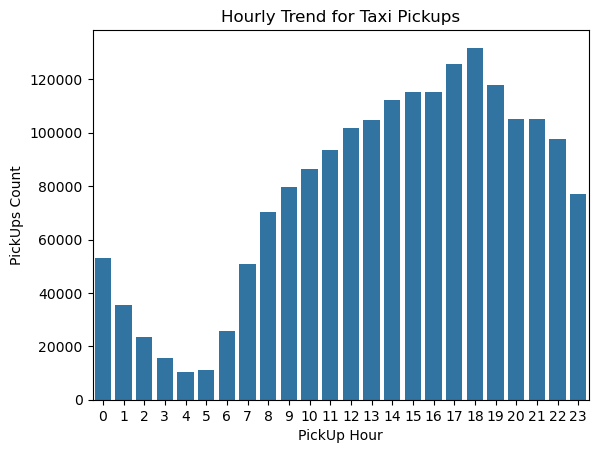

In [98]:
# Find and show the hourly trends in taxi pickups
# First lets see the count grouped by hour
hourly_grp = sampled_df.groupby('pickup_hour').size().reset_index(name='pickup_count')
plot_bar(data_frame=hourly_grp, xcol='pickup_hour', ycol='pickup_count', xlabel='PickUp Hour', ylabel='PickUps Count', title='Hourly Trend for Taxi Pickups')
plt.xticks(ticks=hourly_grp['pickup_hour'])
plt.show()

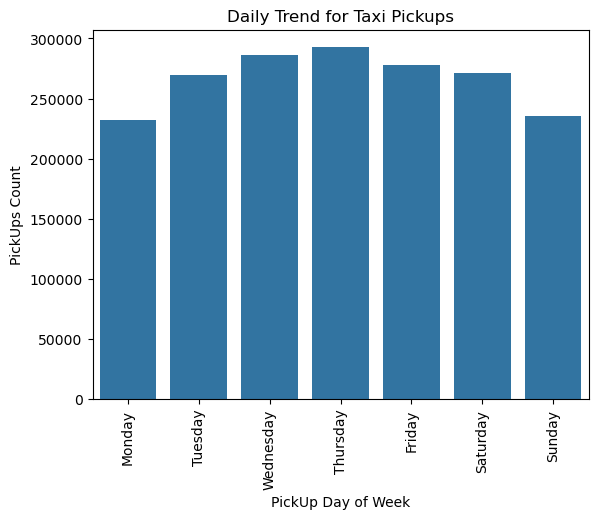

In [99]:
# Find and show the daily trends in taxi pickups (days of the week)
##Extract days of week from pickup date time
sampled_df['pickup_day_of_week'] = pd.to_datetime(sampled_df['tpep_pickup_datetime']).dt.day_name()
# Lets define the day of week as Categorical Data Type
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sampled_df['pickup_day_of_week'] = pd.Categorical(sampled_df['pickup_day_of_week'], categories=day_of_week, ordered=True)
## Group the data by day of the week
daily_grp = sampled_df.groupby('pickup_day_of_week').size().reset_index(name='pickup_count')
## Plot the graph
plot_bar(data_frame=daily_grp, xcol='pickup_day_of_week', ycol='pickup_count', xlabel='PickUp Day of Week', ylabel='PickUps Count', title='Daily Trend for Taxi Pickups')
plt.xticks(ticks=daily_grp['pickup_day_of_week'], rotation=90)
plt.show()

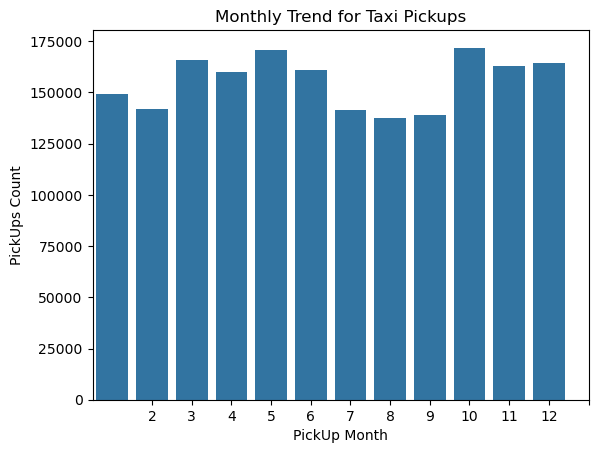

In [100]:
# Show the monthly trends in pickups
## Group the data by month
monthly_grp = sampled_df.groupby('pickup_month').size().reset_index(name='pickup_count')
## Plot the graph
plot_bar(data_frame=monthly_grp, xcol='pickup_month', ycol='pickup_count', xlabel='PickUp Month', ylabel='PickUps Count', title='Monthly Trend for Taxi Pickups')
plt.xticks(ticks=monthly_grp['pickup_month'])
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [101]:
# Analyse the above parameters
sampled_df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe()


fare_amount    tip_amount  total_amount  trip_distance
count  1.866002e+06  1.866002e+06  1.866002e+06   1.866002e+06
mean   1.986788e+01  3.555963e+00  2.894674e+01   3.452185e+00
std    1.816051e+01  4.055999e+00  2.275228e+01   4.541029e+00
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00
25%    9.300000e+00  1.000000e+00  1.596000e+01   1.050000e+00
50%    1.350000e+01  2.850000e+00  2.101000e+01   1.800000e+00
75%    2.210000e+01  4.450000e+00  3.100000e+01   3.400000e+00
max    1.375000e+03  2.230800e+02  1.435190e+03   2.048600e+02

In [102]:
## Check where the value for the above columns are 0
sampled_df[(sampled_df['fare_amount'] == 0.0) | (sampled_df['tip_amount'] == 0.0) | (sampled_df['total_amount'] == 0.0) | (sampled_df['trip_distance'] == 0.0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
3              2  2023-01-01 00:27:26   2023-01-01 00:52:20               2   
7              2  2023-01-01 00:35:52   2023-01-01 00:43:38               2   
9              2  2023-01-01 00:17:43   2023-01-01 01:03:15               1   
10             1  2023-01-01 00:53:06   2023-01-01 01:01:57               1   
20             2  2023-01-01 00:42:41   2023-01-01 01:17:18               1   
...          ...                  ...                   ...             ...   
1896389        1  2023-09-30 22:31:10   2023-09-30 23:35:16               1   
1896395        2  2023-09-30 22:21:00   2023-09-30 22:24:33               1   
1896399        2  2023-09-30 22:53:11   2023-09-30 23:17:28               1   
1896411        2  2023-09-30 22:48:27   2023-09-30 23:02:02               1   
1896416        2  2023-09-30 22:35:58   2023-09-30 22:50:21               1   

         trip_distance RatecodeID  PULocationID  DOLocationID payment_type  \
3                 3.80          1           142           107            2   
7                 1.41          1           161           141            2   
9                27.99          1           132           158            2   
10                1.00          1           261           231            4   
20               18.23          2           132           246            2   
...                ...        ...           ...           ...          ...   
1896389          18.70          1           132           116            2   
1896395           0.61          1            88           261            2   
1896399           0.00          1           264           264            1   
1896411           2.70          1           209            52            2   
1896416           3.56          1           141            41            2   

         fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
3               24.7  ...         0.0          0.00                    1.0   
7               10.0  ...         0.0          0.00                    1.0   
9              105.9  ...         0.0          6.55                    1.0   
10               8.6  ...         0.0          0.00                    1.0   
20              70.0  ...         0.0          6.55                    1.0   
...              ...  ...         ...           ...                    ...   
1896389         84.9  ...         0.0          6.94                    1.0   
1896395          5.8  ...         0.0          0.00                    1.0   
1896399         19.8  ...         2.5          0.00                    1.0   
1896411         16.3  ...         0.0          0.00                    1.0   
1896416         18.4  ...         0.0          0.00                    1.0   

         total_amount  congestion_surcharge  pickup_hour  pickup_day  \
3               29.70                   2.5            0           1   
7               15.00                   2.5            0           1   
9              118.70                   2.5            0           1   
10              13.60                   2.5            0           1   
20              81.80                   2.5            0           1   
...               ...                   ...          ...         ...   
1896389         96.09                   0.0           22          30   
1896395         10.80                   2.5           22          30   
1896399         27.30                   2.5           22          30   
1896411         21.30                   2.5           22          30   
1896416         23.40                   2.5           22          30   

        pickup_month airport_fee pickup_day_of_week  
3                  1        0.00             Sunday  
7                  1        0.00             Sunday  
9                  1        1.25             Sunday  
10                 1        0.00             Sunday  
20                 1        1.25             Sunda

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [103]:
# Create a df with non zero entries for the selected parameters.
## Lets first drop the rows where we have 0 for all of the selected parameters
non_zero_df = sampled_df[~((sampled_df['fare_amount'] == 0.0) & (sampled_df['tip_amount'] == 0.0) & (sampled_df['total_amount'] == 0.0) & (sampled_df['trip_distance'] == 0.0))]
non_zero_df.shape

(1865835, 22)

In [104]:
## Now lets see where the fare_amount, total_amount is zero but trip_distance is not 0
non_zero_df[(non_zero_df['fare_amount'] == 0.0) & (non_zero_df['total_amount'] == 0.0) & (non_zero_df['trip_distance'] != 0.0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
13826          1  2023-01-24 16:15:41   2023-01-24 16:23:42               1   
14196          1  2023-01-25 07:49:29   2023-01-25 08:01:14               1   
80845          1  2023-01-14 14:47:05   2023-01-14 15:34:07               1   
91709          1  2023-01-17 15:23:25   2023-01-17 15:46:25               1   
127842         1  2023-01-26 14:25:31   2023-01-26 14:25:49               1   
...          ...                  ...                   ...             ...   
1825409        1  2023-09-14 16:28:01   2023-09-14 16:30:12               1   
1831778        1  2023-09-15 14:58:59   2023-09-15 15:02:47               1   
1869872        1  2023-09-26 13:16:50   2023-09-26 13:48:54               1   
1871654        1  2023-09-26 18:57:05   2023-09-26 19:07:08               1   
1879773        1  2023-09-28 07:00:00   2023-09-28 07:54:54               1   

         trip_distance RatecodeID  PULocationID  DOLocationID payment_type  \
13826              3.5          1           132            10            4   
14196              2.2          1            24           142            1   
80845             20.8          2           132           239            4   
91709              1.8          1           162           236            5   
127842             0.8          1           231           231            3   
...                ...        ...           ...           ...          ...   
1825409           11.3          1           138           138            3   
1831778            0.4          1           236           236            4   
1869872            0.4          1            61            61            1   
1871654            2.7          1           205           218            1   
1879773            3.0          1            95           216            1   

         fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
13826            0.0  ...         0.0           0.0                    0.0   
14196            0.0  ...         0.0           0.0                    0.0   
80845            0.0  ...         0.0           0.0                    0.0   
91709            0.0  ...         0.0           0.0                    0.0   
127842           0.0  ...         0.0           0.0                    0.0   
...              ...  ...         ...           ...                    ...   
1825409          0.0  ...         0.0           0.0                    0.0   
1831778          0.0  ...         0.0           0.0                    0.0   
1869872          0.0  ...         0.0           0.0                    0.0   
1871654          0.0  ...         0.0           0.0                    0.0   
1879773          0.0  ...         0.0           0.0                    0.0   

         total_amount  congestion_surcharge  pickup_hour  pickup_day  \
13826             0.0                   0.0           16          24   
14196             0.0                   0.0            7          25   
80845             0.0                   0.0           14          14   
91709             0.0                   2.5           15          17   
127842            0.0                   0.0           14          26   
...               ...                   ...          ...         ...   
1825409           0.0                   0.0           16          14   
1831778           0.0                   0.0           14          15   
1869872           0.0                   0.0           13          26   
1871654           0.0                   0.0           18          26   
1879773           0.0                   0.0            7          28   

        pickup_month airport_fee pickup_day_of_week  
13826              1         0.0            Tuesday  
14196              1         0.0          Wednesday  
80845              1         0.0           Saturday  
91709              1         0.0            Tuesday  
127842             1         0.0           Thursda

In [105]:
#Looks like these are error and we can delete them as they are just 79 in number which is insignificant
non_zero_df = non_zero_df[~((non_zero_df['fare_amount'] == 0.0) & (non_zero_df['total_amount'] == 0.0) & (non_zero_df['trip_distance'] != 0.0))]
non_zero_df.shape

(1865756, 22)

In [106]:
## Now lets see where fare_amount and total_amount where the trip_distance is also 0 in that case we can remove such entry
non_zero_df[(non_zero_df['fare_amount'] == 0.0) & (non_zero_df['total_amount'] == 0.0) & (non_zero_df['trip_distance'] == 0.0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_hour, pickup_day, pickup_month, airport_fee, pickup_day_of_week]
Index: []

[0 rows x 22 columns]

In [107]:
## Lets see the count of rows where just fare_amount is zero
non_zero_df[non_zero_df['fare_amount'] == 0.0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
9563           2  2023-01-24 21:42:10   2023-01-24 21:59:30               4   
12508          1  2023-01-24 22:00:34   2023-01-24 22:29:12               1   
23922          2  2023-01-03 08:27:38   2023-01-03 08:59:16               1   
45526          1  2023-01-07 12:41:13   2023-01-07 12:42:26               1   
49990          2  2023-01-08 11:18:17   2023-01-08 11:18:24               2   
...          ...                  ...                   ...             ...   
1832180        1  2023-09-15 18:25:20   2023-09-15 18:25:46               2   
1846489        1  2023-09-18 11:25:15   2023-09-18 11:25:52               1   
1863319        2  2023-09-25 00:12:38   2023-09-25 01:07:42               1   
1881632        2  2023-09-28 13:50:44   2023-09-28 13:50:44               1   
1893110        1  2023-09-30 13:22:42   2023-09-30 13:33:41               1   

         trip_distance RatecodeID  PULocationID  DOLocationID payment_type  \
9563              3.57          1           144            68            2   
12508            17.10          5           142           265            3   
23922             8.34          1           161           244            2   
45526             0.20          5           170           170            3   
49990             0.01          2           142           142            2   
...                ...        ...           ...           ...          ...   
1832180           2.10          4           141           141            3   
1846489           0.30          4           265           265            3   
1863319          24.18          4           138           265            2   
1881632           0.00          1           233           233            2   
1893110           2.00          5           142            48            3   

         fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
9563             0.0  ...         0.0          0.00                    1.0   
12508            0.0  ...         0.0         12.75                    1.0   
23922            0.0  ...         0.0          0.00                    1.0   
45526            0.0  ...         0.0          0.00                    1.0   
49990            0.0  ...         0.0          0.00                    1.0   
...              ...  ...         ...           ...                    ...   
1832180          0.0  ...         0.0          0.00                    1.0   
1846489          0.0  ...         0.0          0.00                    1.0   
1863319          0.0  ...         0.0          0.00                    1.0   
1881632          0.0  ...        14.2          0.00                    1.0   
1893110          0.0  ...         0.0          0.00                    1.0   

         total_amount  congestion_surcharge  pickup_hour  pickup_day  \
9563             4.00                   2.5           21          24   
12508           13.75                   0.0           22          24   
23922            4.00                   2.5            8           3   
45526            1.00                   0.0           12           7   
49990            4.00                   2.5           11           8   
...               ...                   ...          ...         ...   
1832180          6.50                   2.5           18          15   
1846489          1.50                   0.0           11          18   
1863319          3.25                   0.0            0          25   
1881632         18.20                   2.5           13          28   
1893110          1.00                   0.0           13          30   

        pickup_month airport_fee pickup_day_of_week  
9563               1        0.00            Tuesday  
12508              1        0.00            Tuesday  
23922              1        0.00            Tuesday  
45526              1        0.00           Saturday  
49990              1        0.00             Sunda

In [108]:
## Since there are only 231 rows which is insignificant number from the sample rows so lets delete them
non_zero_df = non_zero_df[~(non_zero_df['fare_amount'] == 0.0)]

In [109]:
## Lets create the list of all the financial columns 
financial_columns = ['fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee']
## Lets describe these columns 
non_zero_df[financial_columns].describe()

fare_amount         extra       mta_tax  improvement_surcharge  \
count  1.865525e+06  1.865525e+06  1.865525e+06           1.865525e+06   
mean   1.987296e+01  1.562074e+00  4.954365e-01           9.994182e-01   
std    1.816005e+01  1.820766e+00  4.754677e-02           2.214408e-02   
min    1.000000e-02  0.000000e+00  0.000000e+00           0.000000e+00   
25%    9.300000e+00  0.000000e+00  5.000000e-01           1.000000e+00   
50%    1.350000e+01  1.000000e+00  5.000000e-01           1.000000e+00   
75%    2.216000e+01  2.500000e+00  5.000000e-01           1.000000e+00   
max    1.375000e+03  2.080000e+01  5.000000e-01           1.000000e+00   

         tip_amount  tolls_amount  total_amount  congestion_surcharge  \
count  1.865525e+06  1.865525e+06  1.865525e+06          1.865525e+06   
mean   3.556645e+00  5.997758e-01  2.895343e+01          2.314820e+00   
std    4.053849e+00  2.191333e+00  2.275071e+01          6.547199e-01   
min    0.000000e+00  0.000000e+00  1.010000e+00          0.000000e+00   
25%    1.000000e+00  0.000000e+00  1.596000e+01          2.500000e+00   
50%    2.850000e+00  0.000000e+00  2.107000e+01          2.500000e+00   
75%    4.450000e+00  0.000000e+00  3.100000e+01          2.500000e+00   
max    2.230800e+02  1.430000e+02  1.435190e+03          2.500000e+00   

        airport_fee  
count  1.865525e+06  
mean   1.387979e-01  
std    4.587574e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.750000e+00

In [110]:
## We have cleaned dataframe  and now there is no zero value for fare_amount and total_amount.
## Lets look for trip_distance where its 0
non_zero_df[non_zero_df['trip_distance'] == 0.0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
27             1  2023-01-01 00:45:06   2023-01-01 00:54:06               1   
186            2  2023-01-01 00:51:30   2023-01-01 00:55:52               1   
229            1  2023-01-01 00:02:40   2023-01-01 00:30:36               1   
280            2  2023-01-01 01:34:06   2023-01-01 01:34:14               2   
305            1  2023-01-01 01:26:38   2023-01-01 01:27:12               1   
...          ...                  ...                   ...             ...   
1896228        2  2023-09-30 22:29:32   2023-09-30 22:36:11               3   
1896254        1  2023-09-30 22:27:33   2023-09-30 22:45:51               1   
1896333        1  2023-09-30 22:47:00   2023-09-30 22:59:51               1   
1896376        1  2023-09-30 22:07:52   2023-09-30 22:13:26               1   
1896399        2  2023-09-30 22:53:11   2023-09-30 23:17:28               1   

         trip_distance RatecodeID  PULocationID  DOLocationID payment_type  \
27                 0.0          1            48            48            2   
186                0.0          1           233           140            1   
229                0.0          1           142            79            5   
280                0.0          5           265           265            1   
305                0.0          5           229           229            1   
...                ...        ...           ...           ...          ...   
1896228            0.0          1           264           264            1   
1896254            0.0          1           237           234            5   
1896333            0.0          1            68           170            5   
1896376            0.0          1           238           238            5   
1896399            0.0          1           264           264            1   

         fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
27              8.60  ...        0.00           0.0                    1.0   
186             5.80  ...        2.16           0.0                    1.0   
229            20.13  ...        0.00           0.0                    1.0   
280            50.00  ...       10.20           0.0                    1.0   
305             5.00  ...        0.00           0.0                    1.0   
...              ...  ...         ...           ...                    ...   
1896228         7.20  ...        2.44           0.0                    1.0   
1896254        19.57  ...        0.00           0.0                    1.0   
1896333        17.91  ...        0.00           0.0                    1.0   
1896376         7.83  ...        0.00           0.0                    1.0   
1896399        19.80  ...        2.50           0.0                    1.0   

         total_amount  congestion_surcharge  pickup_hour  pickup_day  \
27              13.60                   2.5            0           1   
186             12.96                   2.5            0           1   
229             24.13                   2.5            0           1   
280             61.20                   0.0            1           1   
305              6.00                   0.0            1           1   
...               ...                   ...          ...         ...   
1896228         14.64                   2.5           22          30   
1896254         23.57                   2.5           22          30   
1896333         21.91                   2.5           22          30   
1896376         11.83                   2.5           22          30   
1896399         27.30                   2.5           22          30   

        pickup_month airport_fee pickup_day_of_week  
27                 1         0.0             Sunday  
186                1         0.0             Sunday  
229                1         0.0             Sunday  
280                1         0.0             Sunday  
305                1         0.0             Sunda

In [111]:
## As per data dictionary, trip_distance is "the elapsed trip distance in miles reported by the taximeter" hence even though
## the zone are different or same, the taxi meter reporting 0 seems error in the data. Hence lets clean them
non_zero_df = non_zero_df[~(non_zero_df['trip_distance'] == 0.0)]

In [112]:
# Lets again describe the monetary columns along with other related columns
non_zero_df.describe()

tpep_pickup_datetime       tpep_dropoff_datetime  trip_distance  \
count                     1829033                     1829033   1.829033e+06   
mean   2023-07-02 08:09:27.580841  2023-07-02 08:27:00.700075   3.521118e+00   
min           2023-01-01 00:00:08         2023-01-01 00:08:33   1.000000e-02   
25%           2023-04-02 08:10:50         2023-04-02 08:32:04   1.100000e+00   
50%           2023-06-26 16:49:29         2023-06-26 17:07:36   1.810000e+00   
75%           2023-10-06 11:30:56         2023-10-06 11:51:59   3.490000e+00   
max           2024-01-01 00:01:34         2024-01-01 20:50:55   2.048600e+02   
std                           NaN                         NaN   4.558274e+00   

       PULocationID  DOLocationID   fare_amount         extra       mta_tax  \
count  1.829033e+06  1.829033e+06  1.829033e+06  1.829033e+06  1.829033e+06   
mean   1.652868e+02  1.640458e+02  1.976012e+01  1.582713e+00  4.967822e-01   
min    1.000000e+00  1.000000e+00  1.000000e-02  0.000000e+00  0.000000e+00   
25%    1.320000e+02  1.140000e+02  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.620000e+02  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  2.340000e+02  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  2.650000e+02  1.375000e+03  1.425000e+01  5.000000e-01   
std    6.385169e+01  6.977484e+01  1.788947e+01  1.824267e+00  3.997875e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.829033e+06  1.829033e+06           1.829033e+06  1.829033e+06   
mean   3.587900e+00  6.012029e-01           9.996776e-01  2.890159e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  1.010000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.600000e+01   
50%    2.880000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.480000e+00  0.000000e+00           1.000000e+00  3.090000e+01   
max    2.230800e+02  9.500000e+01           1.000000e+00  1.435190e+03   
std    3.996112e+00  2.184051e+00           1.525243e-02  2.254267e+01   

       congestion_surcharge   airport_fee  
count          1.829033e+06  1.829033e+06  
mean           2.327342e+00  1.397726e-01  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.750000e+00  
std            6.339044e-01  4.602083e-01

In [113]:
## In the data dictionary its mentioned that tip_amount is included only for credit card payment
## Lets find out those rows where payment type is not credit card and tip_amount is not 0
non_zero_df[(non_zero_df['payment_type'] != 1) & (non_zero_df['tip_amount'] != 0.0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
4              2  2023-01-01 00:59:15   2023-01-01 01:23:15               1   
6              2  2023-01-01 00:39:50   2023-01-01 00:54:29               1   
8              2  2023-01-01 00:43:47   2023-01-01 00:56:12               1   
17             2  2023-01-01 00:33:00   2023-01-01 01:01:00               1   
26             2  2023-01-01 00:33:00   2023-01-01 00:57:00               1   
...          ...                  ...                   ...             ...   
1896266        1  2023-09-30 22:16:39   2023-09-30 22:24:22               1   
1896304        2  2023-09-30 22:05:36   2023-09-30 22:18:38               1   
1896365        2  2023-09-30 22:26:44   2023-09-30 22:39:41               1   
1896388        2  2023-09-30 22:50:39   2023-09-30 22:56:04               1   
1896417        2  2023-09-30 22:35:50   2023-09-30 22:43:17               1   

         trip_distance RatecodeID  PULocationID  DOLocationID payment_type  \
4                 7.97          1           140            17            5   
6                 7.53          1           213             7            5   
8                 5.36          1            88           229            5   
17                6.90          1            45           188            5   
26                5.11          1           255           229            5   
...                ...        ...           ...           ...          ...   
1896266           1.00          1           170           234            5   
1896304           2.88          1           262           151            5   
1896365           2.32          1           239            50            5   
1896388           0.59          1           142            48            5   
1896417           1.38          1            50            68            5   

         fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
4              36.83  ...        8.17          0.00                    1.0   
6              30.97  ...        4.00          6.55                    1.0   
8              24.51  ...        4.28          0.00                    1.0   
17             33.49  ...        2.00          0.00                    1.0   
26             24.04  ...        5.61          0.00                    1.0   
...              ...  ...         ...           ...                    ...   
1896266         7.90  ...        2.58          0.00                    1.0   
1896304        15.49  ...        4.87          0.00                    1.0   
1896365        15.93  ...        2.00          0.00                    1.0   
1896388        16.32  ...        3.70          0.00                    1.0   
1896417        14.48  ...        3.70          0.00                    1.0   

         total_amount  congestion_surcharge  pickup_hour  pickup_day  \
4               49.00                   2.5            0           1   
6               43.02                   2.5            0           1   
8               32.79                   2.5            0           1   
17              39.49                   2.5            0           1   
26              33.65                   2.5            0           1   
...               ...                   ...          ...         ...   
1896266         15.48                   2.5           22          30   
1896304         24.36                   2.5           22          30   
1896365         21.93                   2.5           22          30   
1896388         24.02                   2.5           22          30   
1896417         22.18                   2.5           22          30   

        pickup_month airport_fee pickup_day_of_week  
4                  1         0.0             Sunday  
6                  1         0.0             Sunday  
8                  1         0.0             Sunday  
17                 1         0.0             Sunday  
26                 1         0.0             Sunda

In [114]:
#Lets clean the above as it looks like error in data
non_zero_df = non_zero_df[~((non_zero_df['payment_type'] != 1) & (non_zero_df['tip_amount'] != 0.0))]

In [116]:
non_zero_df.shape

(1790678, 22)

In [ ]:
## It would not be advisable to remove rows with tip_amount as 0 as it totally depends on the passenger

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [117]:
# Group data by month and analyse monthly revenue
# Show the monthly trends in pickups
monthly_revenue = non_zero_df.groupby('pickup_month', as_index=False)['total_amount'].sum()
monthly_revenue.head()

pickup_month  total_amount
0            1    3938339.91
1            2    3728847.65
2            3    4492209.04
3            4    4423008.15
4            5    4824595.98

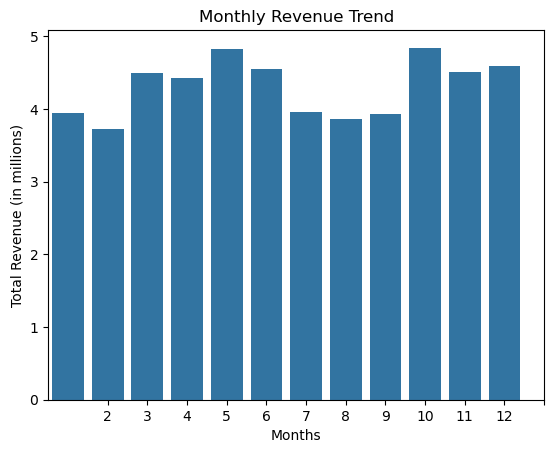

In [118]:
## Since the total_amount is in millions, lets make it more readable
monthly_revenue['revenue_in_millions'] = monthly_revenue['total_amount'] / 1000000
## Plot the bar graph
plot_bar(data_frame=monthly_revenue, xcol='pickup_month', ycol='revenue_in_millions', xlabel='Months', ylabel='Total Revenue (in millions)', title='Monthly Revenue Trend')
plt.xticks(ticks=monthly_revenue['pickup_month'])
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [119]:
# Calculate proportion of each quarter
# First we have to find the quarter. Lets calculate it and add as a column
non_zero_df['pickup_quarter'] = non_zero_df['tpep_pickup_datetime'].dt.to_period('Q')
## Now lets find total revenue
total_revenue = non_zero_df['total_amount'].sum()
## Now grp by quarter 
quarterly_revenue = non_zero_df.groupby('pickup_quarter')['total_amount'].sum().reset_index()
#To find the proportion of each quarter
quarterly_revenue['quarterly_proportion'] = quarterly_revenue['total_amount'] / total_revenue
quarterly_revenue.head()

pickup_quarter  total_amount  quarterly_proportion
0         2023Q1   12159385.10          2.355582e-01
1         2023Q2   13790440.83          2.671558e-01
2         2023Q3   11735997.01          2.273560e-01
3         2023Q4   13933627.91          2.699297e-01
4         2024Q1         11.50          2.227842e-07

In [120]:
# Since we need the quarters of 2023 so lets drop the one which is for 2024
quarterly_revenue = quarterly_revenue[~(quarterly_revenue['pickup_quarter'] == '2024Q1')]
quarterly_revenue.head()

pickup_quarter  total_amount  quarterly_proportion
0         2023Q1   12159385.10              0.235558
1         2023Q2   13790440.83              0.267156
2         2023Q3   11735997.01              0.227356
3         2023Q4   13933627.91              0.269930

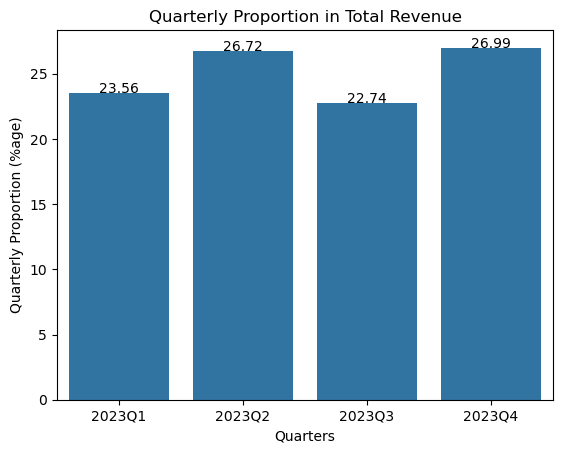

In [121]:
# Lets Plot it now. But before that, lets convert the total_amount in multiple of millions and quarterly _proportion in percentage
quarterly_revenue['qtr_revenue_in_millions'] = quarterly_revenue['total_amount'] / 1000000
quarterly_revenue['quarterly_proportion'] = quarterly_revenue['quarterly_proportion'] * 100
## Lets plot the trend now
plot_bar(data_frame=quarterly_revenue, xcol='pickup_quarter', ycol='quarterly_proportion', xlabel='Quarters', ylabel='Quarterly Proportion (%age)', title='Quarterly Proportion in Total Revenue')
## Display the percentage value on the tip of the bar for better readability
for i in range(len(quarterly_revenue['pickup_quarter'])):
        plt.text(i, round(quarterly_revenue['quarterly_proportion'][i],2), round(quarterly_revenue['quarterly_proportion'][i],2), ha='center')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [122]:
## Since for visualizing relationship, we mostly will be using scatter plot so define a function for the same
def plot_scatter(data_frame, xcol, ycol, xlabel, ylabel, title):
    sns.scatterplot(data=data_frame, x=xcol, y=ycol)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

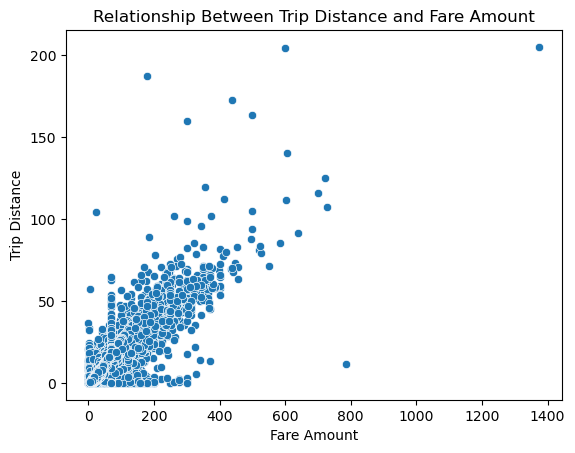

In [123]:
# Show how trip fare is affected by distance
# Have already cleaned the trip_distance = 0.0 in the earlier steps
#Lets plot a scattered plot of trip_distance and fare_amount
plot_scatter(data_frame=non_zero_df, xcol='fare_amount', ycol='trip_distance', xlabel='Fare Amount', ylabel='Trip Distance', title='Relationship Between Trip Distance and Fare Amount')

In [124]:
corr_between_trip_distance_and_fare_amount = non_zero_df[['trip_distance', 'fare_amount']].corr()
corr_between_trip_distance_and_fare_amount

trip_distance  fare_amount
trip_distance       1.000000     0.944032
fare_amount         0.944032     1.000000

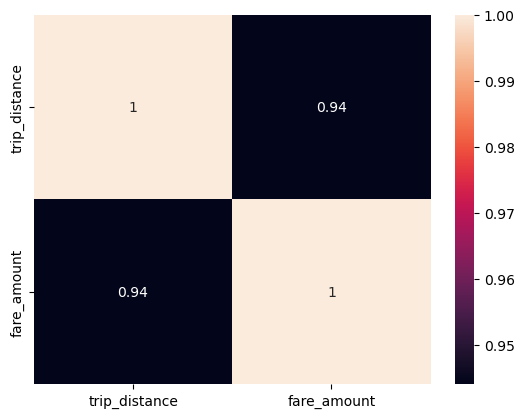

In [125]:
sns.heatmap(corr_between_trip_distance_and_fare_amount, annot=True)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [126]:
# Show relationship between fare and trip duration
## Lets find out the drip duration which is the diff between tpep_dropoff_datetime tpep_pickup_datetime in hours
non_zero_df['trip_duration'] = round((non_zero_df['tpep_dropoff_datetime'] - non_zero_df['tpep_pickup_datetime']).dt.total_seconds()/3600, 2)
# Lets analyze trip duration 
non_zero_df['trip_duration'].describe()

count    1.790678e+06
mean     2.917452e-01
std      6.896753e-01
min     -9.000000e-01
25%      1.300000e-01
50%      2.100000e-01
75%      3.400000e-01
max      9.204000e+01
Name: trip_duration, dtype: float64

In [127]:
## From above we see that there is a negative value for the trip duration which is an error. Lets clean it
# Check if the trip duration is 0 where dropoff time and pick up time is same or dropoff time is less than pick up time.
non_zero_df[non_zero_df['tpep_dropoff_datetime'] <= non_zero_df['tpep_pickup_datetime']]

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
54475          1  2023-01-09 18:51:54   2023-01-09 18:51:54               1   
56020          1  2023-01-10 14:03:08   2023-01-10 14:03:08               1   
119607         2  2023-01-22 15:36:44   2023-01-22 15:36:44               1   
129770         1  2023-01-26 08:54:55   2023-01-26 08:54:55               1   
240908         1  2023-10-14 13:05:28   2023-10-14 13:05:28               1   
...          ...                  ...                   ...             ...   
1619754        2  2023-07-30 20:48:12   2023-07-30 20:48:12               1   
1686908        1  2023-07-31 10:57:21   2023-07-31 10:57:21               1   
1751077        1  2023-07-29 11:45:00   2023-07-29 11:29:01               1   
1784274        1  2023-09-07 12:37:08   2023-09-07 12:37:08               2   
1858039        1  2023-09-20 16:35:55   2023-09-20 16:35:55               1   

         trip_distance RatecodeID  PULocationID  DOLocationID payment_type  \
54475             1.30          1           162           162            1   
56020             0.60          1           170           170            1   
119607            0.06          5           264           264            1   
129770            7.80          1           244           244            1   
240908            0.40          1           234           234            2   
...                ...        ...           ...           ...          ...   
1619754           0.10          2           141           264            1   
1686908           2.30          1           237           237            2   
1751077           3.60          1           213            32            1   
1784274           1.00          1            43            43            1   
1858039           3.20          1           211           211            1   

         fare_amount  ...  improvement_surcharge  total_amount  \
54475            8.6  ...                    1.0         18.85   
56020            5.1  ...                    1.0         11.35   
119607          77.0  ...                    0.0         77.00   
129770          37.3  ...                    1.0         49.55   
240908           5.8  ...                    1.0          9.80   
...              ...  ...                    ...           ...   
1619754         70.0  ...                    1.0         85.80   
1686908         17.0  ...                    1.0         21.00   
1751077         24.5  ...                    1.0         26.00   
1784274         13.5  ...                    1.0         21.00   
1858039         19.1  ...                    1.0         27.60   

         congestion_surcharge  pickup_hour  pickup_day  pickup_month  \
54475                     2.5           18           9             1   
56020                     2.5           14          10             1   
119607                    0.0           15          22             1   
129770                    2.5            8          26             1   
240908                    2.5           13          14            10   
...                       ...          ...         ...           ...   
1619754                   0.0           20          30             7   
1686908                   2.5           10          31             7   
1751077                   0.0           11          29             7   
1784274                   2.5           12           7             9   
1858039                   2.5           16          20             9   

         airport_fee pickup_day_of_week pickup_quarter trip_duration  
54475            0.0             Monday         2023Q1          0.00  
56020            0.0            Tuesday         2023Q1          0.00  
119607           0.0             Sunday         2023Q1          0.00  
129770           0.0           Thursday         2023Q1          0.00  
240908           0.0           Saturday         2023Q4          0.00  
...              ...                ..

In [128]:
## Lets drop these records too
non_zero_df = non_zero_df[~(non_zero_df['tpep_dropoff_datetime'] <= non_zero_df['tpep_pickup_datetime'])]

In [129]:
# Lets also check where trip_distance is nearly 0 
non_zero_df[non_zero_df['trip_distance'] < 0.1].describe()

tpep_pickup_datetime       tpep_dropoff_datetime  trip_distance  \
count                        4560                        4560    4560.000000   
mean   2023-07-13 08:59:45.719736  2023-07-13 09:02:58.314693       0.037873   
min           2023-01-01 01:03:52         2023-01-01 01:05:27       0.010000   
25%    2023-04-16 18:19:28.750000  2023-04-16 18:20:03.500000       0.010000   
50%           2023-07-13 11:44:13  2023-07-13 11:47:06.500000       0.030000   
75%           2023-10-16 18:27:48  2023-10-16 18:31:49.250000       0.060000   
max           2023-12-31 19:40:20         2023-12-31 19:43:23       0.090000   
std                           NaN                         NaN       0.025395   

       PULocationID  DOLocationID  fare_amount        extra      mta_tax  \
count   4560.000000   4560.000000  4560.000000  4560.000000  4560.000000   
mean     158.807895    160.509211    25.966886     0.874671     0.421064   
min        1.000000      1.000000     0.010000     0.000000     0.000000   
25%      132.000000    132.000000     3.000000     0.000000     0.500000   
50%      158.000000    158.000000     3.700000     0.000000     0.500000   
75%      230.000000    230.000000    70.000000     1.000000     0.500000   
max      265.000000    265.000000   300.000000     7.500000     0.500000   
std       64.080603     64.507069    33.795840     1.483735     0.182317   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  4560.000000   4560.000000            4560.000000   4560.000000   
mean      2.322682      0.304346               0.997193     32.709803   
min       0.000000      0.000000               0.000000      1.010000   
25%       0.000000      0.000000               1.000000      7.250000   
50%       0.000000      0.000000               1.000000      9.500000   
75%       0.000000      0.000000               1.000000     73.250000   
max      89.000000     35.000000               1.000000    304.200000   
std       5.798867      1.671660               0.051142     37.297460   

       congestion_surcharge  airport_fee  trip_duration  
count           4560.000000  4560.000000    4560.000000  
mean               1.595395     0.226151       0.052860  
min                0.000000     0.000000       0.000000  
25%                0.000000     0.000000       0.000000  
50%                2.500000     0.000000       0.010000  
75%                2.500000     0.000000       0.020000  
max                2.500000     1.750000      23.960000  
std                1.201465     0.569808       0.599741

In [130]:
# Lets drop these records
non_zero_df = non_zero_df[~(non_zero_df['trip_distance'] < 0.1)]

In [131]:
non_zero_df.shape

(1786030, 24)

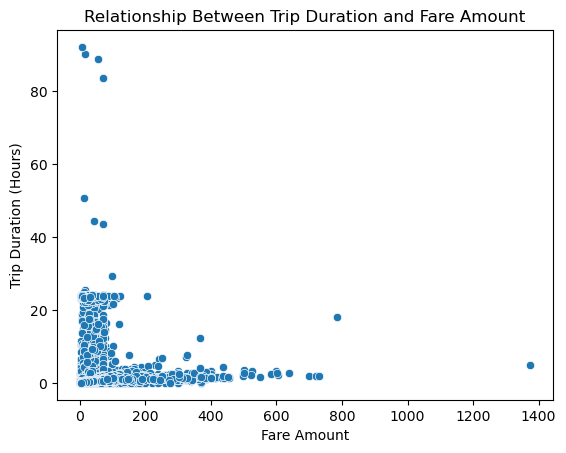

In [132]:
plot_scatter(data_frame=non_zero_df, xcol='fare_amount', ycol='trip_duration', xlabel='Fare Amount', ylabel='Trip Duration (Hours)', title='Relationship Between Trip Duration and Fare Amount')

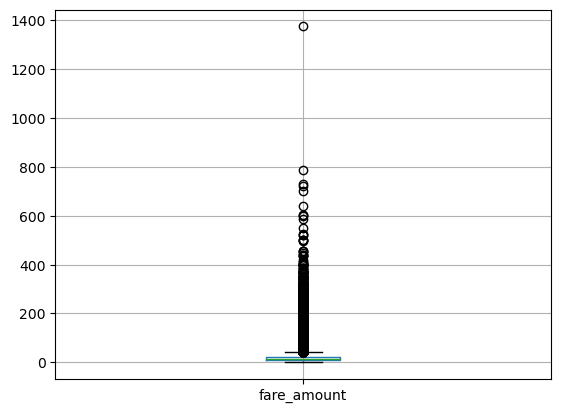

In [133]:
# According to the above graph there seems to be some outliers for trip duration ad fare amount
non_zero_df.boxplot(column='fare_amount')
plt.show()

In [134]:
## Lets remove the outlier from the fare_amount
non_zero_df = non_zero_df[non_zero_df['fare_amount'] < 1000]

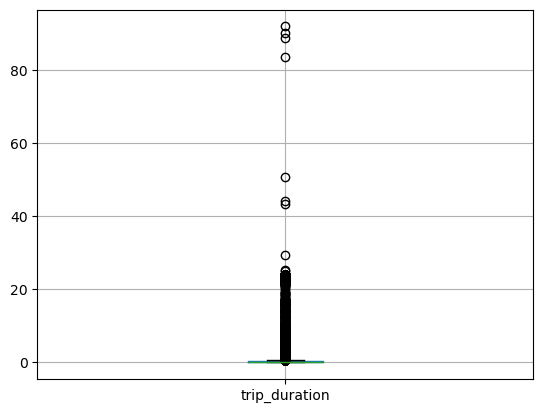

In [135]:
## Lets now check the outlier in trip duration 
non_zero_df.boxplot(column='trip_duration')
plt.show()

In [136]:
#lets check the records where trip_duration ismore than 24 hours
non_zero_df[non_zero_df['trip_duration'] > 24]

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
45889          2  2023-01-07 13:11:57   2023-01-09 15:52:28               1   
87605          2  2023-01-16 15:46:14   2023-01-17 17:08:20               2   
190875         2  2023-10-06 06:50:21   2023-10-09 18:26:35               1   
238609         2  2023-10-14 00:08:10   2023-10-17 16:57:36               1   
281619         2  2023-10-21 14:37:33   2023-10-23 10:05:58               1   
373719         2  2023-11-09 07:34:32   2023-11-10 12:54:03               1   
506159         2  2023-12-02 18:51:16   2023-12-04 15:10:07               1   
590497         2  2023-12-15 18:29:42   2023-12-19 12:40:42               1   
1601064        2  2023-05-26 20:54:21   2023-05-27 21:54:10               1   
1797743        2  2023-09-09 13:43:38   2023-09-13 09:46:04               1   

         trip_distance RatecodeID  PULocationID  DOLocationID payment_type  \
45889             1.86          1            48             7            2   
87605             7.84          1            22            22            1   
190875            7.76          2           226           226            2   
238609           13.40          1           132             7            2   
281619           19.87          2           132           265            2   
373719           23.04          1           132           189            2   
506159            7.99          1           142           138            2   
590497            0.50          1           226           145            2   
1601064           2.29          1           181           132            2   
1797743           0.49          1           232            65            2   

         fare_amount  ...  improvement_surcharge  total_amount  \
45889          12.80  ...                    1.0         16.80   
87605          17.52  ...                    1.0         20.69   
190875         70.00  ...                    1.0         73.25   
238609         55.50  ...                    1.0         59.75   
281619         70.00  ...                    1.0         75.75   
373719         98.20  ...                    1.0        108.39   
506159         42.90  ...                    1.0         46.90   
590497         17.70  ...                    1.0         21.70   
1601064        14.90  ...                    1.0         17.40   
1797743         8.60  ...                    1.0         12.60   

         congestion_surcharge  pickup_hour  pickup_day  pickup_month  \
45889                     2.5           13           7             1   
87605                     0.0           15          16             1   
190875                    0.0            6           6            10   
238609                    0.0            0          14            10   
281619                    2.5           14          21            10   
373719                    0.0            7           9            11   
506159                    2.5           18           2            12   
590497                    0.0           18          15            12   
1601064                   0.0           20          26             5   
1797743                   2.5           13           9             9   

         airport_fee pickup_day_of_week pickup_quarter trip_duration  
45889           0.00           Saturday         2023Q1         50.68  
87605           1.25             Monday         2023Q1         25.37  
190875          1.75             Friday         2023Q4         83.60  
238609          1.75           Saturday         2023Q4         88.82  
281619          1.75           Saturday         2023Q4         43.47  
373719          1.75           Thursday         2023Q4         29.33  
506159          0.00           Saturday         2023Q4         44.31  
590497          0.00             Friday         2023Q4         90.18  
1601064         0.00             Friday         2023Q2         25.00  
1797743         0.00           Saturday         2

In [137]:
# Its very unlikely that someone will spend 24 hours so lets delete these records too
non_zero_df = non_zero_df[~(non_zero_df['trip_duration'] >= 24)]

In [138]:
non_zero_df.shape

(1786019, 24)

In [139]:
#We should also check where trip duration is 0 which doesnt make sense
non_zero_df[non_zero_df['trip_duration'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
1580           1  2023-01-01 19:26:20   2023-01-01 19:26:24               1   
1652           1  2023-01-01 09:00:53   2023-01-01 09:01:02               1   
1785           1  2023-01-01 10:24:04   2023-01-01 10:24:18               4   
2313           2  2023-01-01 13:15:26   2023-01-01 13:15:37               1   
3106           2  2023-01-01 16:22:07   2023-01-01 16:22:24               1   
...          ...                  ...                   ...             ...   
1873993        2  2023-09-27 08:12:59   2023-09-27 08:13:09               1   
1885745        2  2023-09-29 00:21:40   2023-09-29 00:21:43               1   
1886725        2  2023-09-29 09:56:34   2023-09-29 09:56:50               1   
1887706        2  2023-09-29 13:42:22   2023-09-29 13:42:25               2   
1894509        1  2023-09-30 17:42:07   2023-09-30 17:42:13               1   

         trip_distance RatecodeID  PULocationID  DOLocationID payment_type  \
1580              1.40          1           239           239            1   
1652              1.30          1           231           231            3   
1785              0.10          2           243           243            1   
2313              0.10          1           264           264            2   
3106              0.11          5           264           134            1   
...                ...        ...           ...           ...          ...   
1873993           0.11          5           132           132            1   
1885745           0.69          5           265           264            1   
1886725           0.19          2           132           132            1   
1887706           0.49          5           132           264            1   
1894509           0.10          1           129           129            3   

         fare_amount  ...  improvement_surcharge  total_amount  \
1580            3.00  ...                    1.0          9.10   
1652            3.00  ...                    1.0          7.00   
1785           70.00  ...                    1.0         93.05   
2313            3.00  ...                    1.0          4.50   
3106           96.55  ...                    1.0        117.06   
...              ...  ...                    ...           ...   
1873993        81.80  ...                    1.0         99.36   
1885745       126.00  ...                    1.0        153.00   
1886725        70.00  ...                    1.0         94.13   
1887706        75.00  ...                    1.0         95.62   
1894509         3.00  ...                    1.0          4.50   

         congestion_surcharge  pickup_hour  pickup_day  pickup_month  \
1580                      2.5           19           1             1   
1652                      2.5            9           1             1   
1785                      0.0           10           1             1   
2313                      0.0           13           1             1   
3106                      0.0           16           1             1   
...                       ...          ...         ...           ...   
1873993                   0.0            8          27             9   
1885745                   0.0            0          29             9   
1886725                   0.0            9          29             9   
1887706                   0.0           13          29             9   
1894509                   0.0           17          30             9   

         airport_fee pickup_day_of_week pickup_quarter trip_duration  
1580             0.0             Sunday         2023Q1           0.0  
1652             0.0             Sunday         2023Q1           0.0  
1785             0.0             Sunday         2023Q1           0.0  
2313             0.0             Sunday         2023Q1           0.0  
3106             0.0             Sunday         2023Q1           0.0  
...              ...                ..

In [140]:
# Lets remove these too
non_zero_df = non_zero_df[~(non_zero_df['trip_duration'] == 0)]

In [141]:
non_zero_df['trip_duration'].describe()

count    1.785459e+06
mean     2.921553e-01
std      6.735582e-01
min      1.000000e-02
25%      1.300000e-01
50%      2.100000e-01
75%      3.400000e-01
max      2.399000e+01
Name: trip_duration, dtype: float64

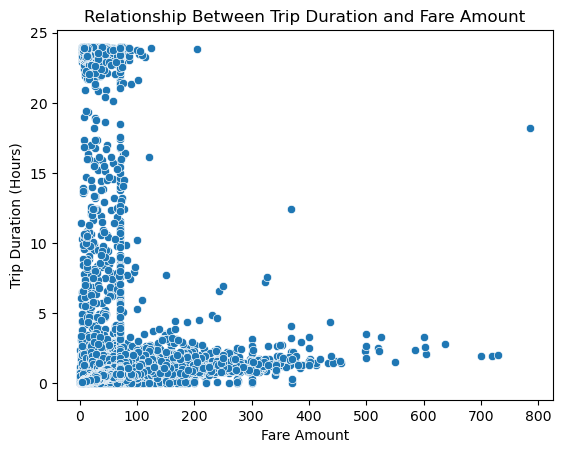

In [142]:
## Lets plot the scatter plot again for trip duration and fare amount after cleaning the outliers
plot_scatter(data_frame=non_zero_df, xcol='fare_amount', ycol='trip_duration', xlabel='Fare Amount', ylabel='Trip Duration (Hours)', title='Relationship Between Trip Duration and Fare Amount')

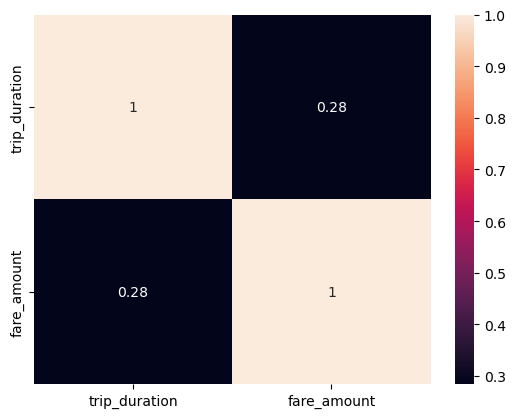

In [143]:
corr_trip_duration_and_fare_amount = non_zero_df[['trip_duration', 'fare_amount']].corr()
sns.heatmap(corr_trip_duration_and_fare_amount, annot=True)
plt.show()

In [144]:
# Show relationship between fare and number of passengers
corr_pass_ct_and_fare_amount = non_zero_df[['passenger_count', 'fare_amount']].corr()
corr_pass_ct_and_fare_amount

passenger_count  fare_amount
passenger_count         1.000000     0.040593
fare_amount             0.040593     1.000000

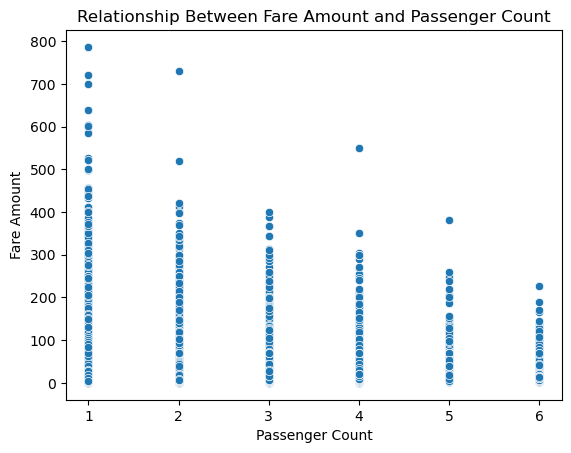

In [145]:
## Plotting scatter plot for passenger count and fare amount
plot_scatter(data_frame=non_zero_df, xcol='passenger_count', ycol='fare_amount', xlabel='Passenger Count', ylabel='Fare Amount', title='Relationship Between Fare Amount and Passenger Count')

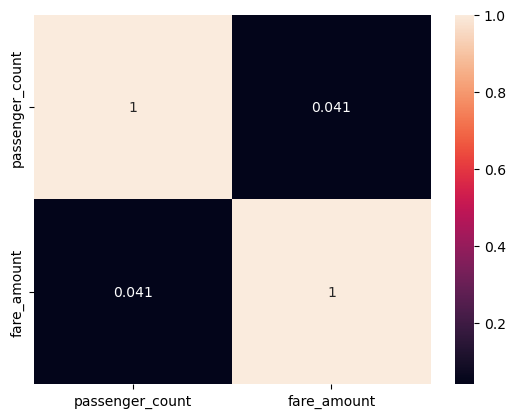

In [146]:
sns.heatmap(corr_pass_ct_and_fare_amount, annot=True)
plt.show()

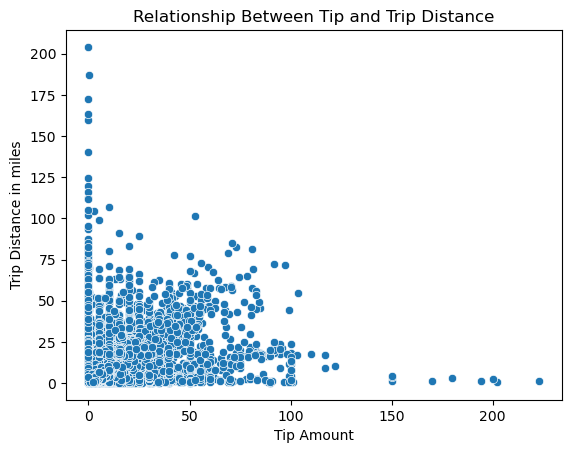

In [147]:
# Show relationship between tip and trip distance
## Plot the scatter graph
plot_scatter(data_frame=non_zero_df, xcol='tip_amount', ycol='trip_distance', xlabel='Tip Amount', ylabel='Trip Distance in miles', title='Relationship Between Tip and Trip Distance')


In [148]:
corr_tip_and_trip = non_zero_df[['tip_amount', 'trip_distance']].corr()
corr_tip_and_trip

tip_amount  trip_distance
tip_amount        1.00000        0.58677
trip_distance     0.58677        1.00000

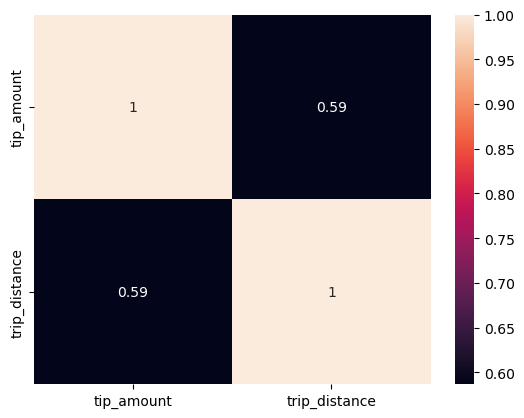

In [149]:
sns.heatmap(corr_tip_and_trip, annot=True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

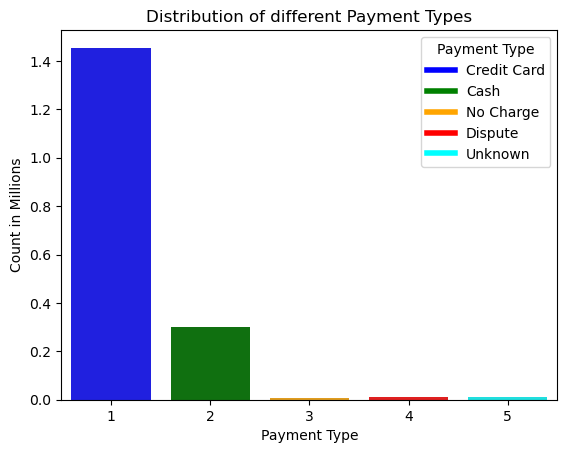

In [150]:
# Analyse the distribution of different payment types (payment_type).
payment_palette = {'1': 'blue', '2': 'green', '3': 'orange', '4': 'red', '5': 'cyan'}
payment_labels = ['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown']
payment_colors = payment_palette.values()
plt.legend(handles=[plt.Line2D([0], [0], color=color, lw=4) for color in payment_colors],
           labels=payment_labels, title='Payment Type', loc='upper right')

grouped_by_payment_type = non_zero_df.groupby('payment_type').size().reset_index(name='count')
grouped_by_payment_type['count'] = grouped_by_payment_type['count'] / 1000000
sns.barplot(x='payment_type', y='count', data=grouped_by_payment_type, palette=payment_palette)
plt.title('Distribution of different Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count in Millions')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [152]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.2 MB 1.5 MB/s eta 0:00:11
   -- ------------------------------------- 1.0/16.2 MB 1.5 MB/s eta 0:00:10
   --- ------------------------------------ 1.6/16.2 MB 1.6 MB/s eta 0:00:09
   ---- ----------------------------------- 1.8/16.2 MB 1.7 MB/s eta 0:00:09
   ----- ---------------------------------- 2.4/16.2 MB 1.8 MB/s eta 0:00:08
   ------- -------------------------------- 2.9/16.2 MB 1.8 MB/s eta 0:00:08
   ------- -------------------------------- 3.1/16.2 MB 1.8 MB/s eta 0:00:08
   --------- ------------------------------ 3.7/16.2 MB 1.9 MB/s eta 0:00:07
   ---------- ----------------------------- 4.2/16.2 MB 2.0 MB/s eta 0:00:07
   ----------- ---------------------------- 4.7/16.2 MB 2.0 MB/s eta 0:00:06
   ------------ ----

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [153]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\subodhbk\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [154]:
type(zones)

geopandas.geodataframe.GeoDataFrame

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

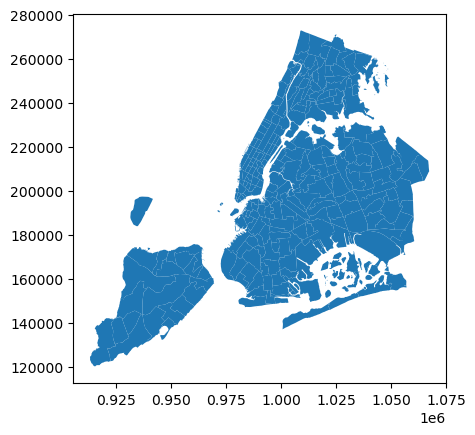

In [155]:
print(zones.info())
zones.plot()

In [156]:
zones.shape

(263, 7)

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [157]:
# Merge zones and trip records using locationID and PULocationID
## Since we need all the records from the trip records which is "non_zero_df" we need to do non_zero_df left outer join on zones.

master_df = non_zero_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
master_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
0        2  2023-01-01 00:31:50   2023-01-01 00:44:17               2   
1        2  2023-01-01 00:10:50   2023-01-01 00:24:12               4   
2        2  2023-01-01 00:25:37   2023-01-01 00:34:52               1   
3        2  2023-01-01 00:27:26   2023-01-01 00:52:20               2   
4        1  2023-01-01 00:55:02   2023-01-01 00:59:57               1   

   trip_distance RatecodeID  PULocationID  DOLocationID payment_type  \
0           2.85          1           263            41            1   
1           1.32          1            90           137            1   
2           3.17          1            79           141            1   
3           3.80          1           142           107            2   
4           0.60          1           237           237            1   

   fare_amount  ...  pickup_day_of_week  pickup_quarter  trip_duration  \
0         15.6  ...              Sunday          2023Q1           0.21   
1         12.8  ...              Sunday          2023Q1           0.22   
2         14.9  ...              Sunday          2023Q1           0.15   
3         24.7  ...              Sunday          2023Q1           0.42   
4          6.5  ...              Sunday          2023Q1           0.08   

   OBJECTID  Shape_Leng  Shape_Area                   zone LocationID  \
0     263.0    0.037017    0.000066         Yorkville West      263.0   
1      90.0    0.030759    0.000055               Flatiron       90.0   
2      79.0    0.042625    0.000108           East Village       79.0   
3     142.0    0.038176    0.000076    Lincoln Square East      142.0   
4     237.0    0.042213    0.000096  Upper East Side South      237.0   

     borough                                           geometry  
0  Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...  
1  Manhattan  POLYGON ((985265.129 208165.863, 985125.733 20...  
2  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...  
3  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...  
4  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...  

[5 rows x 31 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [158]:
# Group data by location and calculate the number of trips
trip_by_location = master_df.groupby('LocationID').size().reset_index(name='Trips')
trip_by_location

LocationID  Trips
0           1.0     21
1           2.0      2
2           3.0     32
3           4.0   1871
4           5.0      9
..          ...    ...
247       259.0     38
248       260.0    295
249       261.0   9473
250       262.0  23318
251       263.0  34216

[252 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [159]:
# Merge trip counts back to the zones GeoDataFrame
merged_trips = zones.merge(trip_by_location, on='LocationID', how='left')
merged_trips.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry   Trips  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...    21.0  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...     2.0  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...    32.0  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  1871.0  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...     9.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [160]:
## Lets check for the null values of Trips in the merged zone df
merged_trips.isnull().sum()

OBJECTID       0
Shape_Leng     0
Shape_Area     0
zone           0
LocationID     0
borough        0
geometry       0
Trips         10
dtype: int64

In [161]:
# Since there are 10 null values, we can assume that there were no trips found from the sampled trips dataframe.
# Hence lets fill them with 0
merged_trips['Trips'].fillna(0.0, inplace=True)

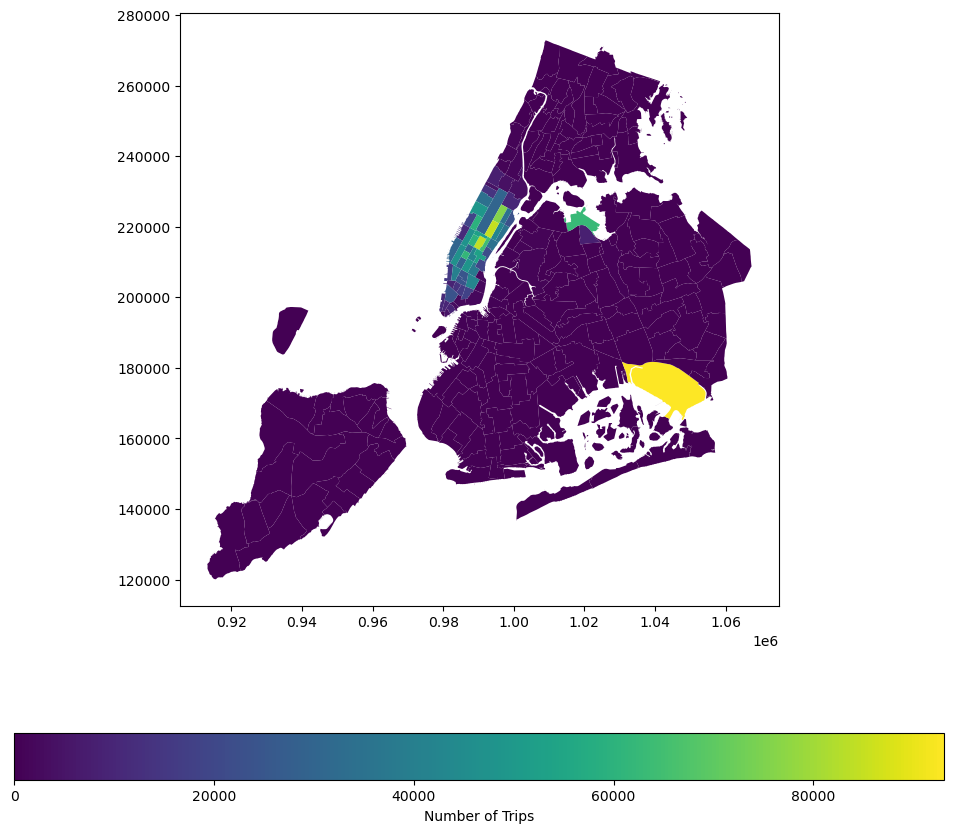

In [162]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 11))

# Plot the map and display it
merged_trips.plot(column='Trips', ax=ax, legend=True, legend_kwds = {'label': "Number of Trips", 'orientation': "horizontal"})
plt.show()

In [163]:
# can you try displaying the zones DF sorted by the number of trips?
## For the above just use sort_values in descending order
merged_trips.sort_values(by='Trips', ascending=False)

OBJECTID  Shape_Leng  Shape_Area  \
131       132    0.245479    0.002038   
236       237    0.042213    0.000096   
160       161    0.035804    0.000072   
235       236    0.044252    0.000103   
161       162    0.035270    0.000048   
..        ...         ...         ...   
220       221    0.166218    0.000890   
186       187    0.126868    0.000421   
98         99    0.183371    0.001210   
175       176    0.151995    0.000658   
102       103    0.014306    0.000006   

                                              zone  LocationID        borough  \
131                                    JFK Airport         132         Queens   
236                          Upper East Side South         237      Manhattan   
160                                 Midtown Center         161      Manhattan   
235                          Upper East Side North         236      Manhattan   
161                                   Midtown East         162      Manhattan   
..                                             ...         ...            ...   
220                                      Stapleton         221  Staten Island   
186                                  Port Richmond         187  Staten Island   
98                                 Freshkills Park          99  Staten Island   
175                                        Oakwood         176  Staten Island   
102  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   

                                              geometry    Trips  
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...  93118.0  
236  POLYGON ((993633.442 216961.016, 993507.232 21...  84989.0  
160  POLYGON ((991081.026 214453.698, 990952.644 21...  84038.0  
235  POLYGON ((995940.048 221122.92, 995812.322 220...  75795.0  
161  POLYGON ((992224.354 214415.293, 992096.999 21...  64219.0  
..                                                 ...      ...  
220  POLYGON ((963349.728 171627.581, 963397.759 17...      0.0  
186  MULTIPOLYGON (((946964.115 173161.64, 946977.8...      0.0  
98   POLYGON ((937468.341 152998.406, 937320.263 15...      0.0  
175  POLYGON ((950393.94 148827.195, 950393.983 148...      0.0  
102  POLYGON ((972079.575 190732.429, 972184.766 19...      0.0  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [164]:
# Find routes which have the slowest speeds at different times of the day
## Since it has been mentioned that we need to find the slowest route where cabs goes from one zone to another
## So lets remove those rows where PULocationID and DOLocationID is same
routes_df = master_df[~(master_df['PULocationID'] == master_df['DOLocationID'])]
# Now define a route column which would can be concatenation of PickUP location and DropOff Location 
# Lets create a dictionary of locationID and zone name from zones dataframe
locationid_zone = dict(zip(zones['LocationID'], zones['zone']))
## Now create a route column which would take zone name for the DOlocationID from the above dict. For PULocationID we can use "zone" column
# as already the merged_df is on PULocationID with zones dataframe
routes_df['route'] = routes_df['zone'] + '-' + routes_df['DOLocationID'].map(locationid_zone)
# For Speed on route X for hour Y  formula give = Speed on a route X for hour Y = (distance of the route X / average trip duration for hour Y)
# So lets find average trip duraton per hour
average_trip_duration_per_hour  = routes_df.groupby('pickup_hour')['trip_duration'].mean().reset_index(name='avg_trip_duration')
# Lets merge it with the master dataframe
speed_df = routes_df.merge(average_trip_duration_per_hour, on='pickup_hour')

In [165]:
## Now lets calculate the speed per trip 
speed_df['speed'] = speed_df['trip_distance']/speed_df['avg_trip_duration']
speed_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
0        2  2023-01-01 00:31:50   2023-01-01 00:44:17               2   
1        2  2023-01-01 00:10:50   2023-01-01 00:24:12               4   
2        2  2023-01-01 00:25:37   2023-01-01 00:34:52               1   
3        2  2023-01-01 00:27:26   2023-01-01 00:52:20               2   
4        2  2023-01-01 00:35:52   2023-01-01 00:43:38               2   

   trip_distance RatecodeID  PULocationID  DOLocationID payment_type  \
0           2.85          1           263            41            1   
1           1.32          1            90           137            1   
2           3.17          1            79           141            1   
3           3.80          1           142           107            2   
4           1.41          1           161           141            2   

   fare_amount  ...  OBJECTID  Shape_Leng  Shape_Area                 zone  \
0         15.6  ...     263.0    0.037017    0.000066       Yorkville West   
1         12.8  ...      90.0    0.030759    0.000055             Flatiron   
2         14.9  ...      79.0    0.042625    0.000108         East Village   
3         24.7  ...     142.0    0.038176    0.000076  Lincoln Square East   
4         10.0  ...     161.0    0.035804    0.000072       Midtown Center   

   LocationID    borough                                           geometry  \
0       263.0  Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   
1        90.0  Manhattan  POLYGON ((985265.129 208165.863, 985125.733 20...   
2        79.0  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...   
3       142.0  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
4       161.0  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   

                            route avg_trip_duration      speed  
0   Yorkville West-Central Harlem          0.264288  10.783681  
1               Flatiron-Kips Bay          0.264288   4.994547  
2    East Village-Lenox Hill West          0.264288  11.994480  
3    Lincoln Square East-Gramercy          0.264288  14.378241  
4  Midtown Center-Lenox Hill West          0.264288   5.335084  

[5 rows x 34 columns]

In [166]:
# The top 10 slowest route 
slowest_route = speed_df.groupby(['route','pickup_hour'])['speed'].mean().reset_index(name='avg_speed')
slowest_route.sort_values(by='avg_speed').head(10)

route pickup_hour  \
87135                        Dyker Heights-South Jamaica          15   
393351               Upper East Side South-Arden Heights          15   
136863                 Flatbush/Ditmas Park-Saint Albans          15   
181620                      Howard Beach-Jackson Heights          12   
77627            Crown Heights North-Crown Heights South          11   
348947  Spuyten Duyvil/Kingsbridge-Upper East Side North          11   
78275                   Crown Heights North-Howard Beach          11   
17722                     Bedford Park-East Harlem North          10   
47602                         Central Harlem-City Island          10   
417994                         West Concourse-Highbridge          10   

        avg_speed  
87135    0.283997  
393351   0.283997  
136863   0.283997  
181620   0.325914  
77627    0.330296  
348947   0.330296  
78275    0.330296  
17722    0.338983  
47602    0.338983  
417994   0.338983

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

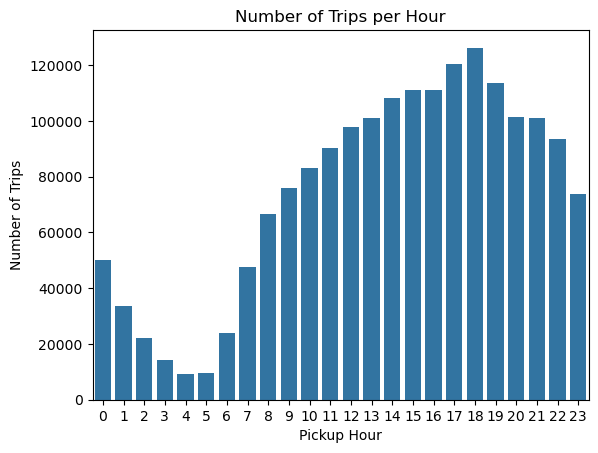

In [167]:
# Visualise the number of trips per hour and find the busiest hour
## Group the data by pickup hour and get the count of trips
trips_per_hour = master_df.groupby('pickup_hour').size().reset_index(name='number_of_trips')
plot_bar(data_frame=trips_per_hour, xcol='pickup_hour', ycol='number_of_trips', xlabel='Pickup Hour', ylabel='Number of Trips', title='Number of Trips per Hour')
plt.show()

In [168]:
trips_per_hour.sort_values(by='number_of_trips', ascending=False).head(1)

pickup_hour  number_of_trips
18          18           126294

In [ ]:
Answer:- The busiest hour is 18:00 hours with 126294 trips

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [169]:
# Scale up the number of trips
## Import FuncFormatter to format the value of y-axis
from matplotlib.ticker import FuncFormatter

## Define function to format the y-axis value
def y_axis_formatter(x, pos):
    return f'{x / 1e6:.1f}M'
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
scale_up_value = 1 / sample_fraction
trips_per_hour['actual_number_of_trips'] = trips_per_hour['number_of_trips'] * scale_up_value
trips_per_hour.sort_values(by='actual_number_of_trips', ascending=False).head(5)


pickup_hour  number_of_trips  actual_number_of_trips
18          18           126294               2525880.0
17          17           120498               2409960.0
19          19           113470               2269400.0
16          16           110968               2219360.0
15          15           110954               2219080.0

In [ ]:
Answer:- The five busiest hours are 18:00, 17:00, 19:00, 16:00 and 15:00 hours and in the same order from top to bottom

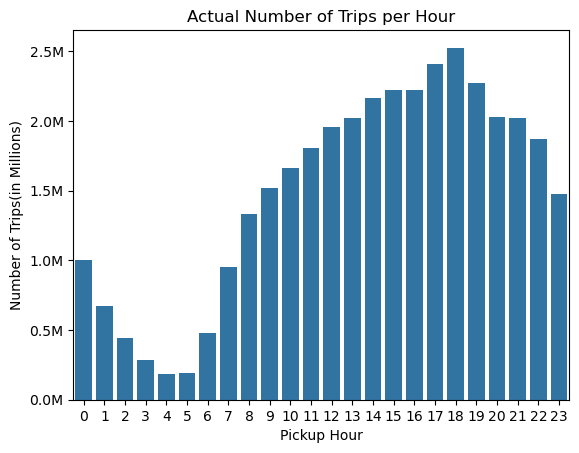

In [170]:
sns.barplot(x='pickup_hour', y='actual_number_of_trips', data=trips_per_hour)
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
plt.title('Actual Number of Trips per Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips(in Millions)')
plt.show()

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [171]:
## Lets create a categorized column which defines the trip is on weekend or weekday
master_df['day_type'] = master_df['pickup_day_of_week'].apply(lambda x: 'Weekend' if ((x == 'Sunday') | (x == 'Saturday')) else 'Weekday')

In [172]:
# Compare traffic trends for the week days and weekends
# Extract rows for weekends and weekdays
weekends_df = master_df[master_df['day_type'] == 'Weekend']
weekdays_df = master_df[master_df['day_type'] == 'Weekday']
## Start from here

In [173]:
## See insights from weekends first. Group by on pickuphour for weekend
weekends_traffic_trend_per_hour = weekends_df.groupby('pickup_hour').size().reset_index(name='number_of_trips')
weekends_traffic_trend_per_hour['actual_number_of_trips'] = weekends_traffic_trend_per_hour['number_of_trips'] * scale_up_value
weekends_traffic_trend_per_hour.sort_values(by='actual_number_of_trips', ascending=False).head(5)

pickup_hour  number_of_trips  actual_number_of_trips
17          17            30297                605940.0
18          18            30177                603540.0
16          16            29857                597140.0
15          15            29264                585280.0
14          14            28928                578560.0

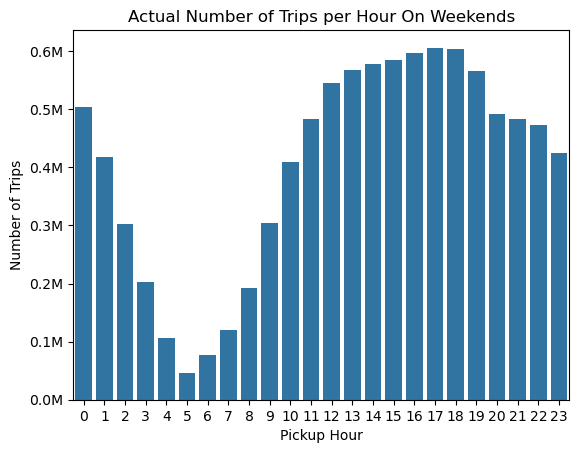

In [174]:
# Plot the bars
plot_bar(data_frame=weekends_traffic_trend_per_hour, xcol='pickup_hour', ycol='actual_number_of_trips', xlabel='Pickup Hour', ylabel='Number of Trips', title='Actual Number of Trips per Hour On Weekends')
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
plt.show()

In [175]:
## See insights from weekends first. Group by on pickuphour for weekend
weekdays_traffic_trend_per_hour = weekdays_df.groupby('pickup_hour').size().reset_index(name='number_of_trips')
weekdays_traffic_trend_per_hour['actual_number_of_trips'] = weekdays_traffic_trend_per_hour['number_of_trips'] * scale_up_value
weekdays_traffic_trend_per_hour.sort_values(by='actual_number_of_trips', ascending=False).head(5)

pickup_hour  number_of_trips  actual_number_of_trips
18          18            96117               1922340.0
17          17            90201               1804020.0
19          19            85209               1704180.0
15          15            81690               1633800.0
16          16            81111               1622220.0

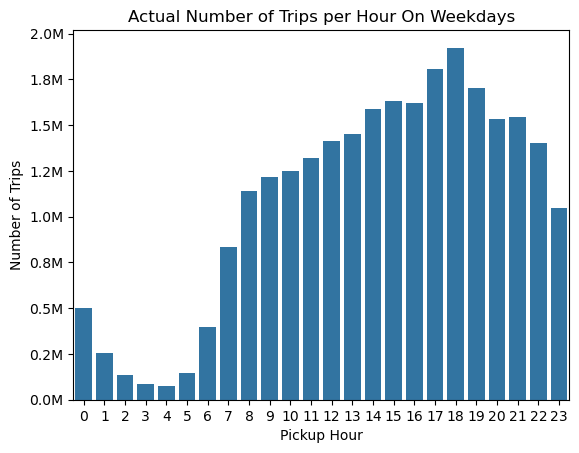

In [176]:
plot_bar(data_frame=weekdays_traffic_trend_per_hour, xcol='pickup_hour', ycol='actual_number_of_trips', xlabel='Pickup Hour', ylabel='Number of Trips', title='Actual Number of Trips per Hour On Weekdays')
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [ ]:
Answer:- From the above patterns we come to know about the following :

1.)Demands of taxi is much less on weekends than on weekdays.
2.)On Weekdays, the demand of taxi in the morning hours before 7:00 AM is very less.
3.)On Weekends, the quiet period is between 3:00 AM to 8:00 AM and then the demand is almost uniformly high from afternoon till midnight.
4.)On Weekdays, evening hours are mostly too busy and demands are too high.
    
By finding busy and quiet hours we can do the following :

1.)Deploy less taxi in the quiet hours
2.)Deploy more taxi in the busy hours as the demand is high
3.)By doing the above two, we can cut down on operational cost.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [177]:
# Find top 10 pickup and dropoff zones
## Group by picup hour and zone to get the number of pickups
pickup_count_per_hour_per_zone = master_df.groupby(['pickup_hour', 'zone']).size().reset_index(name='number_of_pickups')
## Then find the sum of all the pickups per zone
pickups_per_zone = pickup_count_per_hour_per_zone.groupby('zone')['number_of_pickups'].sum().reset_index()
## sort by number of pickups in descending and get the top 10 values
top_10_pickup_zones_df = pickups_per_zone.sort_values(by='number_of_pickups', ascending=False).head(10)
## Convert the series to list
top_10_pickup_zones = top_10_pickup_zones_df['zone'].tolist()
## Print the top ten pickup zones
print(top_10_pickup_zones)

['JFK Airport', 'Upper East Side South', 'Midtown Center', 'Upper East Side North', 'Midtown East', 'LaGuardia Airport', 'Penn Station/Madison Sq West', 'Times Sq/Theatre District', 'Lincoln Square East', 'Murray Hill']


In [178]:
# To find the top 10 dropoff zones, we need to extract hour from dropoff time and also dropoff zone
#For that create a column from tpep_dropoff_datetime which defines the drop off hour
master_df['dropoff_hour'] = pd.to_datetime(master_df['tpep_dropoff_datetime']).dt.hour
## Also create a column which has the text value of the dropoff zone
master_df['dropoff_zone'] = master_df['DOLocationID'].map(locationid_zone)
## Group by dropoff hour and zone to get the number of drops
dropoff_count_per_hour_per_zone = master_df.groupby(['dropoff_hour', 'dropoff_zone']).size().reset_index(name='number_of_dropoff')
## Then find the sum of all the drops per zone
dropoff_per_zone = dropoff_count_per_hour_per_zone.groupby('dropoff_zone')['number_of_dropoff'].sum().reset_index()
## sort by number of drops in descending and get the top 10 values
top_10_dropoff_zones_df = dropoff_per_zone.sort_values(by='number_of_dropoff', ascending=False).head(10)
## Convert the series to list
top_10_dropoff_zones = top_10_dropoff_zones_df['dropoff_zone'].tolist()
## Print the top ten drop zones
print(top_10_dropoff_zones)

['Upper East Side North', 'Upper East Side South', 'Midtown Center', 'Times Sq/Theatre District', 'Murray Hill', 'Midtown East', 'Lincoln Square East', 'Upper West Side South', 'Lenox Hill West', 'East Chelsea']


In [179]:
## Filter data for the top 10 pickup zones and get the number of trips per zone
top_10_pickup_zones_data = master_df[master_df['zone'].isin(top_10_pickup_zones)]
top_10_pickup_zones_trend = top_10_pickup_zones_data.groupby('zone').size().reset_index(name='number_of_picks')
top_10_pickup_zones_trend['actual_number_of_picks'] = top_10_pickup_zones_trend['number_of_picks'] * scale_up_value
top_10_pickup_zones_trend.sort_values(by='actual_number_of_picks', ascending=False)

zone  number_of_picks  actual_number_of_picks
0                   JFK Airport            93118               1862360.0
9         Upper East Side South            84989               1699780.0
3                Midtown Center            84038               1680760.0
8         Upper East Side North            75795               1515900.0
4                  Midtown East            64219               1284380.0
1             LaGuardia Airport            62926               1258520.0
6  Penn Station/Madison Sq West            61805               1236100.0
7     Times Sq/Theatre District            59755               1195100.0
2           Lincoln Square East            59618               1192360.0
5                   Murray Hill            53321               1066420.0

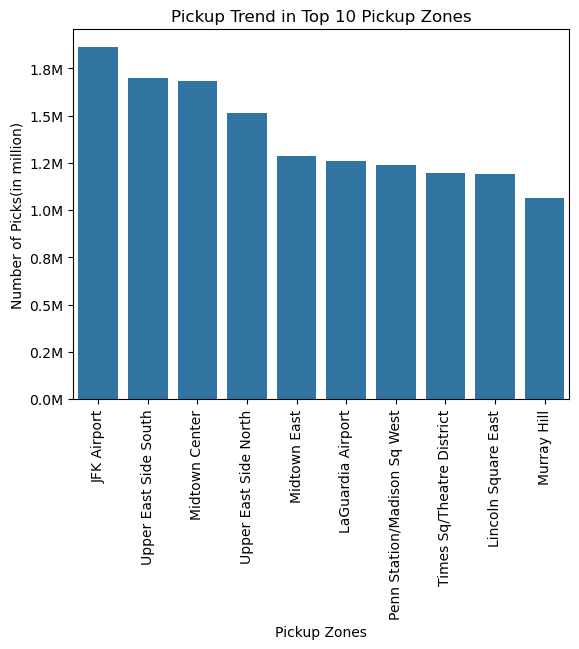

In [180]:
## plot the bar chart
# sort the top 10 pickup zones in descending order
data_to_plot = top_10_pickup_zones_trend.sort_values(by='actual_number_of_picks', ascending=False)
plot_bar(data_frame=data_to_plot, xcol='zone', ycol='actual_number_of_picks', xlabel='Pickup Zones', ylabel='Number of Picks(in million)', title='Pickup Trend in Top 10 Pickup Zones')
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
plt.xticks(rotation=90)
plt.show()

In [181]:
## Filter data for the top 10 drop zones and get the number of trips per zone
top_10_dropoff_zones_data = master_df[master_df['dropoff_zone'].isin(top_10_dropoff_zones)]
top_10_dropoff_zones_trend = top_10_dropoff_zones_data.groupby('dropoff_zone').size().reset_index(name='number_of_dropoffs')
top_10_dropoff_zones_trend['actual_number_of_dropoffs'] = top_10_dropoff_zones_trend['number_of_dropoffs'] * scale_up_value
top_10_dropoff_zones_trend.sort_values(by='actual_number_of_dropoffs', ascending=False)

dropoff_zone  number_of_dropoffs  actual_number_of_dropoffs
7      Upper East Side North               79612                  1592240.0
8      Upper East Side South               75885                  1517700.0
3             Midtown Center               69943                  1398860.0
6  Times Sq/Theatre District               55086                  1101720.0
5                Murray Hill               53213                  1064260.0
4               Midtown East               51045                  1020900.0
2        Lincoln Square East               50402                  1008040.0
9      Upper West Side South               50240                  1004800.0
1            Lenox Hill West               47613                   952260.0
0               East Chelsea               45395                   907900.0

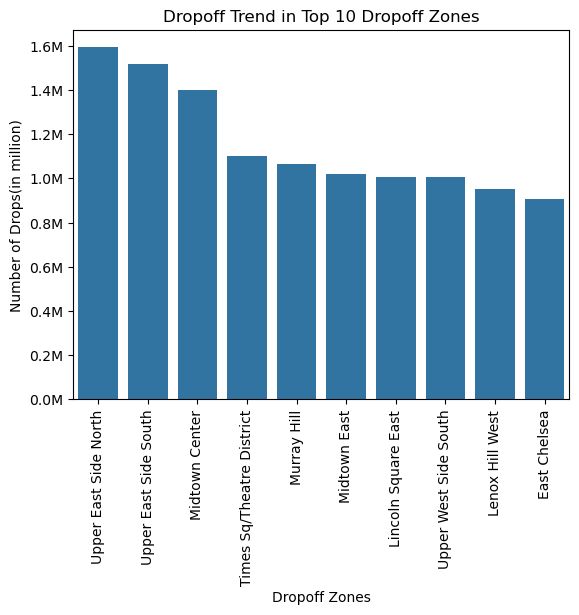

In [182]:
## plot the bar chart
# sort the top 10 pickup zones in descending order
data_to_plot = top_10_dropoff_zones_trend.sort_values(by='actual_number_of_dropoffs', ascending=False)
plot_bar(data_frame=data_to_plot, xcol='dropoff_zone', ycol='actual_number_of_dropoffs', xlabel='Dropoff Zones', ylabel='Number of Drops(in million)', title='Dropoff Trend in Top 10 Dropoff Zones')
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
plt.xticks(rotation=90)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [183]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
## Find the pickups by pick up zone
pickup_count_by_pickup_zone = master_df.groupby('zone').size().reset_index(name='pickup_count')
## Find the pickups by drop off zone
pickup_count_by_dropoff_zone = master_df.groupby('dropoff_zone').size().reset_index(name='dropoff_count')
## Merge these two dfs
pickup_and_dropoffs_per_zone = pickup_count_by_pickup_zone.merge(pickup_count_by_dropoff_zone, left_on='zone', right_on='dropoff_zone', how='inner')
## find pickup/dropoff ratio
pickup_and_dropoffs_per_zone['pickup_dropoff_ratio'] = pickup_and_dropoffs_per_zone['pickup_count']/pickup_and_dropoffs_per_zone['dropoff_count']
top_10_pickup_drop_ratio = pickup_and_dropoffs_per_zone.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_pickup_drop_ratio = pickup_and_dropoffs_per_zone.sort_values(by='pickup_dropoff_ratio').head(10)

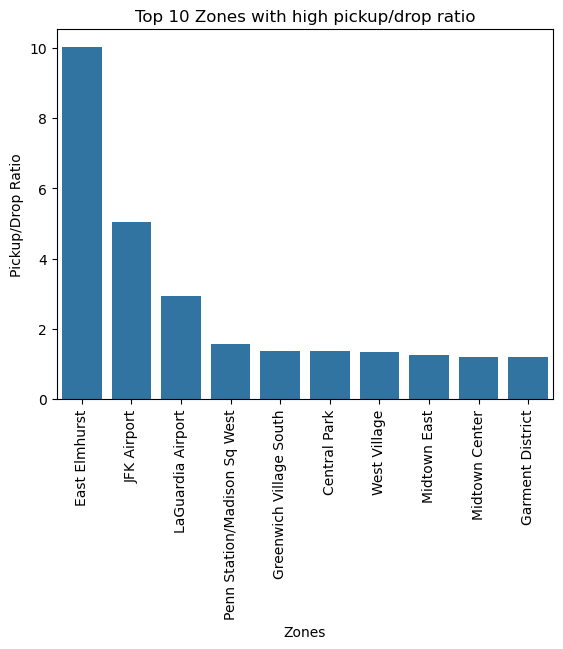

In [184]:
## Sort the ratio in descending order for top 10 zones
data_to_plot = top_10_pickup_drop_ratio.sort_values(by='pickup_dropoff_ratio', ascending=False)
plot_bar(data_frame=data_to_plot, xcol='zone', ycol='pickup_dropoff_ratio', xlabel='Zones', ylabel='Pickup/Drop Ratio', title='Top 10 Zones with high pickup/drop ratio')
plt.xticks(rotation=90)
plt.show()

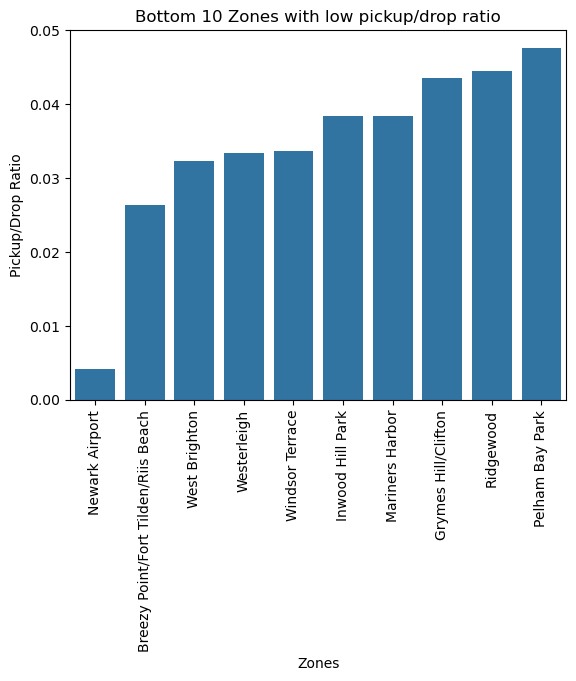

In [185]:
## Sort the ratio in ascending order for bottom 10 zones
data_to_plot = bottom_10_pickup_drop_ratio.sort_values(by='pickup_dropoff_ratio')
plot_bar(data_frame=data_to_plot, xcol='zone', ycol='pickup_dropoff_ratio', xlabel='Zones', ylabel='Pickup/Drop Ratio', title='Bottom 10 Zones with low pickup/drop ratio')
plt.xticks(rotation=90)
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [186]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
pickup_night_hours_df = master_df[(master_df['pickup_hour'].astype(int) >= 23) | (master_df['pickup_hour'].astype(int) <= 5)]
## Group by zone and get the count of pickups
top_10_pickup_night = pickup_night_hours_df.groupby('zone').size().reset_index(name='count')
top_10_pickup_night_zones = top_10_pickup_night.sort_values(by='count', ascending=False).head(10)
print(top_10_pickup_night_zones)

                             zone  count
69                   East Village  15348
108                   JFK Airport  14047
217                  West Village  12330
41                   Clinton East  10284
127               Lower East Side   9560
96        Greenwich Village South   8644
199     Times Sq/Theatre District   8056
160  Penn Station/Madison Sq West   6833
141                 Midtown South   6057
58                   East Chelsea   5944


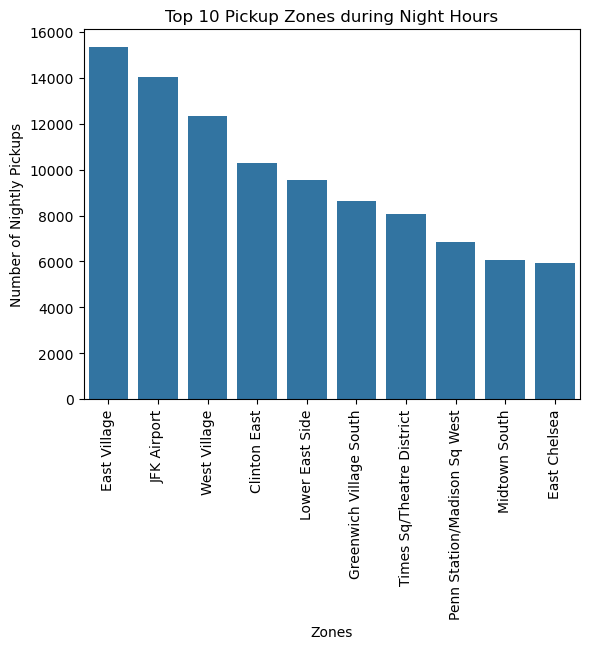

In [187]:
## Plot the bar chart
data_to_plot = top_10_pickup_night_zones.sort_values(by='count', ascending=False)
plot_bar(data_frame=data_to_plot, xcol='zone', ycol='count', xlabel='Zones', ylabel='Number of Nightly Pickups', title='Top 10 Pickup Zones during Night Hours')
plt.xticks(rotation=90)
plt.show()

In [188]:
# Top 10 Drop off Zone - Execute the similar steps which was for top 10 pickup zones
dropoff_night_hours_df = master_df[(master_df['dropoff_hour'] >= 23) | (master_df['dropoff_hour'] <= 5)]
top_10_dropoff_night = dropoff_night_hours_df.groupby('dropoff_zone').size().reset_index(name='count')
top_10_dropoff_night_zones = top_10_dropoff_night.sort_values(by='count', ascending=False).head(10)
print(top_10_dropoff_night_zones)

                  dropoff_zone  count
75                East Village   8696
45                Clinton East   7375
161                Murray Hill   6596
64                East Chelsea   6151
99                    Gramercy   6066
132            Lenox Hill West   5748
253             Yorkville West   5438
239               West Village   5188
220  Times Sq/Theatre District   5055
229      Upper West Side South   4829


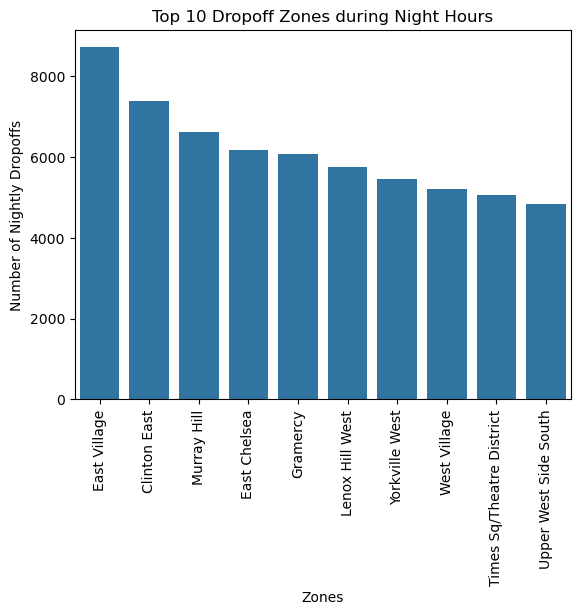

In [189]:
## Plot the bar chart
data_to_plot = top_10_dropoff_night_zones.sort_values(by='count', ascending=False)
plot_bar(data_frame=data_to_plot, xcol='dropoff_zone', ycol='count', xlabel='Zones', ylabel='Number of Nightly Dropoffs', title='Top 10 Dropoff Zones during Night Hours')
plt.xticks(rotation=90)
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [190]:
# Filter for night hours (11 PM to 5 AM)
night_hours_df = master_df[(master_df['pickup_hour'].astype(int) >= 23) | (master_df['pickup_hour'].astype(int) <= 5)]
daytime_hours_df = master_df[~((master_df['pickup_hour'].astype(int) >= 23) | (master_df['pickup_hour'].astype(int) <= 5))]
night_revenue = night_hours_df['total_amount'].sum()
daytime_revenue = daytime_hours_df['total_amount'].sum()
total_revenue = master_df['total_amount'].sum()
#revenue_share
revenue_share_by_night = round((night_revenue / total_revenue),2)*100
revenue_share_by_daytime = round((daytime_revenue / total_revenue),2)*100
print(f"Night revenue share {revenue_share_by_night}%" )
print(f"Daytime revenue share {revenue_share_by_daytime}%" )

Night revenue share 12.0%
Daytime revenue share 88.0%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [191]:
# Analyse the fare per mile per passenger for different passenger counts
# Lets first calculate the fare per mile
master_df['fare_per_mile'] = master_df['fare_amount']/master_df['trip_distance']
# Now lets group by passenger_count 
avg_fare_per_mile_grped_by_passenger_count = master_df.groupby('passenger_count')['fare_per_mile'].mean().reset_index()

# to calculate the average fare per mile per passenger, we need to divide the avg_fare_per_mile by passenger_count

avg_fare_per_mile_grped_by_passenger_count['avg_fare_per_mile_per_passenger'] = round(avg_fare_per_mile_grped_by_passenger_count['fare_per_mile']/avg_fare_per_mile_grped_by_passenger_count['passenger_count'].astype(int), 2)
avg_fare_per_mile_grped_by_passenger_count

passenger_count  fare_per_mile  avg_fare_per_mile_per_passenger
0               1       7.975766                             7.98
1               2       7.859005                             3.93
2               3       7.987794                             2.66
3               4       7.951665                             1.99
4               5       7.702176                             1.54
5               6       7.781933                             1.30

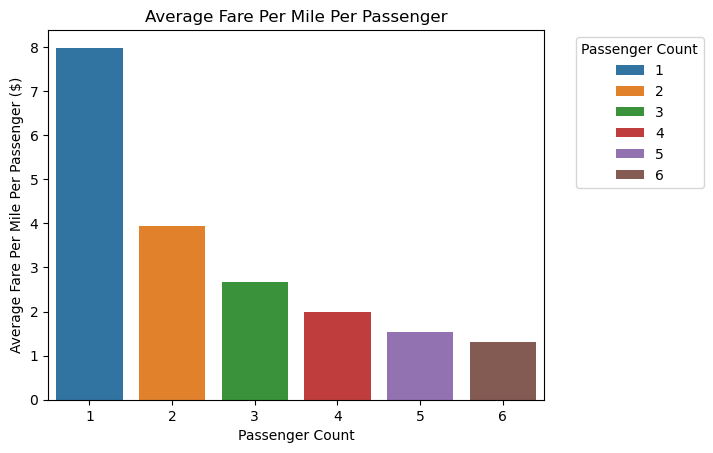

In [192]:
sns.barplot(x='passenger_count', y='avg_fare_per_mile_per_passenger', data=avg_fare_per_mile_grped_by_passenger_count.sort_values(by='avg_fare_per_mile_per_passenger', ascending=False), hue='passenger_count')
plt.title('Average Fare Per Mile Per Passenger')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Per Mile Per Passenger ($)')
plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [193]:
# Compare the average fare per mile for different days and for different times of the day
avg_fare_per_mile_by_hours = master_df.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

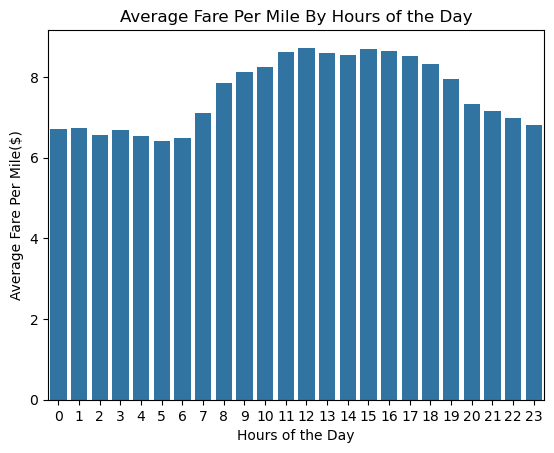

In [195]:
plot_bar(data_frame=avg_fare_per_mile_by_hours, xcol='pickup_hour', ycol='fare_per_mile', xlabel='Hours of the Day', ylabel='Average Fare Per Mile($)', title='Average Fare Per Mile By Hours of the Day')
plt.show()

In [196]:
avg_fare_per_mile_by_day = master_df.groupby('pickup_day_of_week')['fare_per_mile'].mean().reset_index()
avg_fare_per_mile_by_day

pickup_day_of_week  fare_per_mile
0             Monday       7.616635
1            Tuesday       8.189660
2          Wednesday       8.293724
3           Thursday       8.286660
4             Friday       7.988328
5           Saturday       7.845250
6             Sunday       7.259659

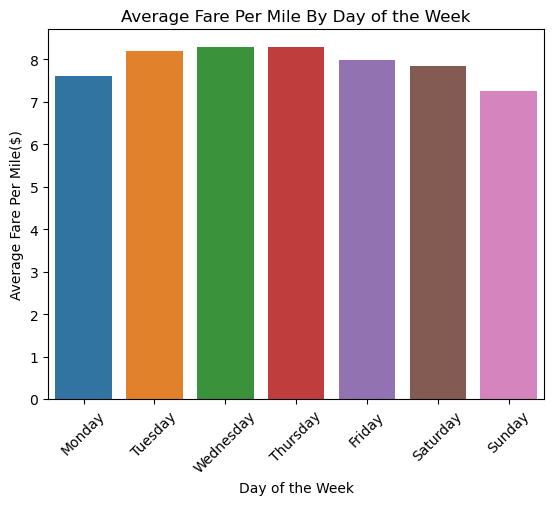

In [197]:
sns.barplot(x='pickup_day_of_week', y='fare_per_mile', data=avg_fare_per_mile_by_day.sort_values(by='fare_per_mile', ascending=False), hue='pickup_day_of_week')
plt.title('Average Fare Per Mile By Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare Per Mile($)')
plt.xticks(rotation=45)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [198]:
# Compare fare per mile for different vendors
## Group by VendotID and calculate average fare per mile
avg_fare_per_mile_by_vendor = master_df.groupby('VendorID')['fare_per_mile'].mean().reset_index()
# replace the numbers by text as per data dictionary
avg_fare_per_mile_by_vendor['vendor_name'] = np.where(avg_fare_per_mile_by_vendor['VendorID'] == 1, 'Creative Mobile Technologies, LLC', 'VeriFone Inc.')
avg_fare_per_mile_by_vendor

VendorID  fare_per_mile                        vendor_name
0        1       8.101038  Creative Mobile Technologies, LLC
1        2       7.903083                      VeriFone Inc.

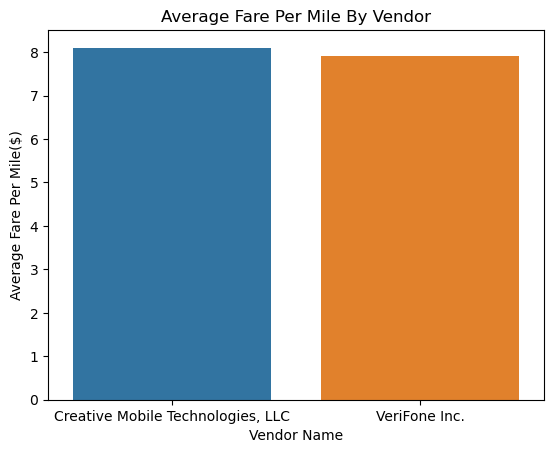

In [199]:
sns.barplot(x='vendor_name', y='fare_per_mile', data=avg_fare_per_mile_by_vendor.sort_values(by='fare_per_mile', ascending=False), hue='vendor_name')
plt.title('Average Fare Per Mile By Vendor')
plt.xlabel('Vendor Name')
plt.ylabel('Average Fare Per Mile($)')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [200]:
# Defining distance tiers
# Create bins for categorizing
tiered_distance = [0, 2, 5, float('inf')]
tiered_distance_name = ['0-2 Miles', '2-5 Miles', '> 5 Miles']
## create a new column which will have the tiered distance
master_df['tiered_distance'] = pd.cut(master_df['trip_distance'], bins=tiered_distance, labels=tiered_distance_name, right=False)
avg_fare_per_mile_by_tiered_distance = master_df.groupby('tiered_distance')['fare_per_mile'].mean().reset_index()
avg_fare_per_mile_by_tiered_distance

tiered_distance  fare_per_mile
0       0-2 Miles       9.800854
1       2-5 Miles       6.532367
2       > 5 Miles       4.490277

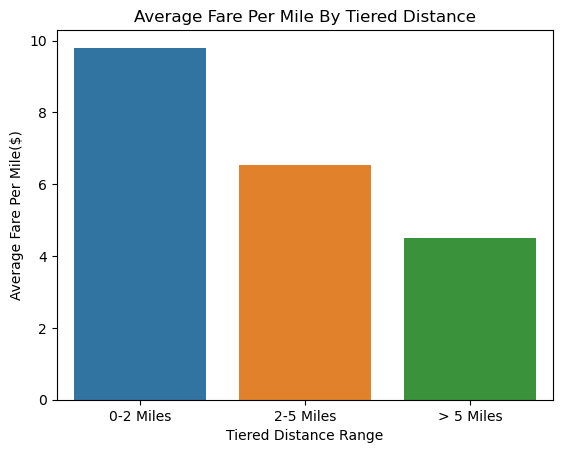

In [201]:
sns.barplot(x='tiered_distance', y='fare_per_mile', data=avg_fare_per_mile_by_tiered_distance.sort_values(by='fare_per_mile', ascending=False), hue='tiered_distance')
plt.title('Average Fare Per Mile By Tiered Distance')
plt.xlabel('Tiered Distance Range')
plt.ylabel('Average Fare Per Mile($)')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [202]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# For analyzing tip pattern lets remove the tip = 0
non_zero_tip_df = master_df[master_df['tip_amount'] > 0]
non_zero_tip_df['tip_pecentage'] = round((non_zero_tip_df['tip_amount']/(non_zero_tip_df['total_amount']-non_zero_tip_df['tip_amount'])),2)*100

tip_pct_by_passenger_ct = non_zero_tip_df.groupby('passenger_count')['tip_pecentage'].mean().reset_index()

tip_pct_by_passenger_ct

passenger_count  tip_pecentage
0               1      18.589246
1               2      18.596805
2               3      18.598969
3               4      18.813600
4               5      18.589882
5               6      18.784290

In [203]:
tip_pct_by_tiered_distance = non_zero_tip_df.groupby('tiered_distance')['tip_pecentage'].mean().reset_index()

tip_pct_by_tiered_distance

tiered_distance  tip_pecentage
0       0-2 Miles      18.922910
1       2-5 Miles      18.242152
2       > 5 Miles      18.150841

In [204]:
tip_pct_by_pickup_hour = non_zero_tip_df.groupby('pickup_hour')['tip_pecentage'].mean().reset_index()

tip_pct_by_pickup_hour

pickup_hour  tip_pecentage
0            0      18.276503
1            1      18.285926
2            2      18.419572
3            3      18.897890
4            4      19.173454
5            5      18.414950
6            6      18.453167
7            7      18.323172
8            8      18.440577
9            9      18.718995
10          10      18.907699
11          11      18.993440
12          12      18.957289
13          13      18.999563
14          14      18.903340
15          15      18.780247
16          16      18.520903
17          17      18.400476
18          18      18.358635
19          19      18.250301
20          20      18.523391
21          21      18.553927
22          22      18.505280
23          23      18.351522

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [205]:
master_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_hour', 'pickup_day', 'pickup_month',
       'airport_fee', 'pickup_day_of_week', 'pickup_quarter', 'trip_duration',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'day_type', 'dropoff_hour', 'dropoff_zone', 'fare_per_mile',
       'tiered_distance'],
      dtype='object')

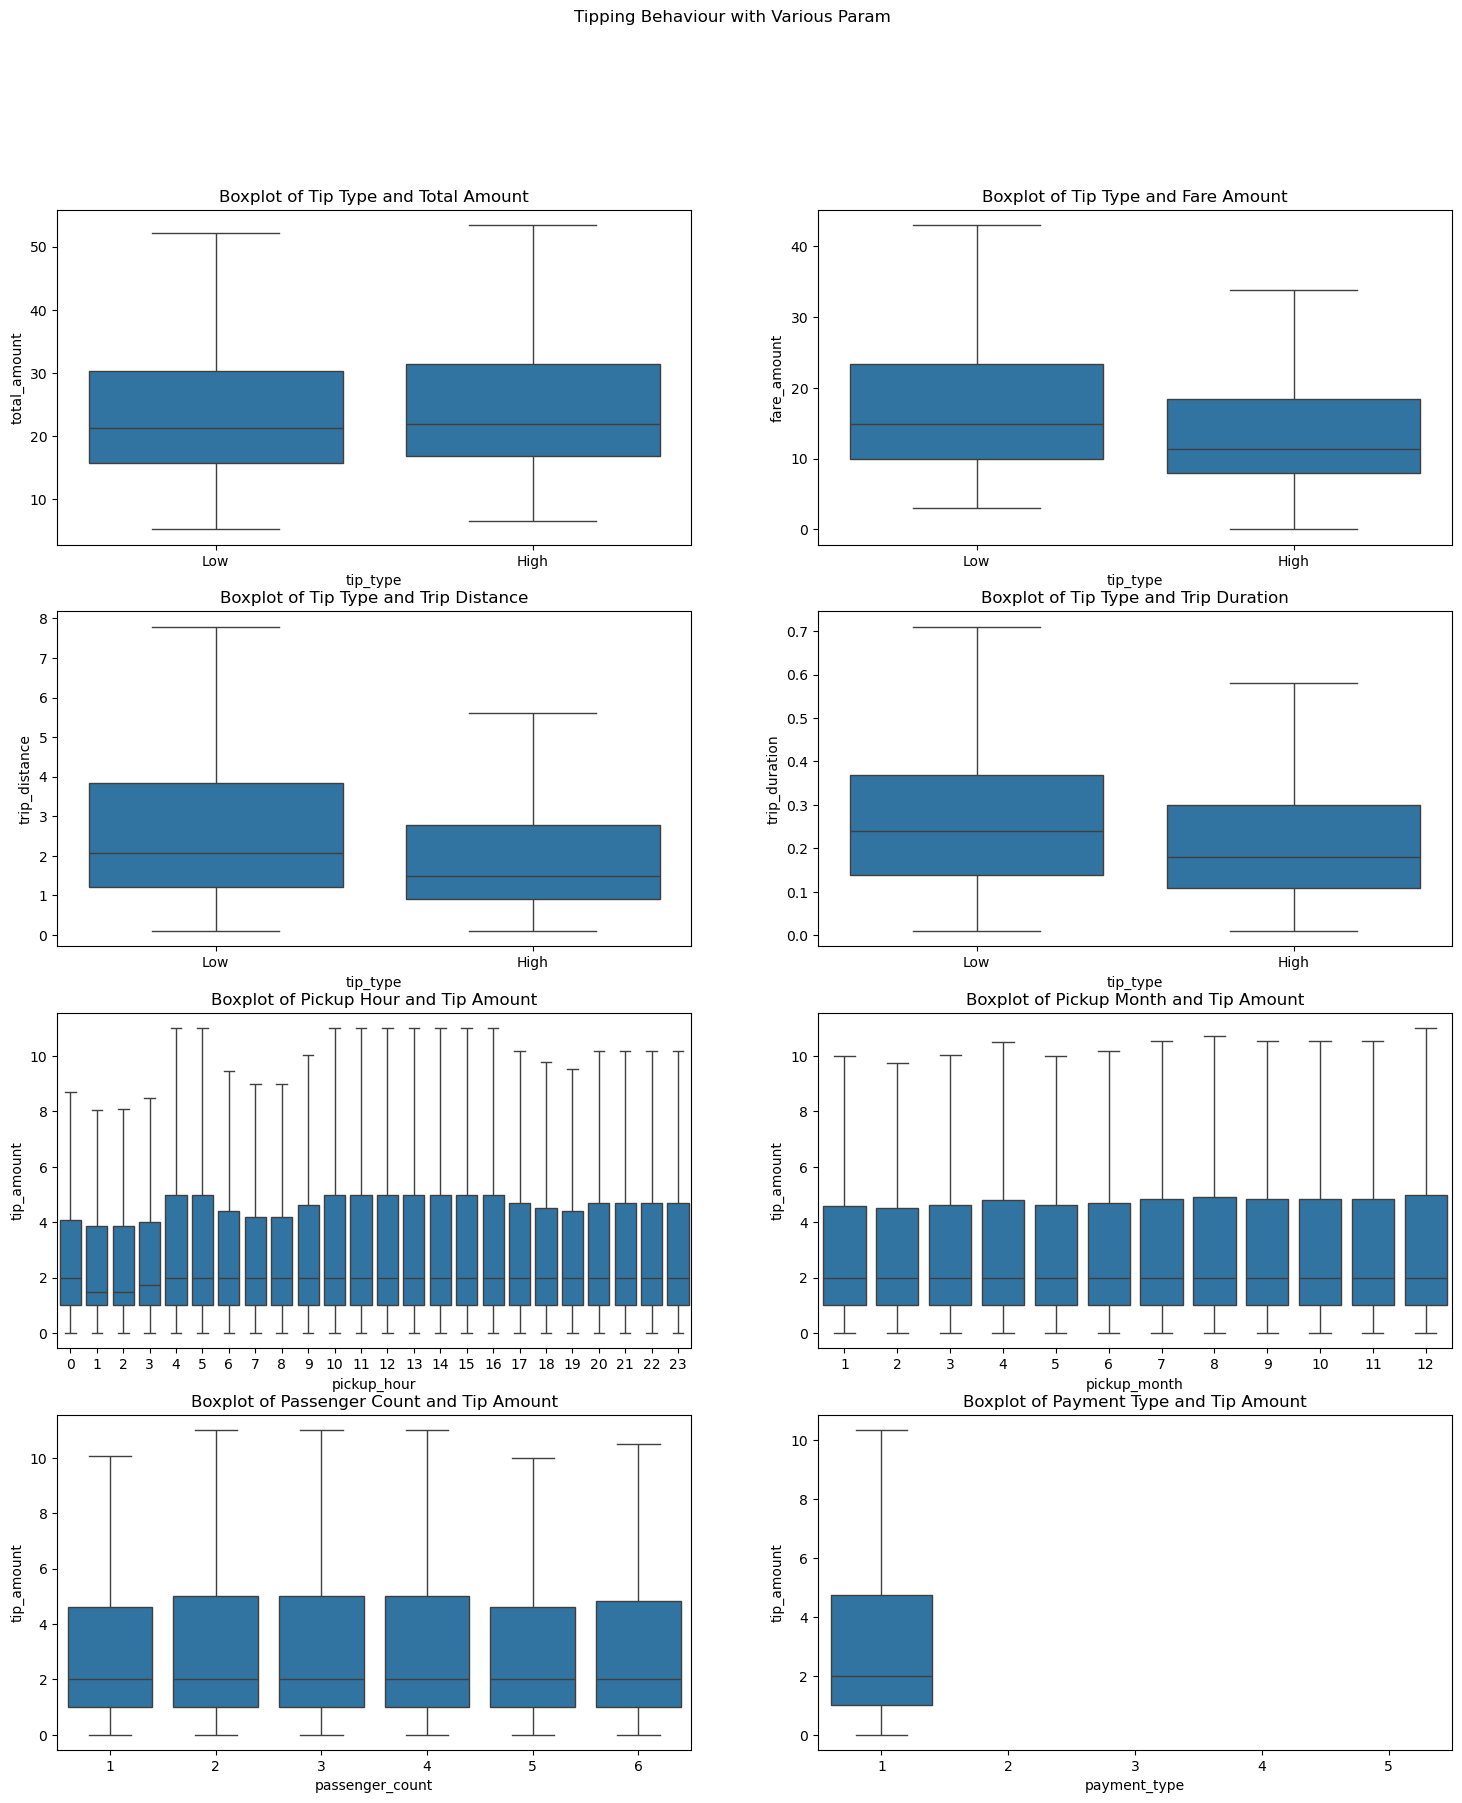

In [206]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
## Lets create a function which categorizes tip percentage 
# Define the condition function
def tip_type(tip_percentage):
    if tip_percentage > 25:
        return 'High'
    elif tip_percentage < 10:
        return 'Low'
    else:
        return 'Decent'
## Create a column which shows if tip was High or Low based on percentage where its High if tip_percentage > 25 and low if its less than 10
non_zero_tip_df['tip_type'] = non_zero_tip_df['tip_pecentage'].apply(tip_type)
# Lets filter out the ones which are High and Low
filtered_tip_df = non_zero_tip_df[non_zero_tip_df['tip_type'].isin(['High', 'Low'])]
#filtered_tip_df.tip_type.value_counts()
# Now lets analyze the tipping behaviour based on trip_duration, pickup_zone, trip_distance, pickup_hour, pickup_day_of_week and fare_amount
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
sns.boxplot(data=filtered_tip_df, x='tip_type', y='total_amount', showfliers=False, ax=axes[0,0])
axes[0,0].set_title("Boxplot of Tip Type and Total Amount")
sns.boxplot(data=filtered_tip_df, x='tip_type', y='fare_amount', showfliers=False, ax=axes[0,1])
axes[0,1].set_title("Boxplot of Tip Type and Fare Amount")
sns.boxplot(data=filtered_tip_df, x='tip_type', y='trip_distance', showfliers=False, ax=axes[1,0])
axes[1,0].set_title("Boxplot of Tip Type and Trip Distance")
sns.boxplot(data=filtered_tip_df, x='tip_type', y='trip_duration', showfliers=False, ax=axes[1,1])
axes[1,1].set_title("Boxplot of Tip Type and Trip Duration")

sns.boxplot(data=filtered_tip_df, x='pickup_hour', y='tip_amount', showfliers=False, ax=axes[2,0])
axes[2,0].set_title("Boxplot of Pickup Hour and Tip Amount")
sns.boxplot(data=filtered_tip_df, x='pickup_month', y='tip_amount', showfliers=False, ax=axes[2,1])
axes[2,1].set_title("Boxplot of Pickup Month and Tip Amount")
sns.boxplot(data=filtered_tip_df, x='passenger_count', y='tip_amount', showfliers=False, ax=axes[3,0])
axes[3,0].set_title("Boxplot of Passenger Count and Tip Amount")
sns.boxplot(data=filtered_tip_df, x='payment_type', y='tip_amount', showfliers=False, ax=axes[3,1])
axes[3,1].set_title("Boxplot of Payment Type and Tip Amount")
fig.suptitle('Tipping Behaviour with Various Param')
plt.show()
#trip_with_less_than_10_pct = master_df[master_df['tip_pecentage'] < 10]
#trip_with_less_than_10_pct

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

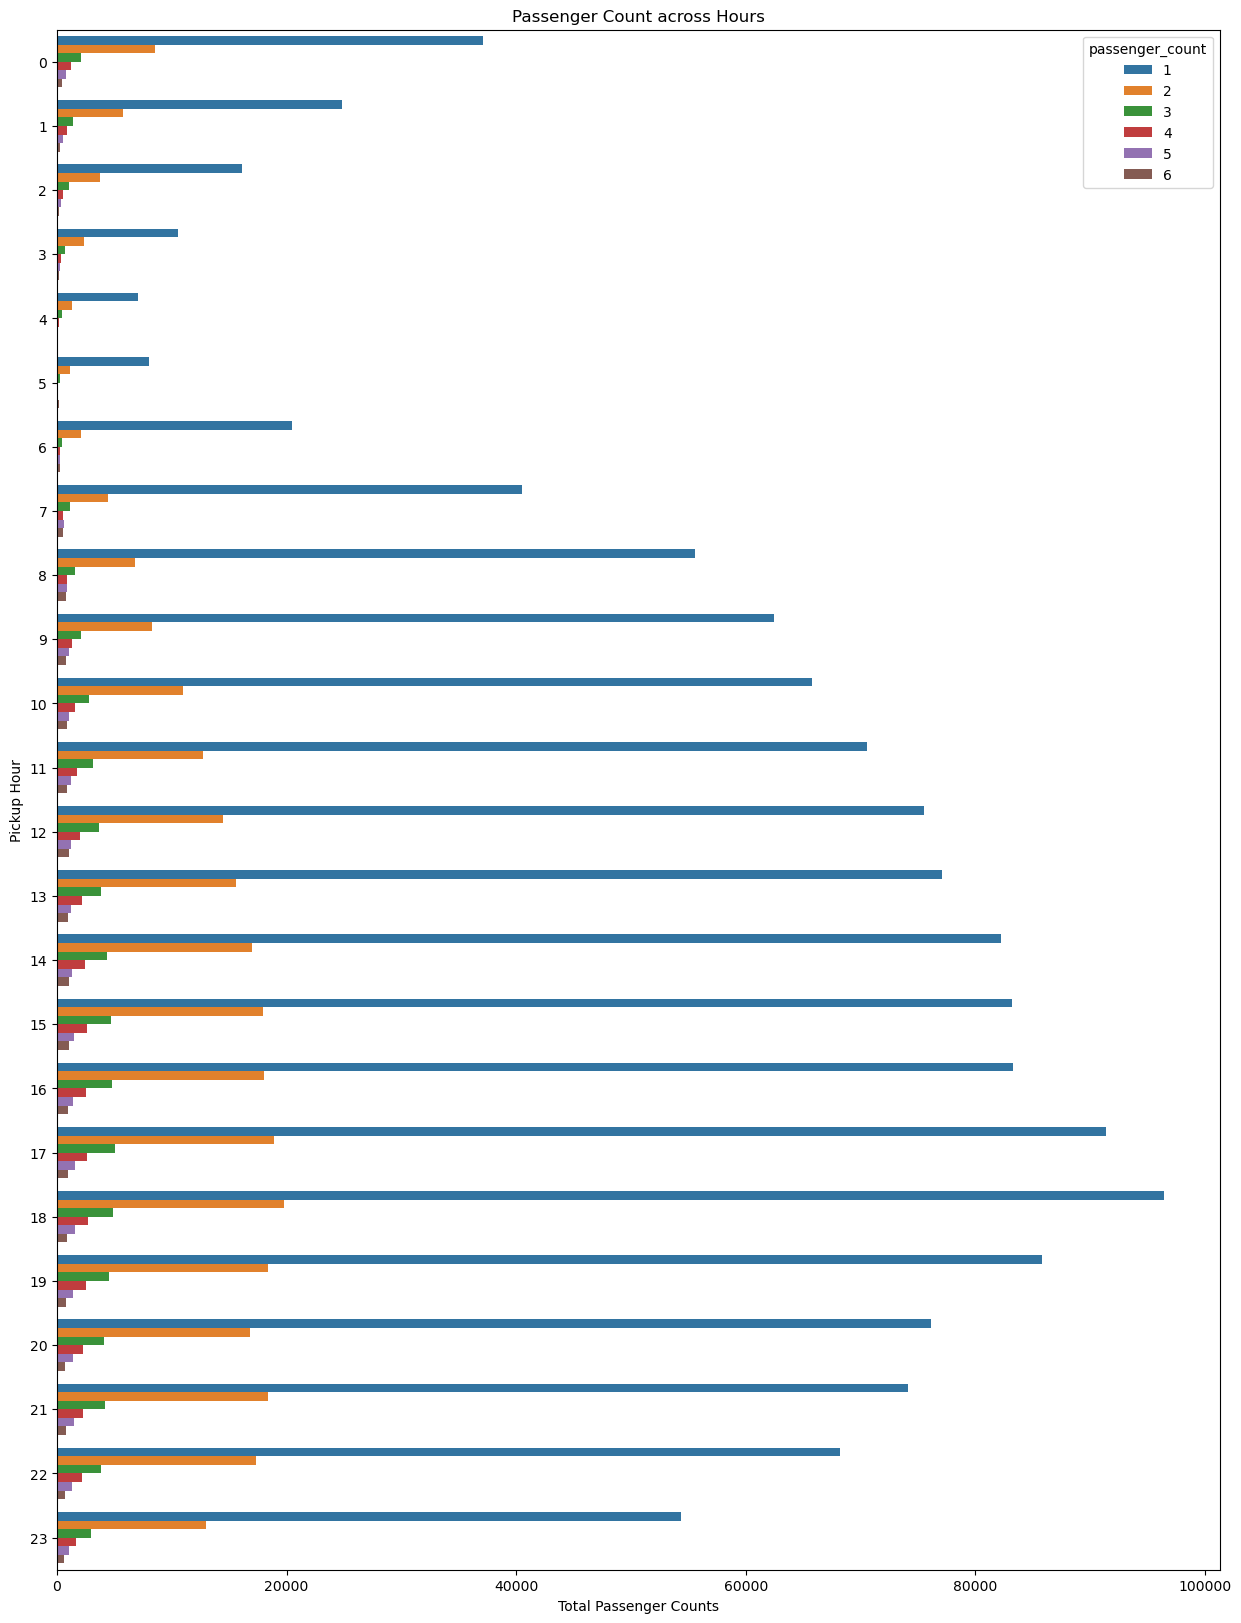

In [207]:
# See how passenger count varies across hours and days
plt.figure(figsize=(15, 20)) 
sns.countplot(data=master_df, y='pickup_hour', hue='passenger_count', orient='h')
plt.title('Passenger Count across Hours')
plt.ylabel('Pickup Hour')
plt.xlabel('Total Passenger Counts')
plt.show()

In [208]:
master_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_hour', 'pickup_day', 'pickup_month',
       'airport_fee', 'pickup_day_of_week', 'pickup_quarter', 'trip_duration',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'day_type', 'dropoff_hour', 'dropoff_zone', 'fare_per_mile',
       'tiered_distance'],
      dtype='object')

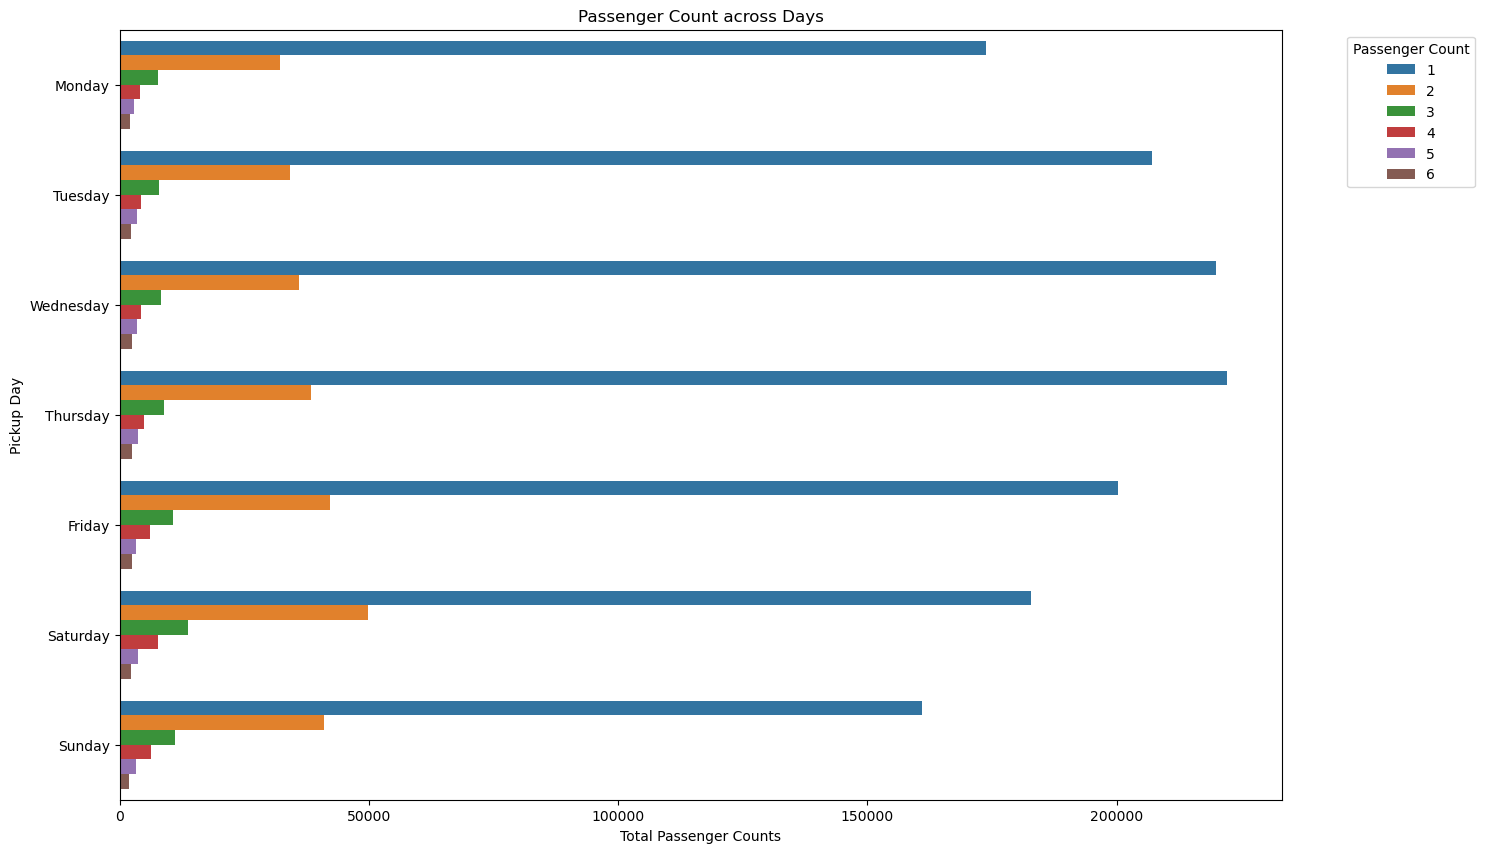

In [209]:
# See how passenger count varies across days
plt.figure(figsize=(15, 10)) 
sns.countplot(data=master_df, y='pickup_day_of_week', hue='passenger_count', orient='h')
plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Passenger Count across Days')
plt.ylabel('Pickup Day')
plt.xlabel('Total Passenger Counts')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [210]:
# How does passenger count vary across zones
passenger_ct_by_zones = master_df.groupby('zone')['passenger_count'].size().reset_index(name='distribution')

## Lets figure out top 10 zones by passenger count and bottom 10 zones by passenger count
top_10_zones_by_passenger_count = passenger_ct_by_zones.sort_values(by='distribution', ascending=False).head(10)
bottom_10_zones_by_passenger_count = passenger_ct_by_zones.sort_values(by='distribution').head(10)

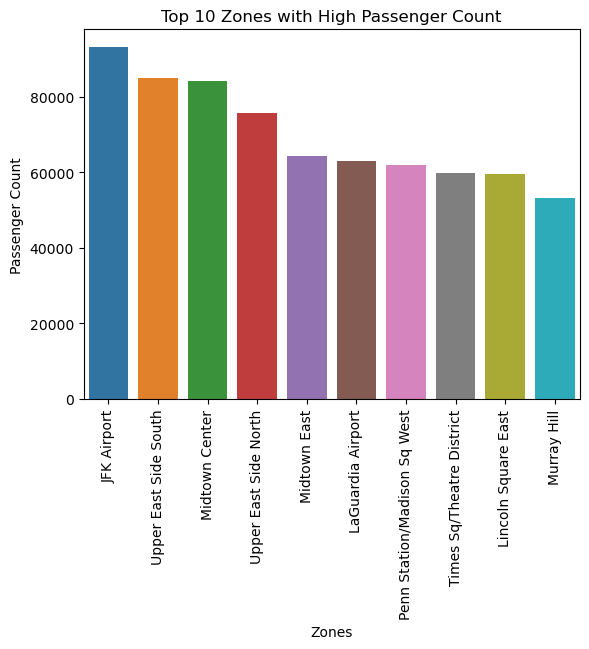

In [211]:
# Lets visualize the top_10 zones with more passenger count
# First lets see top 10 Zones
sns.barplot(x='zone', y='distribution', data=top_10_zones_by_passenger_count.sort_values(by='distribution', ascending=False), hue='zone')
plt.title('Top 10 Zones with High Passenger Count')
plt.xticks(rotation=90)
plt.xlabel('Zones')
plt.ylabel('Passenger Count')
plt.show()

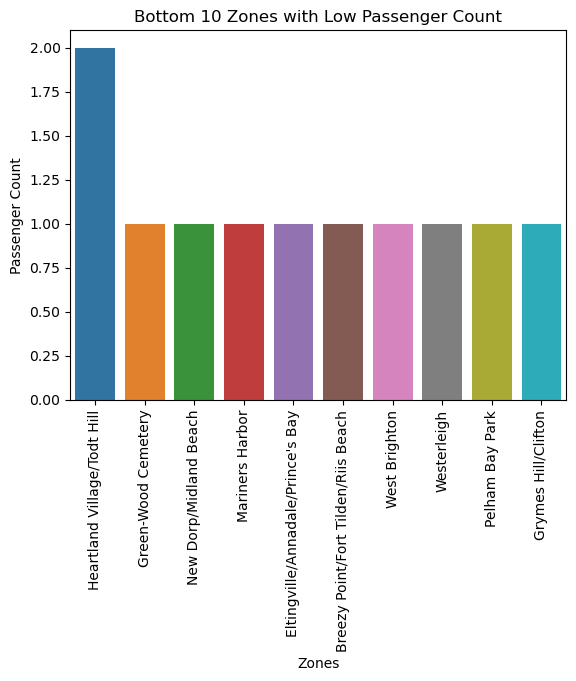

In [212]:
# Lets see bottom 10 Zones
sns.barplot(x='zone', y='distribution', data=bottom_10_zones_by_passenger_count.sort_values(by='distribution', ascending=False), hue='zone')
plt.title('Bottom 10 Zones with Low Passenger Count')
plt.xticks(rotation=90)
plt.xlabel('Zones')
plt.ylabel('Passenger Count')
plt.show()

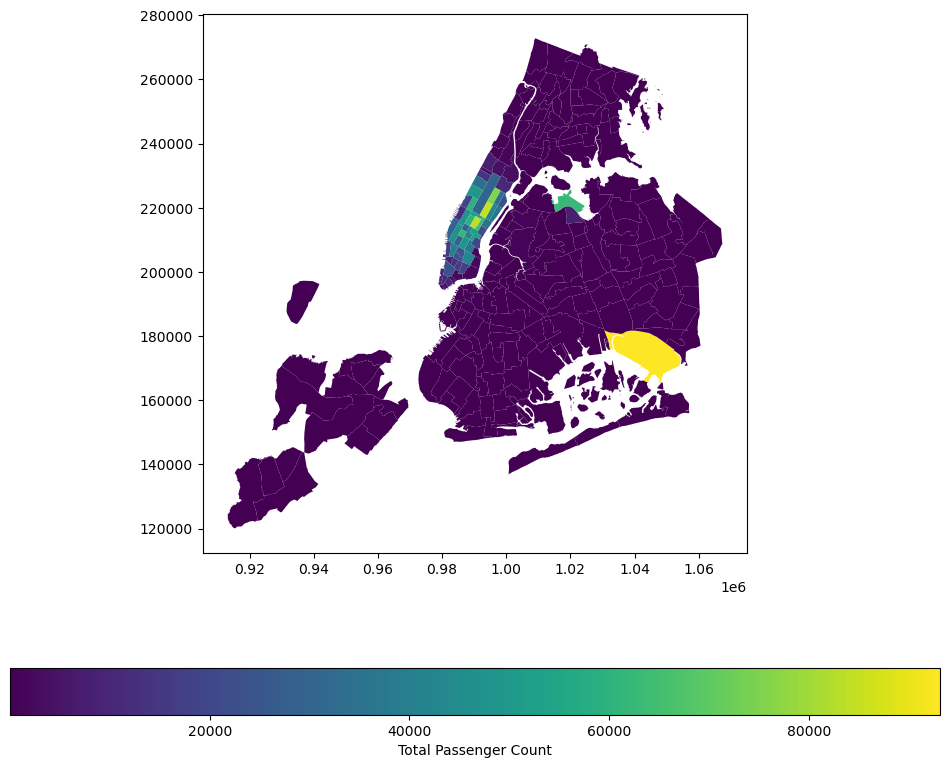

In [213]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Merge passenger count by zones with the zones dataframe 
zones_with_total_passenger_count = zones.merge(passenger_ct_by_zones, on='zone')
# Now lets plot this graph
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones_with_total_passenger_count.plot(column='distribution', ax=ax, legend=True, legend_kwds = {'label': "Total Passenger Count", 'orientation': "horizontal"})
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [214]:
# How often is each surcharge applied?
## List of charges which can be bucketed into the extra/surcharge is as following 
## extra, improvement_surcharge, congestion_surcharge, toll_amount, airport_fee and mta_tax
## Lets filter out incidences where the extra were charged 
extra_charges = master_df[master_df['extra'] > 0]

# lets us group this with pickup and drop zones to see where its applied frequently
extra_charges_by_pickup_zone = extra_charges.groupby('zone').size().reset_index(name='count')
extra_charges_by_pickup_zone.sort_values(by='count', ascending=False).head(10)

zone  count
110             LaGuardia Airport  62180
131                Midtown Center  53495
199         Upper East Side South  48205
102                   JFK Airport  45816
198         Upper East Side North  39624
132                  Midtown East  39530
192     Times Sq/Theatre District  39468
113           Lincoln Square East  37201
153  Penn Station/Madison Sq West  35964
133                 Midtown North  33080

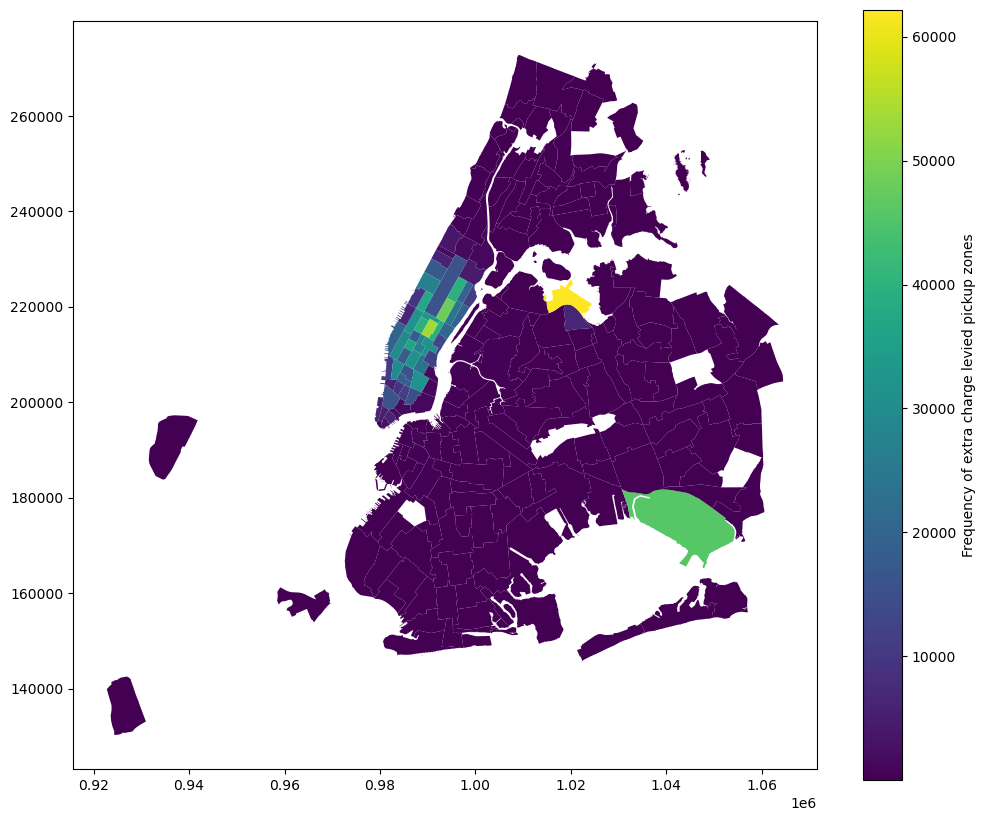

In [215]:
# Merge this with zones dataframe and plot the graph to visualize
dist_extra_charges_by_pickup_zone = zones.merge(extra_charges_by_pickup_zone, on='zone')
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
dist_extra_charges_by_pickup_zone.plot(column='count', ax=ax, legend=True, legend_kwds = {'label': "Frequency of extra charge levied pickup zones", 'orientation': "vertical"})
plt.show()

In [216]:
## Lets filter out incidences where the improvement_surcharge were charged 
improvement_surcharges = master_df[master_df['improvement_surcharge'] > 0]

# lets us group this with pickup zones to see where its applied frequently
improvement_surcharges_by_pickup_zone = improvement_surcharges.groupby('zone').size().reset_index(name='count')
improvement_surcharges_by_pickup_zone.sort_values(by='count', ascending=False).head(10)

zone  count
118                   JFK Airport  93114
225         Upper East Side South  84988
151                Midtown Center  84037
224         Upper East Side North  75793
152                  Midtown East  64219
128             LaGuardia Airport  62926
176  Penn Station/Madison Sq West  61805
218     Times Sq/Theatre District  59754
132           Lincoln Square East  59618
160                   Murray Hill  53321

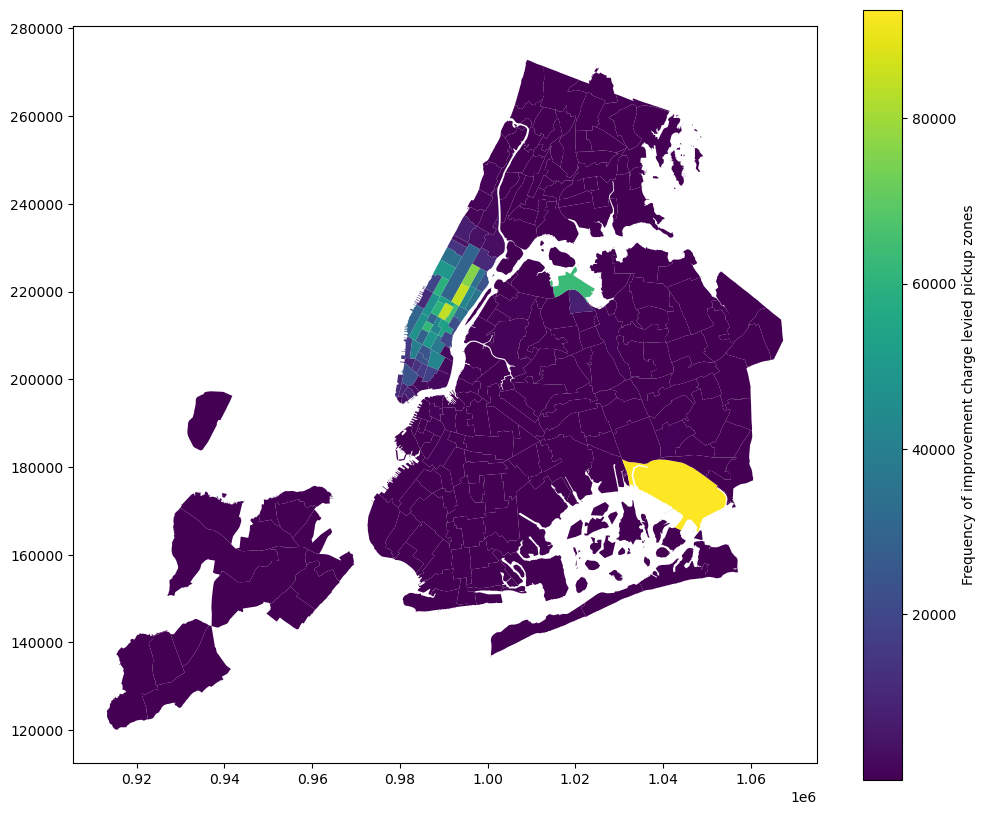

In [217]:
# Merge this with zones dataframe and plot the graph to visualize
dist_improvement_surcharges_by_pickup_zone = zones.merge(improvement_surcharges_by_pickup_zone, on='zone')
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
dist_improvement_surcharges_by_pickup_zone.plot(column='count', ax=ax, legend=True, legend_kwds = {'label': "Frequency of improvement charge levied pickup zones", 'orientation': "vertical"})
plt.show()

In [218]:
## Lets filter out incidences where the congestion_surcharge were charged 
congestion_surcharges = master_df[master_df['congestion_surcharge'] > 0]
# lets us group this with pickup zones to see where its applied frequently
congestion_surcharges_by_pickup_zone = congestion_surcharges.groupby('zone').size().reset_index(name='count')
congestion_surcharges_by_pickup_zone.sort_values(by='count', ascending=False).head(10)

zone  count
198         Upper East Side South  84821
132                Midtown Center  83462
197         Upper East Side North  75469
133                  Midtown East  63852
152  Penn Station/Madison Sq West  61492
114           Lincoln Square East  59388
191     Times Sq/Theatre District  58847
141                   Murray Hill  53007
134                 Midtown North  52062
200         Upper West Side South  49112

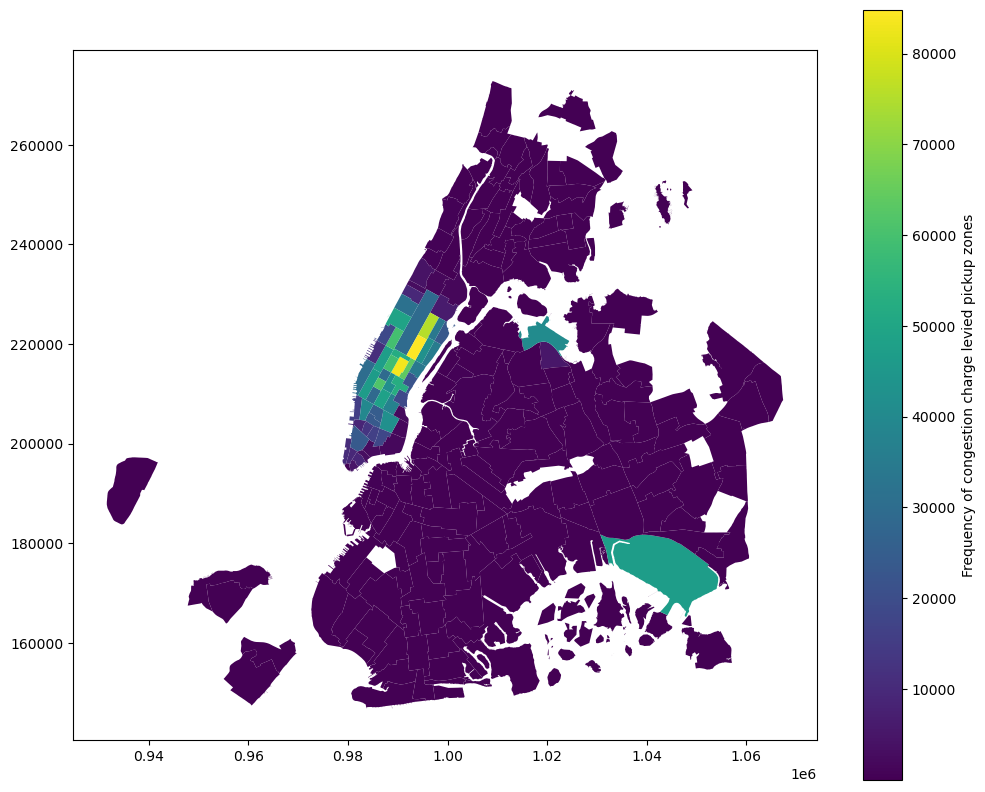

In [219]:
# Merge this with zones dataframe and plot the graph to visualize
dist_congestion_surcharges_by_pickup_zone = zones.merge(congestion_surcharges_by_pickup_zone, on='zone')
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
dist_congestion_surcharges_by_pickup_zone.plot(column='count', ax=ax, legend=True, legend_kwds = {'label': "Frequency of congestion charge levied pickup zones", 'orientation': "vertical"})
plt.show()

In [220]:
## Lets filter out incidences where the mta_tax were charged 
mta_tax = master_df[master_df['mta_tax'] > 0]
# lets us group this with pickup zones to see where its applied frequently
mta_tax_by_pickup_zone = mta_tax.groupby('zone').size().reset_index(name='count')
mta_tax_by_pickup_zone.sort_values(by='count', ascending=False).head(10)

zone  count
116                   JFK Airport  91811
221         Upper East Side South  84864
148                Midtown Center  83476
220         Upper East Side North  75704
149                  Midtown East  63871
126             LaGuardia Airport  62421
172  Penn Station/Madison Sq West  61484
130           Lincoln Square East  59459
214     Times Sq/Theatre District  58852
157                   Murray Hill  53037

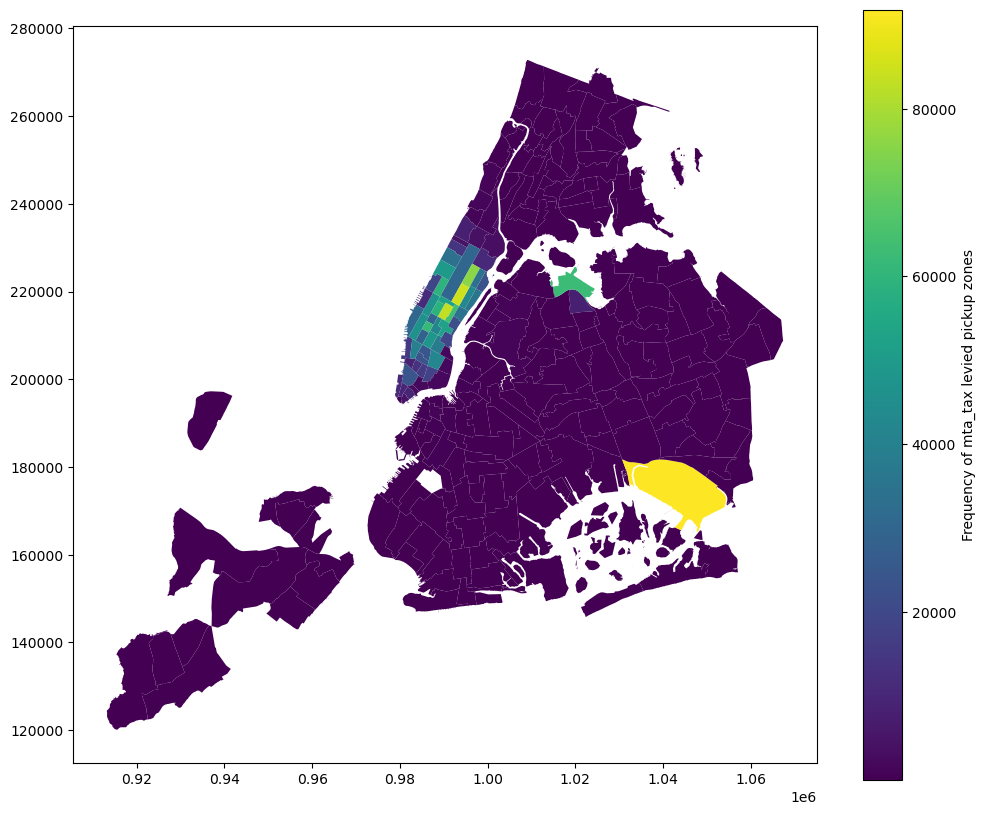

In [221]:
# Merge this with zones dataframe and plot the graph to visualize
dist_mta_tax_by_pickup_zone = zones.merge(mta_tax_by_pickup_zone, on='zone')
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
dist_mta_tax_by_pickup_zone.plot(column='count', ax=ax, legend=True, legend_kwds = {'label': "Frequency of mta_tax levied pickup zones", 'orientation': "vertical"})
plt.show()

In [222]:
## Lets filter out incidences where the tolls were charged 
tolls = master_df[master_df['tolls_amount'] > 0]
# lets us group this with pickup zones to see where its applied frequently
tolls_by_pickup_zone = tolls.groupby('zone').size().reset_index(name='count')
tolls_by_pickup_zone.sort_values(by='count', ascending=False).head(10)

zone  count
113                   JFK Airport  46132
123             LaGuardia Airport  41047
63                  East Elmhurst   5212
212     Times Sq/Theatre District   5132
146                Midtown Center   3841
147                  Midtown East   2703
155                   Murray Hill   2567
149                 Midtown South   2152
148                 Midtown North   2021
170  Penn Station/Madison Sq West   1990

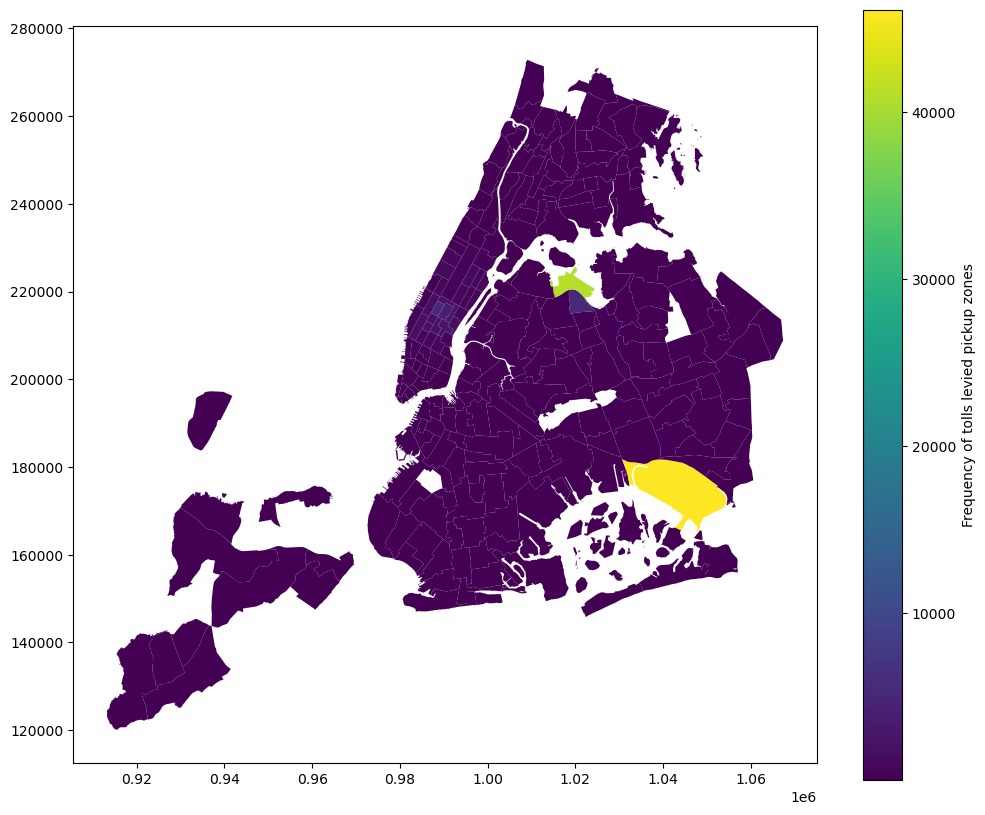

In [223]:
# Merge this with zones dataframe and plot the graph to visualize
dist_tolls_by_pickup_zone = zones.merge(tolls_by_pickup_zone, on='zone')
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
dist_tolls_by_pickup_zone.plot(column='count', ax=ax, legend=True, legend_kwds = {'label': "Frequency of tolls levied pickup zones", 'orientation': "vertical"})
plt.show()

In [224]:
## Lets do the same for dropoff zone
extra_charges = master_df[master_df['extra'] > 0]

# lets us group this with pickup and drop zones to see where its applied frequently
extra_charges_by_dropoff_zone = extra_charges.groupby('dropoff_zone').size().reset_index(name='count')
extra_charges_by_dropoff_zone.sort_values(by='count', ascending=False).head(10)

dropoff_zone  count
229      Upper East Side North  45596
230      Upper East Side South  41282
154             Midtown Center  34935
223  Times Sq/Theatre District  32584
163                Murray Hill  32421
232      Upper West Side South  31067
134            Lenox Hill West  30505
135        Lincoln Square East  30387
45                Clinton East  28731
155               Midtown East  27591

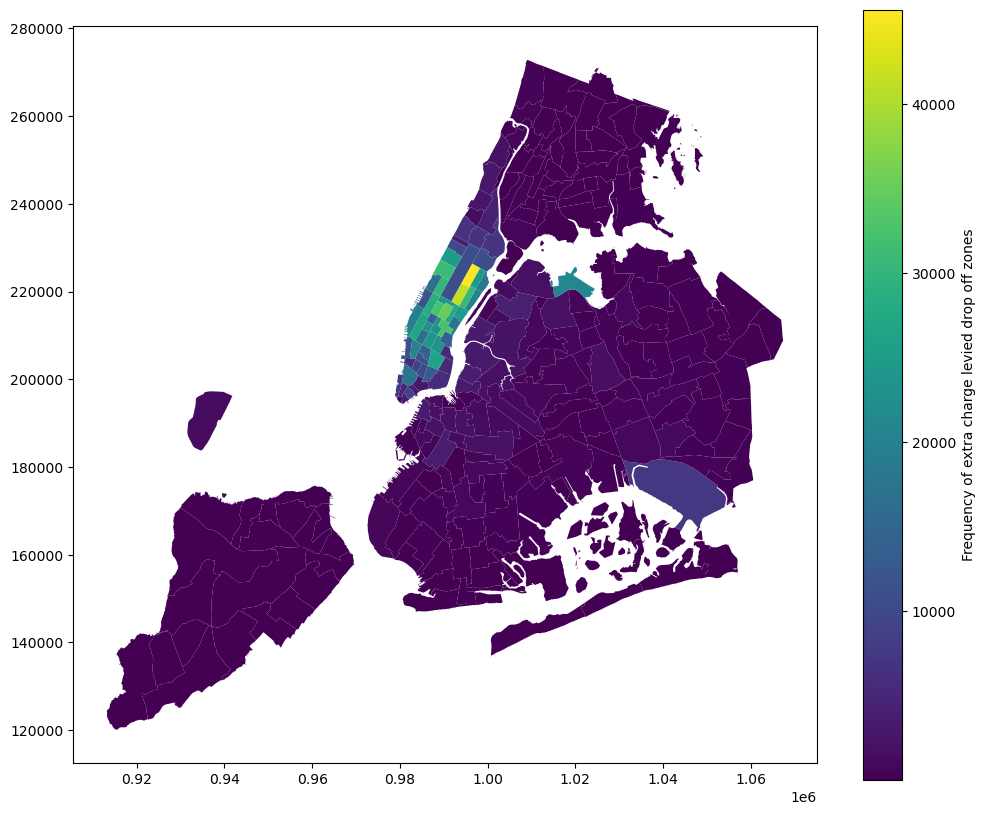

In [225]:
# Merge this with zones dataframe and plot the graph to visualize
dist_extra_charges_by_dropoff_zone = zones.merge(extra_charges_by_dropoff_zone, left_on='zone', right_on='dropoff_zone')
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
dist_extra_charges_by_dropoff_zone.plot(column='count', ax=ax, legend=True, legend_kwds = {'label': "Frequency of extra charge levied drop off zones", 'orientation': "vertical"})
plt.show()

In [226]:
# let us group this with pickup zones to see where its applied frequently
improvement_surcharges_by_dropoff_zone = improvement_surcharges.groupby('dropoff_zone').size().reset_index(name='count')
improvement_surcharges_by_dropoff_zone.sort_values(by='count', ascending=False).head(10)

dropoff_zone  count
229      Upper East Side North  79612
230      Upper East Side South  75884
154             Midtown Center  69942
223  Times Sq/Theatre District  55086
163                Murray Hill  53213
155               Midtown East  51045
135        Lincoln Square East  50401
232      Upper West Side South  50240
134            Lenox Hill West  47613
64                East Chelsea  45395

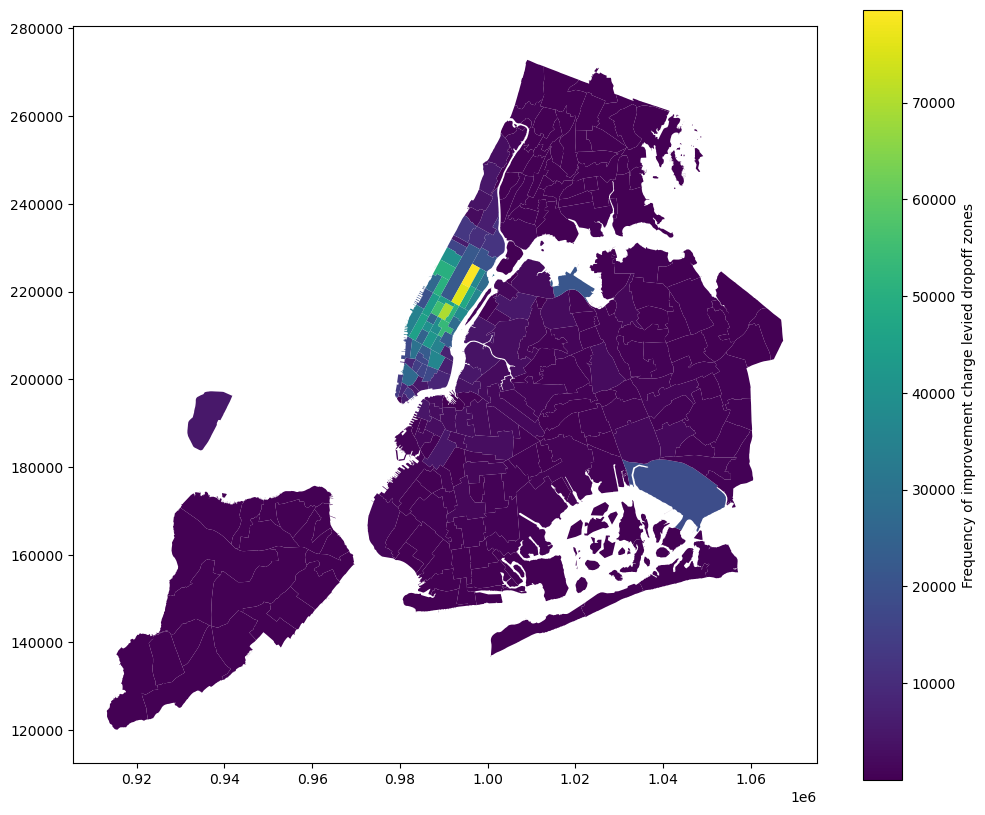

In [227]:
# Merge this with zones dataframe and plot the graph to visualize
dist_improvement_surcharges_by_dropoff_zone = zones.merge(improvement_surcharges_by_dropoff_zone, left_on='zone', right_on='dropoff_zone')
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
dist_improvement_surcharges_by_dropoff_zone.plot(column='count', ax=ax, legend=True, legend_kwds = {'label': "Frequency of improvement charge levied dropoff zones", 'orientation': "vertical"})
plt.show()

In [228]:
congestion_surcharges_by_dropoff_zone = congestion_surcharges.groupby('dropoff_zone').size().reset_index(name='count')
congestion_surcharges_by_dropoff_zone.sort_values(by='count', ascending=False).head(10)

dropoff_zone  count
227      Upper East Side North  78965
228      Upper East Side South  75788
152             Midtown Center  69829
221  Times Sq/Theatre District  54956
161                Murray Hill  53044
153               Midtown East  50961
133        Lincoln Square East  50307
230      Upper West Side South  50157
132            Lenox Hill West  47535
63                East Chelsea  45272

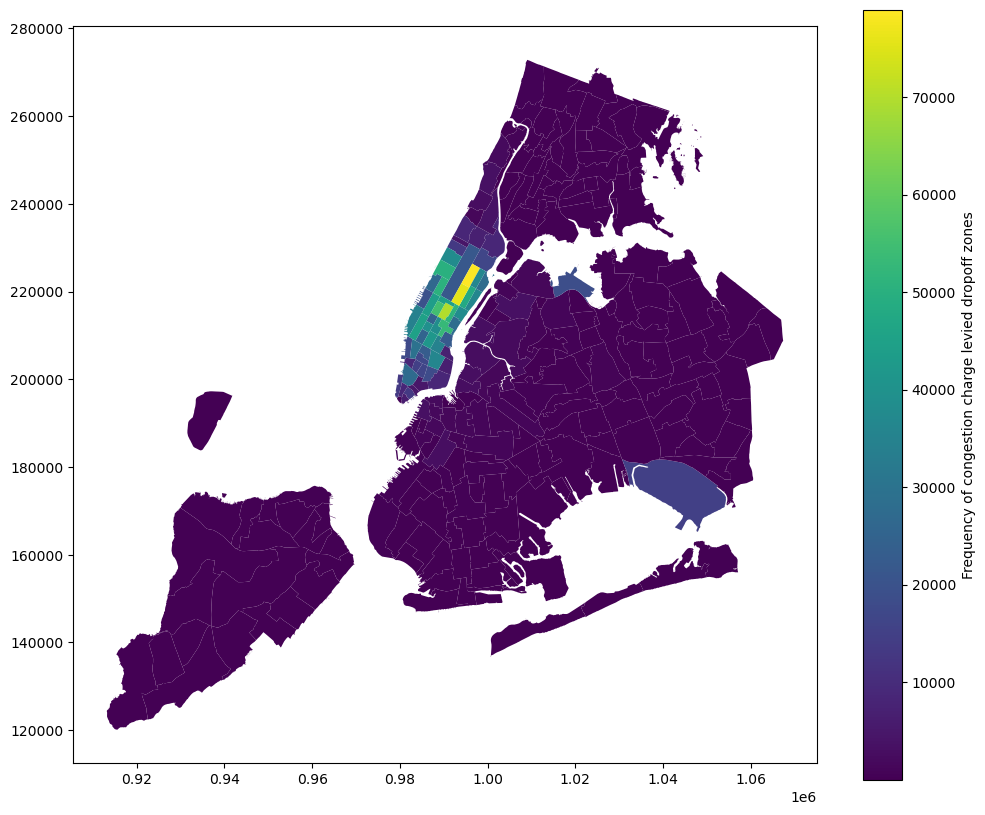

In [229]:
dist_congestion_surcharges_by_dropoff_zone = zones.merge(congestion_surcharges_by_dropoff_zone, left_on='zone', right_on='dropoff_zone')
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
dist_congestion_surcharges_by_dropoff_zone.plot(column='count', ax=ax, legend=True, legend_kwds = {'label': "Frequency of congestion charge levied dropoff zones", 'orientation': "vertical"})
plt.show()

In [230]:
# lets us group this with pickup zones to see where its applied frequently
mta_tax_by_dropoff_zone = mta_tax.groupby('dropoff_zone').size().reset_index(name='count')
mta_tax_by_dropoff_zone.sort_values(by='count', ascending=False).head(10)

dropoff_zone  count
229      Upper East Side North  79575
230      Upper East Side South  75832
154             Midtown Center  69872
223  Times Sq/Theatre District  54980
163                Murray Hill  53154
155               Midtown East  51010
135        Lincoln Square East  50377
232      Upper West Side South  50210
134            Lenox Hill West  47577
64                East Chelsea  45328

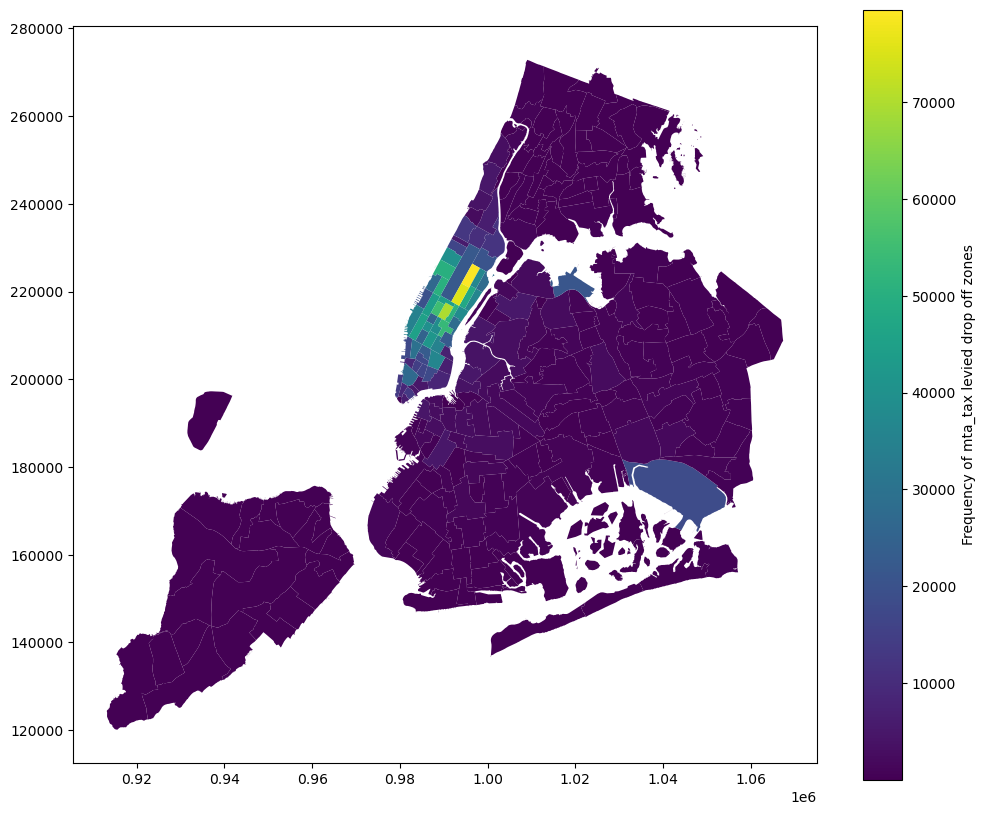

In [231]:
dist_mta_tax_by_dropoff_zone = zones.merge(mta_tax_by_dropoff_zone, left_on='zone', right_on='dropoff_zone')
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
dist_mta_tax_by_dropoff_zone.plot(column='count', ax=ax, legend=True, legend_kwds = {'label': "Frequency of mta_tax levied drop off zones", 'orientation': "vertical"})
plt.show()

In [232]:
# lets us group this with pickup zones to see where its applied frequently
tolls_by_dropoff_zone = tolls.groupby('dropoff_zone').size().reset_index(name='count')
tolls_by_dropoff_zone.sort_values(by='count', ascending=False).head(10)

dropoff_zone  count
131          LaGuardia Airport  16352
121                JFK Airport  12339
223  Times Sq/Theatre District   8538
166             Newark Airport   4982
154             Midtown Center   4678
157              Midtown South   4442
45                Clinton East   4135
163                Murray Hill   3749
155               Midtown East   3549
64                East Chelsea   3170

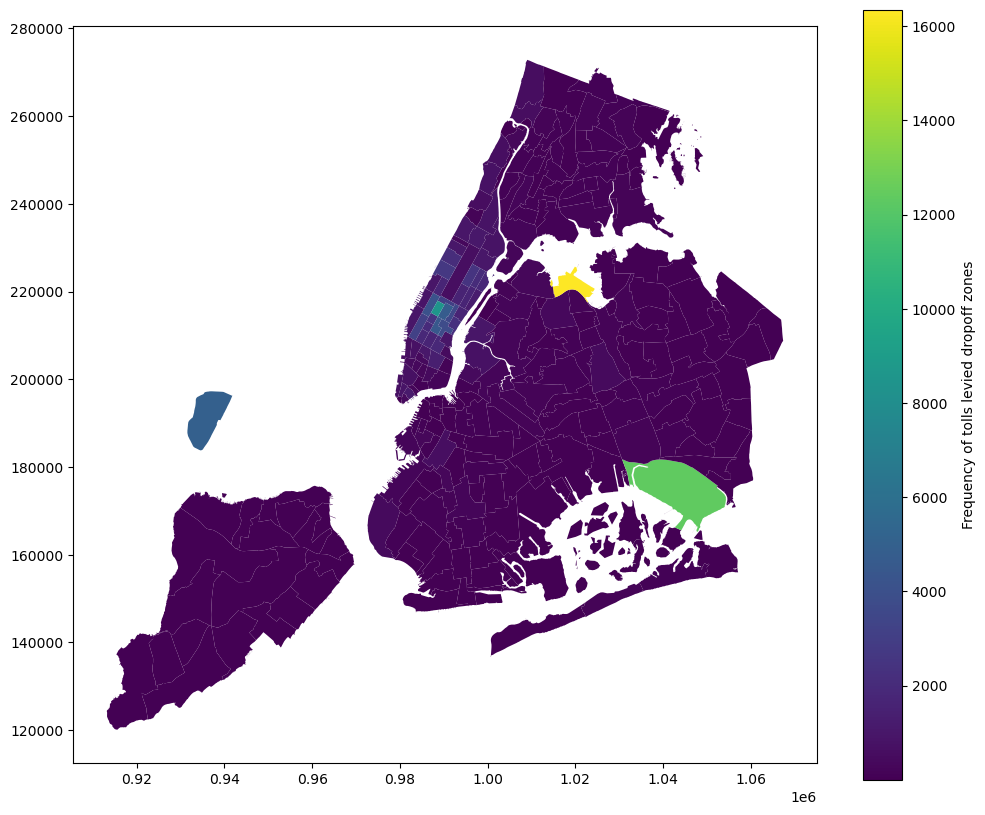

In [233]:
dist_tolls_by_dropoff_zone = zones.merge(tolls_by_dropoff_zone, left_on='zone', right_on='dropoff_zone')
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
dist_tolls_by_dropoff_zone.plot(column='count', ax=ax, legend=True, legend_kwds = {'label': "Frequency of tolls levied dropoff zones", 'orientation': "vertical"})
plt.show()

In [234]:
### Lets see the distribution by hours for each of these extra charges

extra_charges_by_hour = extra_charges.groupby('pickup_hour').size().reset_index(name='count')
improvement_surcharges_by_hour = improvement_surcharges.groupby('pickup_hour').size().reset_index(name='count')
congestion_surcharges_by_hour = congestion_surcharges.groupby('pickup_hour').size().reset_index(name='count')
mta_tax_by_hour= mta_tax.groupby('pickup_hour').size().reset_index(name='count')
tolls_by_hour = tolls.groupby('pickup_hour').size().reset_index(name='count')

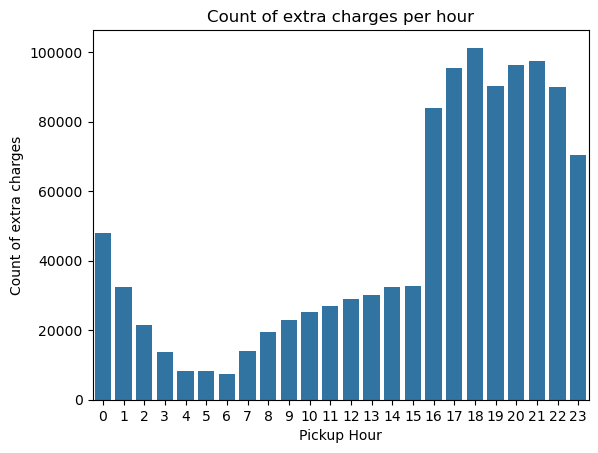

In [235]:
## Plot the bar
plot_bar(data_frame=extra_charges_by_hour, xcol='pickup_hour', ycol='count', xlabel='Pickup Hour', ylabel='Count of extra charges', title='Count of extra charges per hour')
plt.show()

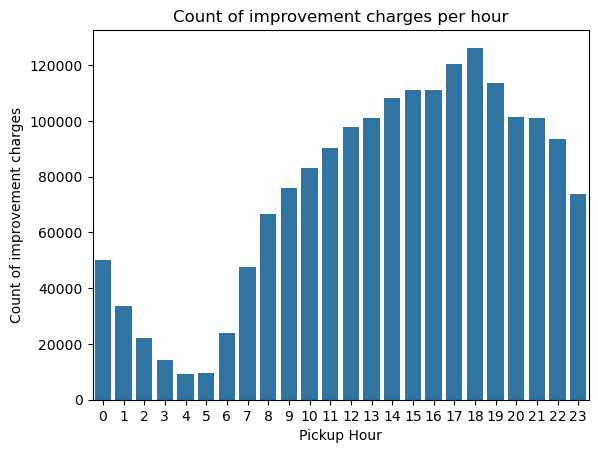

In [236]:
## Plot the bar
plot_bar(data_frame=improvement_surcharges_by_hour, xcol='pickup_hour', ycol='count', xlabel='Pickup Hour', ylabel='Count of improvement charges', title='Count of improvement charges per hour')
plt.show()

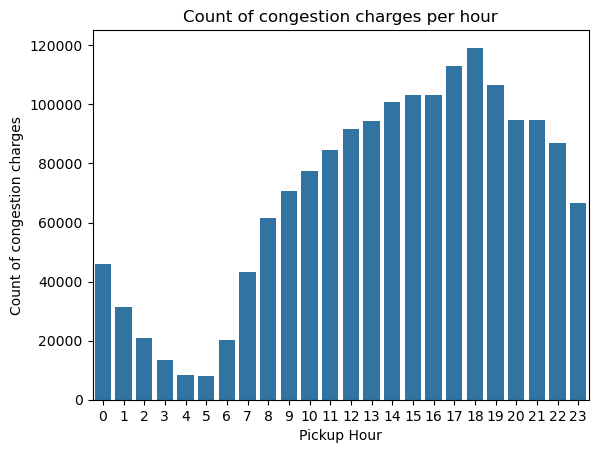

In [237]:
## Plot the bar
plot_bar(data_frame=congestion_surcharges_by_hour, xcol='pickup_hour', ycol='count', xlabel='Pickup Hour', ylabel='Count of congestion charges', title='Count of congestion charges per hour')
plt.show()


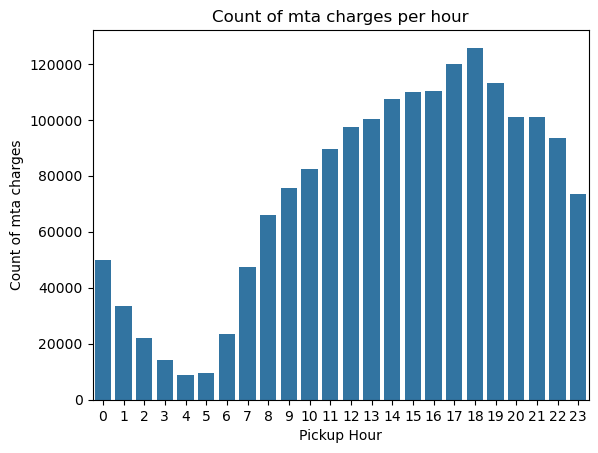

In [238]:
## Plot the bar
plot_bar(data_frame=mta_tax_by_hour, xcol='pickup_hour', ycol='count', xlabel='Pickup Hour', ylabel='Count of mta charges', title='Count of mta charges per hour')
plt.show()

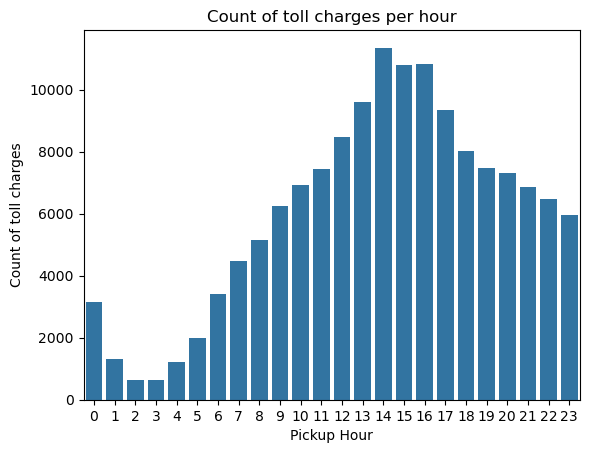

In [239]:
# Plot the bar
plot_bar(data_frame=tolls_by_hour, xcol='pickup_hour', ycol='count', xlabel='Pickup Hour', ylabel='Count of toll charges', title='Count of toll charges per hour')
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
By identifying high-traffic, high-demand routes following can be achieved :

1)Taxi drivers can suggest alternate routes to reach the destination than to go over congested routes.
2)Deploy more taxis for the high-demand routes so that we get more customers.
3)Deploying more taxis on the slow speed route where the pickup demand is less can be avoided.
4)Zones like JFK Airport, Upper East Side South, Midtown Center, Upper East side North, Midtown east, Laguardia Airport, Times Square, Murray Hill are the zones where most passengers tend to travel from, hence more taxis should be deployed.
5)Zones like Newark Airport, Breezy Point, West Brighton, Westerleigh, Inwood Hill park, where the drops are much more than the pickups, few taxis should be deployed. Also after dropping the passengers, the taxis should look to move to the nearest high pickup zone as quickly as possible.These zones are also having a low passenger count hence less number of taxis should be deployed in these zones.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
1)More taxis can be deployed at high demand pick up zones at peak hours on weekdays which is mostly in the afternoon around the end of the working business hours.

2)Zones like East Elmhurst, JFK Airport, Laguardia Airport, Midtown, more taxis must be deployed as these are high pick up zones. So if any taxi is dropping passengers nearby these zones they should quickly come to this zone. Also after dropping passengers at these zones, taxis must wait for pickups rather moving out as these are high pick up zones.

3)The zones like East Village, JFK Airport, West Village, Clinton East, Midtown, Chelsea nightly pickups are more, so more taxi should be deployed.

4)During the peak hours of evening around 18:00, single passenger travels the most, hence car pooling, shared trips should be offered where passengers traveling on the same route can hop over on the same taxis where they will be charged much lesser fare per mile as compared to when they travel alone.

5)During the 3rd quarter and first two months of 1st quarter, the operational taxi should be minimized as the demand is less. Morning hours are quiet, hence less number of taxis must be operational to reduce the operational cost.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
1)During the Holiday months, special offers on destinations should be offered so that people travel more, increasing the revenue.
2)Fare should be increased by a fixed amount based on waiting period on congested areas, congestion_charge should be increased.
3)Since average fare per mile per passenger seems to be lesser, so more group travel, shared travel should be promoted with certain discounts as compared to single passenger travel. This will attract more passengers and also will contribute to lessen the congestion as it will be a kind of car pooling.
4)Fare must be adjusted so that it does not depend on distance travelled. As it was noticed that for > 5 miles the average fare is lesser and for smaller distances the average fare is more, the fare should be made uniform based on per mile. This will help increase the revenue.
5)Payment through credit card must be promoted.